# MODULES & DATA READING

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, MaxAbsScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import make_regression

from sklearn import tree
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier

from scipy import stats

In [258]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [260]:
# Read original data
df = pd.read_excel('data.xls')
print('Before Data Cleaning:', np.size(df))
df.head()

Before Data Cleaning: 504240


ID    aspect   strdist  basarea    basin curvature curve_cont curve_prof  \
0   1  247.0482  664.8308    65600        1  3.020935  -2.463763   0.557172   
1   2  253.3718  642.8063    65600        1 -1.277527   0.557914  -0.719612   
2   3  265.2971  644.9806    65600        1 -2.156464   0.636057  -1.520407   
3   4  267.3936  647.7654    65600        1   2.61673  -2.301352   0.315377   
4   5   MISSING  651.1528  MISSING  MISSING   MISSING    MISSING    MISSING   

     curves     drop  ...      elev cohesion    slide scarpdist scarps  \
0  0.139255     37.5  ...  1061.306  MISSING  MISSING  20.00000    0.0   
1  0.130121       15  ...  1051.781  MISSING  MISSING  40.00000    0.0   
2  0.214373       25  ...  1057.005       10        1  28.28427    0.0   
3  0.135763       40  ...   1065.42       10        1  20.00000    0.0   
4   MISSING  MISSING  ...   MISSING       10        1   0.00000    1.0   

  frictang     slope  slopeleg    woods   specwt  
0  MISSING  11.15498   MISSING  MISSING  MISSING  
1  MISSING   13.4683  2033.702        1  MISSING  
2       23   15.3465  2024.026        1       19  
3       23  12.92921  2015.106        1       19  
4       23   MISSING   MISSING        1       19  

[5 rows x 24 columns]

# DATA CLEANING
The Data is filled by some **MISSING** notation data, which leads to the inability of Input Data to be processed. Therefore, we prefer to **clean up** such data herein Data Cleaning by directly deleting a row with **MISSING** data. 

The Flow of Processing is quite simple:
<ol>
    <li>Change <b>MISSING</b> notation data with NaN Value.</li>
    <li>Drop a row that contain a <b>NaN value</b> in particular variable or feature.</li>
    <li>Updated Data Frame : <b>df_clean</b>.</li>
</ol>

In [261]:
#Change the 'Missing' with NaN
df = df.replace('MISSING', np.nan)
df.isnull().sum()

ID              0
aspect        144
strdist         0
basarea       163
basin         163
curvature     163
curve_cont    163
curve_prof    163
curves        163
drop          163
rockdist        0
flowdir       163
fos           200
lith          106
elev          163
cohesion      106
slide         106
scarpdist       0
scarps          7
frictang      106
slope         144
slopeleg      215
woods           1
specwt        106
dtype: int64

<Axes: >

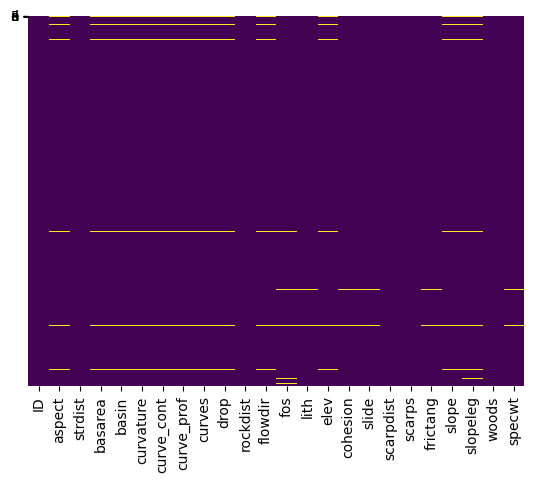

In [262]:
#Visualize all NaN data
sns.heatmap(df.isnull(),yticklabels='False',cbar=False,cmap='viridis')

In [263]:
#Delete A row that contain NaN in the column or variable of the dataset
df_clean = df.replace('MISSING', np.nan).dropna().reset_index(drop=True)
print('After Data Cleaning:', np.size(df))
df_clean.isnull().sum()

After Data Cleaning: 504240


ID            0
aspect        0
strdist       0
basarea       0
basin         0
curvature     0
curve_cont    0
curve_prof    0
curves        0
drop          0
rockdist      0
flowdir       0
fos           0
lith          0
elev          0
cohesion      0
slide         0
scarpdist     0
scarps        0
frictang      0
slope         0
slopeleg      0
woods         0
specwt        0
dtype: int64

<Axes: >

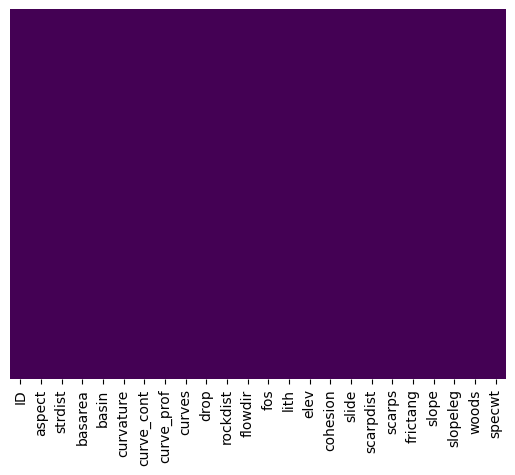

In [264]:
#Visualize all NaN data
sns.heatmap(df_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [265]:
df_clean.describe()

ID        aspect       strdist       basarea         basin  \
count  20661.000000  20661.000000  20661.000000  2.066100e+04  20661.000000   
mean   10478.636368    204.018024     80.665612  3.241700e+06     19.252166   
std     6036.305317     68.062884     91.099048  2.290549e+06      8.308838   
min        3.000000      0.005397      0.000000  1.200000e+03      1.000000   
25%     5257.000000    169.836800     20.000000  3.892000e+05     17.000000   
50%    10469.000000    210.545800     56.568540  5.068000e+06     17.000000   
75%    15694.000000    242.509700    101.980400  5.068000e+06     18.000000   
max    20998.000000    359.918700    647.765400  5.068000e+06     51.000000   

          curvature    curve_cont    curve_prof        curves          drop  \
count  20661.000000  20661.000000  20661.000000  20661.000000  20661.000000   
mean       0.006720      0.017645      0.024366      0.175299     28.572351   
std        1.449008      0.978573      0.706617      0.100408     20.892710   
min      -10.811370    -12.574080     -7.542503      0.000497      1.666667   
25%       -0.667679     -0.389920     -0.282483      0.104197     15.000000   
50%        0.019348      0.006627      0.031532      0.156651     25.000000   
75%        0.658142      0.406648      0.328313      0.224142     36.666670   
max       29.113010     10.524320     16.538930      0.736142    265.000000   

       ...          elev      cohesion         slide     scarpdist  \
count  ...  20661.000000  20661.000000  20661.000000  20661.000000   
mean   ...    926.106519     18.162722      0.441847     58.774815   
std    ...    183.994899     14.504826      1.138633     65.399292   
min    ...    528.966400     10.000000      0.000000      0.000000   
25%    ...    777.314200     10.000000      0.000000     20.000000   
50%    ...    945.309800     10.000000      0.000000     40.000000   
75%    ...   1071.669000     20.000000      1.000000     84.852810   
max    ...   1330.906000     50.000000     10.000000    382.099500   

             scarps      frictang         slope      slopeleg         woods  \
count  20661.000000  20661.000000  20661.000000  20661.000000  20661.000000   
mean       0.220028     23.093800     15.584957    549.720544      0.754126   
std        0.414275     10.117792      8.733018    252.707664      0.430615   
min        0.000000     17.000000      0.157048     44.721360      0.000000   
25%        0.000000     17.000000      9.456009    389.974900      1.000000   
50%        0.000000     17.000000     13.917670    503.590000      1.000000   
75%        0.000000     25.000000     19.845680    650.034200      1.000000   
max        1.000000     45.000000     65.599170   2024.026000      1.000000   

             specwt  
count  20661.000000  
mean      21.522676  
std        1.940632  
min       19.000000  
25%       20.000000  
50%       20.000000  
75%       23.000000  
max       25.000000  

[8 rows x 24 columns]

In [266]:
df_clean.head(10)

ID    aspect   strdist  basarea  basin  curvature  curve_cont  curve_prof  \
0   3  265.2971  644.9806  65600.0    1.0  -2.156464    0.636057   -1.520407   
1   4  267.3936  647.7654  65600.0    1.0   2.616730   -2.301352    0.315377   
2   7  272.0991  625.1400  65600.0    1.0   0.029022   -0.073801   -0.044779   
3   8  272.9689  628.0128  65600.0    1.0  -1.793457    0.881960   -0.911497   
4   9  261.2346  631.5062  65600.0    1.0   2.723572   -2.240553    0.483019   
5  12  287.9410  602.9926  65600.0    1.0   0.380432   -0.176626    0.203806   
6  13  298.5974  605.3098  65600.0    1.0  -1.952148    1.037233   -0.914915   
7  14  291.1888  608.2762  65600.0    1.0  -1.282166    0.188655   -1.093511   
8  15  290.8967  611.8823  65600.0    1.0  -2.048645    0.311583   -1.737062   
9  16  294.2935  616.1169  65600.0    1.0   0.494263   -0.443940    0.050323   

     curves  drop  ...      elev  cohesion  slide  scarpdist  scarps  \
0  0.214373  25.0  ...  1057.005      10.0    1.0   28.28427     0.0   
1  0.135763  40.0  ...  1065.420      10.0    1.0   20.00000     0.0   
2  0.164955  25.0  ...  1058.138      10.0    1.0   20.00000     0.0   
3  0.215654  25.0  ...  1063.369      10.0    1.0   20.00000     0.0   
4  0.142164  42.5  ...  1072.220      10.0    1.0   20.00000     0.0   
5  0.201194  37.5  ...  1054.888      10.0    0.0    0.00000     1.0   
6  0.198204  20.0  ...  1059.088      10.0    0.0    0.00000     1.0   
7  0.214908  27.5  ...  1064.872      10.0    0.0    0.00000     1.0   
8  0.179461  25.0  ...  1070.177      10.0    0.0    0.00000     1.0   
9  0.106264  27.5  ...  1075.828      10.0    1.0    0.00000     1.0   

   frictang      slope  slopeleg  woods  specwt  
0      23.0  15.346500  2024.026    1.0    19.0  
1      23.0  12.929210  2015.106    1.0    19.0  
2      23.0  16.343020  1985.669    1.0    19.0  
3      23.0  16.766640  1976.543    1.0    19.0  
4      23.0  13.314640  1968.201    1.0    19.0  
5      23.0  17.375300  1957.517    1.0    19.0  
6      23.0  17.050100  1947.396    1.0    19.0  
7      23.0  17.745330  1938.055    1.0    19.0  
8      23.0  14.224400  1929.510    1.0    19.0  
9      23.0   8.867694  1921.777    1.0    19.0  

[10 rows x 24 columns]

# ASPECT
The goal of this particular step is to separate two areas of slope. In simple, the data of **Aspect** are degrees, and we want to transform it into radians in the sense of cosine. In the end, we code it as a binary value of **1 (North)** and **0 (South)** 

The Flow of Processing:
<ol>
    <li>Change the <b>Degree</b> into <b>Radian</b> in a sense of Cosinus.</li>
    <li>Assign Value <b>1</b> for [Cosine (Radian) > 0] , and <b>0</b> for [Cosine (Radian) < 0].</li>
    <li>Updated Value for data of Aspect.</li>
</ol>

In [267]:
#Adjust the Aspect
for i in range(len(df_clean)):
    df_clean['aspect'][i] = np.cos((df_clean['aspect'][i]*np.pi)/180)
    if df_clean['aspect'][i] > 0:
        df_clean['aspect'][i] = 1
    else:
        df_clean['aspect'][i] = 0

df_clean.head(10)

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1060962820.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1060962820.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1060962820.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ID  aspect   strdist  basarea  basin  curvature  curve_cont  curve_prof  \
0   3     0.0  644.9806  65600.0    1.0  -2.156464    0.636057   -1.520407   
1   4     0.0  647.7654  65600.0    1.0   2.616730   -2.301352    0.315377   
2   7     1.0  625.1400  65600.0    1.0   0.029022   -0.073801   -0.044779   
3   8     1.0  628.0128  65600.0    1.0  -1.793457    0.881960   -0.911497   
4   9     0.0  631.5062  65600.0    1.0   2.723572   -2.240553    0.483019   
5  12     1.0  602.9926  65600.0    1.0   0.380432   -0.176626    0.203806   
6  13     1.0  605.3098  65600.0    1.0  -1.952148    1.037233   -0.914915   
7  14     1.0  608.2762  65600.0    1.0  -1.282166    0.188655   -1.093511   
8  15     1.0  611.8823  65600.0    1.0  -2.048645    0.311583   -1.737062   
9  16     1.0  616.1169  65600.0    1.0   0.494263   -0.443940    0.050323   

     curves  drop  ...      elev  cohesion  slide  scarpdist  scarps  \
0  0.214373  25.0  ...  1057.005      10.0    1.0   28.28427     0.0   
1  0.135763  40.0  ...  1065.420      10.0    1.0   20.00000     0.0   
2  0.164955  25.0  ...  1058.138      10.0    1.0   20.00000     0.0   
3  0.215654  25.0  ...  1063.369      10.0    1.0   20.00000     0.0   
4  0.142164  42.5  ...  1072.220      10.0    1.0   20.00000     0.0   
5  0.201194  37.5  ...  1054.888      10.0    0.0    0.00000     1.0   
6  0.198204  20.0  ...  1059.088      10.0    0.0    0.00000     1.0   
7  0.214908  27.5  ...  1064.872      10.0    0.0    0.00000     1.0   
8  0.179461  25.0  ...  1070.177      10.0    0.0    0.00000     1.0   
9  0.106264  27.5  ...  1075.828      10.0    1.0    0.00000     1.0   

   frictang      slope  slopeleg  woods  specwt  
0      23.0  15.346500  2024.026    1.0    19.0  
1      23.0  12.929210  2015.106    1.0    19.0  
2      23.0  16.343020  1985.669    1.0    19.0  
3      23.0  16.766640  1976.543    1.0    19.0  
4      23.0  13.314640  1968.201    1.0    19.0  
5      23.0  17.375300  1957.517    1.0    19.0  
6      23.0  17.050100  1947.396    1.0    19.0  
7      23.0  17.745330  1938.055    1.0    19.0  
8      23.0  14.224400  1929.510    1.0    19.0  
9      23.0   8.867694  1921.777    1.0    19.0  

[10 rows x 24 columns]

# FOS CLASSIFICATION
We have a feature called **Factor of Safety (FoS)**, which tells us about the slope's resisting forces to the driving forces. In order to get more knowledge about the data, especially for the Machine Learning model later, we **binned** such features into five classes. We consider the **binned FoS and unbinned FoS as the features in our Data Frame.**

The Flow of Processing:
<ol>
    <li>We binned the FoS data into 5 classes using Quantile Method.</li>
    <li>Convert all the result of binning into Binary Value (0,1).</li>
    <li>Updated Data Frame with additional of Binary Value for all binned FoS, and Unbinned FoS.</li>
</ol>

In [268]:
#Creating a label for fos classification 
class_fos_5 = []
for i in np.arange(5):
    class_fos_5.append('fos_'+str(i+1))

In [269]:
#Creating a Column for Binning Result using quantile
df_clean['fos_5th_class'] = pd.qcut(df_clean['fos'], q=5, labels=class_fos_5)
df_clean[['fos','fos_5th_class']]

fos fos_5th_class
0      1.318290         fos_3
1      1.094124         fos_2
2      1.029149         fos_2
3      1.048767         fos_2
4      1.007705         fos_2
...         ...           ...
20656  4.778810         fos_5
20657  4.338595         fos_5
20658  8.775199         fos_5
20659  5.946122         fos_5
20660  3.610353         fos_5

[20661 rows x 2 columns]

Text(0.5, 1.0, 'FoS Binning')

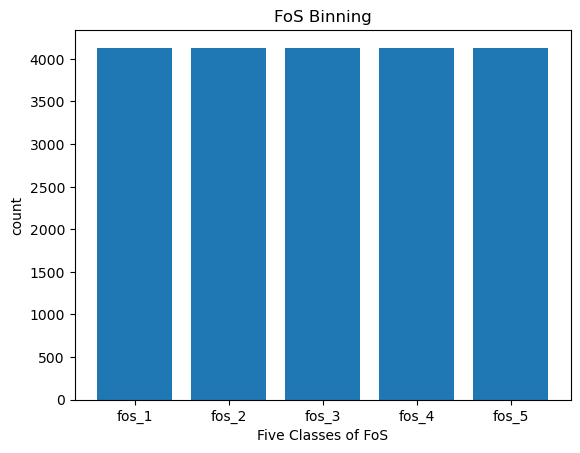

In [270]:
#Creating a Bar Chart after Quantile Binning
plt.bar(class_fos_5, df_clean["fos_5th_class"].value_counts())

# set x/y labels and plot title
plt.xlabel("Five Classes of FoS")
plt.ylabel("count")
plt.title("FoS Binning")

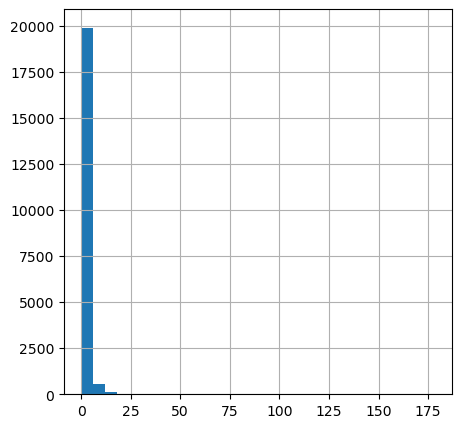

In [271]:
df_clean['fos'].hist(bins = 30, figsize = (5,5));

In [272]:
#FOS SEPARATION
fos = pd.get_dummies(df_clean["fos_5th_class"])
fos.columns = ['fos_1','fos_2','fos_3','fos_4','fos_5']
df_clean.drop(['fos_5th_class'],axis=1,inplace=True)
df_clean = pd.concat([df_clean,fos],axis=1)

df_clean.head()

ID  aspect   strdist  basarea  basin  curvature  curve_cont  curve_prof  \
0   3     0.0  644.9806  65600.0    1.0  -2.156464    0.636057   -1.520407   
1   4     0.0  647.7654  65600.0    1.0   2.616730   -2.301352    0.315377   
2   7     1.0  625.1400  65600.0    1.0   0.029022   -0.073801   -0.044779   
3   8     1.0  628.0128  65600.0    1.0  -1.793457    0.881960   -0.911497   
4   9     0.0  631.5062  65600.0    1.0   2.723572   -2.240553    0.483019   

     curves  drop  ...  frictang     slope  slopeleg  woods  specwt  fos_1  \
0  0.214373  25.0  ...      23.0  15.34650  2024.026    1.0    19.0      0   
1  0.135763  40.0  ...      23.0  12.92921  2015.106    1.0    19.0      0   
2  0.164955  25.0  ...      23.0  16.34302  1985.669    1.0    19.0      0   
3  0.215654  25.0  ...      23.0  16.76664  1976.543    1.0    19.0      0   
4  0.142164  42.5  ...      23.0  13.31464  1968.201    1.0    19.0      0   

   fos_2  fos_3  fos_4  fos_5  
0      0      1      0      0  
1      1      0      0      0  
2      1      0      0      0  
3      1      0      0      0  
4      1      0      0      0  

[5 rows x 29 columns]

# PEARSON CORRELATION
Our goal is to make a model of Machine Learning for Lanslide Prediction. So it is evident that we should inspect first the relationship among our feature to get some insight for further analysis. Here we use the **Pearson Correlation** method which tell us about the linear relationship between two features, and have **value between -1 and 1**, where:
<ul>
    <li><b>1</b>: Maximum Positive linear correlation.</li>
    <li><b>0</b>: No linear correlation.</li>
    <li><b>-1</b>: Maximum negative linear correlation.</li>
</ul>

In [273]:
#Conduct the Pearson Correlation among all data 
df_clean.corr()

ID    aspect   strdist   basarea     basin  curvature  \
ID          1.000000 -0.079310 -0.272694  0.023790  0.609095  -0.003402   
aspect     -0.079310  1.000000  0.223450 -0.154948 -0.210646   0.061417   
strdist    -0.272694  0.223450  1.000000 -0.329061 -0.212459   0.065377   
basarea     0.023790 -0.154948 -0.329061  1.000000 -0.351456  -0.009509   
basin       0.609095 -0.210646 -0.212459 -0.351456  1.000000   0.009702   
curvature  -0.003402  0.061417  0.065377 -0.009509  0.009702   1.000000   
curve_cont  0.004278 -0.029910 -0.039328 -0.007562 -0.003434  -0.901972   
curve_prof -0.001053  0.084522  0.079600 -0.029972  0.015139   0.801512   
curves     -0.068717  0.110930  0.229213 -0.164315 -0.063599   0.032381   
drop       -0.080363  0.125461  0.239053 -0.141436 -0.067074   0.448305   
rockdist         NaN       NaN       NaN       NaN       NaN        NaN   
flowdir    -0.136798  0.625967  0.283515 -0.226389 -0.200348   0.043125   
fos        -0.035219  0.137797  0.084885 -0.104575 -0.024322   0.013131   
lith        0.623275 -0.053633 -0.094636 -0.229587  0.568609  -0.024606   
elev       -0.937113  0.111684  0.287990 -0.054746 -0.569896   0.044082   
cohesion   -0.152087  0.296082  0.389957 -0.331809 -0.097416   0.125674   
slide       0.007607 -0.039408 -0.132484  0.169738 -0.044905  -0.030769   
scarpdist  -0.161179  0.068306  0.262137 -0.296628 -0.029271  -0.001677   
scarps      0.069439 -0.030654 -0.181038  0.190162  0.009768   0.021925   
frictang   -0.150033  0.299630  0.404875 -0.337811 -0.088218   0.119285   
slope      -0.065972  0.103262  0.228554 -0.165685 -0.064694  -0.000166   
slopeleg   -0.384300  0.252715  0.544593 -0.454538 -0.210304   0.006211   
woods      -0.343041  0.089356  0.025883  0.102972 -0.288300  -0.006398   
specwt      0.127877  0.260639  0.332172 -0.427345  0.144928   0.120472   
fos_1      -0.030023 -0.025313  0.000268  0.097508 -0.086386   0.001586   
fos_2       0.009429 -0.109073 -0.114403  0.053882  0.030468  -0.018582   
fos_3       0.046443 -0.047565 -0.071766  0.018382  0.057862   0.019701   
fos_4      -0.005498  0.034143  0.054039 -0.058718  0.009249  -0.008580   
fos_5      -0.020348  0.147810  0.131863 -0.111064 -0.011184   0.005876   

            curve_cont  curve_prof    curves      drop  ...  frictang  \
ID            0.004278   -0.001053 -0.068717 -0.080363  ... -0.150033   
aspect       -0.029910    0.084522  0.110930  0.125461  ...  0.299630   
strdist      -0.039328    0.079600  0.229213  0.239053  ...  0.404875   
basarea      -0.007562   -0.029972 -0.164315 -0.141436  ... -0.337811   
basin        -0.003434    0.015139 -0.063599 -0.067074  ... -0.088218   
curvature    -0.901972    0.801512  0.032381  0.448305  ...  0.119285   
curve_cont    1.000000   -0.464738  0.019641 -0.429765  ... -0.093502   
curve_prof   -0.464738    1.000000  0.093601  0.324136  ...  0.115122   
curves        0.019641    0.093601  1.000000  0.852592  ...  0.305074   
drop         -0.429765    0.324136  0.852592  1.000000  ...  0.337714   
rockdist           NaN         NaN       NaN       NaN  ...       NaN   
flowdir      -0.027372    0.050526  0.087320  0.104909  ...  0.305278   
fos          -0.012036    0.010258 -0.208685 -0.162399  ...  0.303321   
lith          0.024571   -0.016431 -0.123190 -0.134249  ... -0.187439   
elev         -0.039435    0.035782  0.066042  0.103456  ...  0.172183   
cohesion     -0.101066    0.117747  0.289699  0.325530  ...  0.993630   
slide         0.018997   -0.036786  0.050244  0.023403  ... -0.159808   
scarpdist     0.014231    0.016270 -0.068617 -0.064863  ...  0.268243   
scarps       -0.020677    0.016325  0.086261  0.072872  ... -0.180449   
frictang     -0.093502    0.115122  0.305074  0.337714  ...  1.000000   
slope         0.057849    0.079773  0.978702  0.832116  ...  0.302844   
slopeleg      0.005369    0.020172  0.240679  0.218044  ...  0.335616   
woods         0.000873   -0.011910  0.216321  0.183375  ...  0.128076   
specwt       -0

In [274]:
#Delete Column of Rockdist as the data apparently can not be further processed
df_clean = df_clean.drop('rockdist', axis=1)
df_clean.corr()

ID    aspect   strdist   basarea     basin  curvature  \
ID          1.000000 -0.079310 -0.272694  0.023790  0.609095  -0.003402   
aspect     -0.079310  1.000000  0.223450 -0.154948 -0.210646   0.061417   
strdist    -0.272694  0.223450  1.000000 -0.329061 -0.212459   0.065377   
basarea     0.023790 -0.154948 -0.329061  1.000000 -0.351456  -0.009509   
basin       0.609095 -0.210646 -0.212459 -0.351456  1.000000   0.009702   
curvature  -0.003402  0.061417  0.065377 -0.009509  0.009702   1.000000   
curve_cont  0.004278 -0.029910 -0.039328 -0.007562 -0.003434  -0.901972   
curve_prof -0.001053  0.084522  0.079600 -0.029972  0.015139   0.801512   
curves     -0.068717  0.110930  0.229213 -0.164315 -0.063599   0.032381   
drop       -0.080363  0.125461  0.239053 -0.141436 -0.067074   0.448305   
flowdir    -0.136798  0.625967  0.283515 -0.226389 -0.200348   0.043125   
fos        -0.035219  0.137797  0.084885 -0.104575 -0.024322   0.013131   
lith        0.623275 -0.053633 -0.094636 -0.229587  0.568609  -0.024606   
elev       -0.937113  0.111684  0.287990 -0.054746 -0.569896   0.044082   
cohesion   -0.152087  0.296082  0.389957 -0.331809 -0.097416   0.125674   
slide       0.007607 -0.039408 -0.132484  0.169738 -0.044905  -0.030769   
scarpdist  -0.161179  0.068306  0.262137 -0.296628 -0.029271  -0.001677   
scarps      0.069439 -0.030654 -0.181038  0.190162  0.009768   0.021925   
frictang   -0.150033  0.299630  0.404875 -0.337811 -0.088218   0.119285   
slope      -0.065972  0.103262  0.228554 -0.165685 -0.064694  -0.000166   
slopeleg   -0.384300  0.252715  0.544593 -0.454538 -0.210304   0.006211   
woods      -0.343041  0.089356  0.025883  0.102972 -0.288300  -0.006398   
specwt      0.127877  0.260639  0.332172 -0.427345  0.144928   0.120472   
fos_1      -0.030023 -0.025313  0.000268  0.097508 -0.086386   0.001586   
fos_2       0.009429 -0.109073 -0.114403  0.053882  0.030468  -0.018582   
fos_3       0.046443 -0.047565 -0.071766  0.018382  0.057862   0.019701   
fos_4      -0.005498  0.034143  0.054039 -0.058718  0.009249  -0.008580   
fos_5      -0.020348  0.147810  0.131863 -0.111064 -0.011184   0.005876   

            curve_cont  curve_prof    curves      drop  ...  frictang  \
ID            0.004278   -0.001053 -0.068717 -0.080363  ... -0.150033   
aspect       -0.029910    0.084522  0.110930  0.125461  ...  0.299630   
strdist      -0.039328    0.079600  0.229213  0.239053  ...  0.404875   
basarea      -0.007562   -0.029972 -0.164315 -0.141436  ... -0.337811   
basin        -0.003434    0.015139 -0.063599 -0.067074  ... -0.088218   
curvature    -0.901972    0.801512  0.032381  0.448305  ...  0.119285   
curve_cont    1.000000   -0.464738  0.019641 -0.429765  ... -0.093502   
curve_prof   -0.464738    1.000000  0.093601  0.324136  ...  0.115122   
curves        0.019641    0.093601  1.000000  0.852592  ...  0.305074   
drop         -0.429765    0.324136  0.852592  1.000000  ...  0.337714   
flowdir      -0.027372    0.050526  0.087320  0.104909  ...  0.305278   
fos          -0.012036    0.010258 -0.208685 -0.162399  ...  0.303321   
lith          0.024571   -0.016431 -0.123190 -0.134249  ... -0.187439   
elev         -0.039435    0.035782  0.066042  0.103456  ...  0.172183   
cohesion     -0.101066    0.117747  0.289699  0.325530  ...  0.993630   
slide         0.018997   -0.036786  0.050244  0.023403  ... -0.159808   
scarpdist     0.014231    0.016270 -0.068617 -0.064863  ...  0.268243   
scarps       -0.020677    0.016325  0.086261  0.072872  ... -0.180449   
frictang     -0.093502    0.115122  0.305074  0.337714  ...  1.000000   
slope         0.057849    0.079773  0.978702  0.832116  ...  0.302844   
slopeleg      0.005369    0.020172  0.240679  0.218044  ...  0.335616   
woods         0.000873   -0.011910  0.216321  0.183375  ...  0.128076   
specwt       -0.097177    0.112465  0.205833  0.240776  ...  0.880860   
fos_1        -0.004604   -0.003123  0.350142  0.304160  ... -0.267033   
fos_2         0.0

# LITHOLOGY SEPARATION
We want to take into account the feature of **Lithology** for later Machine Learning Model. So, we transform such features into 7 different features that tell us about its specific Lithology, in the sense of **Binary Value (0 & 1)**.

The Flow of Processing:
<ol>
    <li>We create new features for each of all Lithology, and assign them as Binary Value types.</li>
    <li>We delete the feature of <b>Lithology</b>, and only consider the <b>classified lithology features</b>.</li>
    <li>Updated Data Frame with additional of Binary Value for all type of lithology.</li>
</ol>

In [315]:
#LITHOLOGY SEPARATION
litho = pd.get_dummies(df_clean["lith"])
litho.columns = ['Limestone', 'Marl', 'Evaporties', 'Rockfall debris', 'Moraine on Marls', 'Moraine Thick', 'Moraine on Evaporites']
df_clean.drop(['lith'],axis=1,inplace=True)
df_clean = pd.concat([df_clean,litho],axis=1)

df_clean.head()

KeyError: 'lith'

In [ ]:
#Histogram of the Data
df_clean.hist(bins = 30, figsize = (20,20));

In [316]:
#Make a correction in Slide value
for i in range(len(df_clean)):
    if df_clean['slide'][i] > 1:
        df_clean['slide'][i] = 1

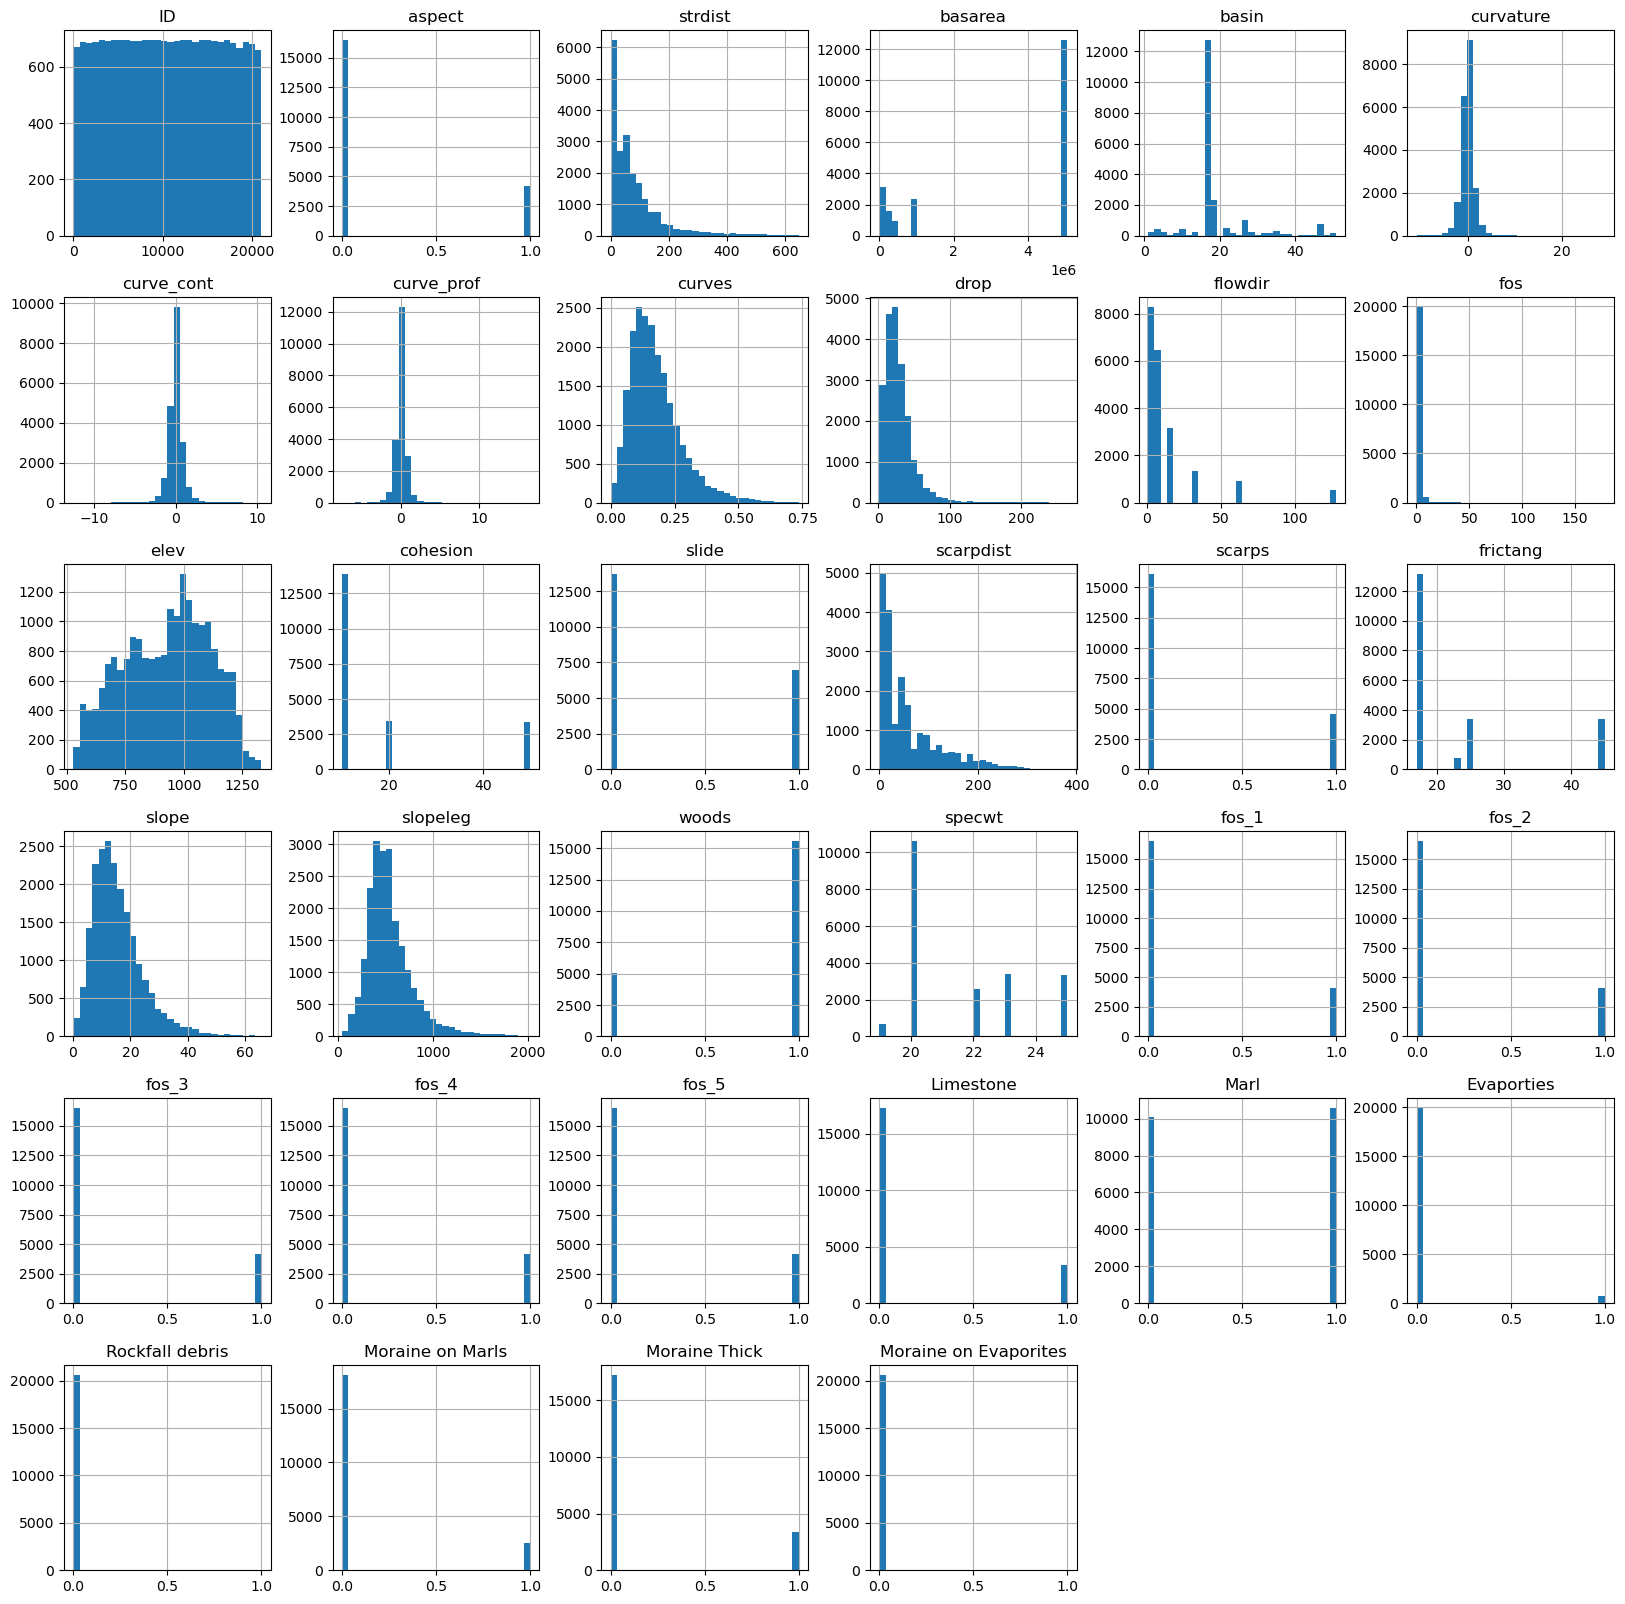

In [317]:
#Histogram of the Data after correction in SLide Value
df_clean.hist(bins = 30, figsize = (20,20));

In [318]:
##To check the data outliers in each feature
# def box_plots(feature):
#     plt.figure (figsize=(5,4))
#     df_clean[feature].plot(kind='box', color='blue', vert=False)

# for i in df_clean.columns:
#     box_plots(i)

# TRANSFORMING, NORMALIZING, and RE-SCALING
In this step, we do the data transformation into normal distribution data and data re-scaling. The data transformation could help a better result (model of prediction) when it is numerically in a normal distribution. The method to transform the data distribution, based on the Module in Scikit, are **Quantile Transform, Log, Yeo-Jhonson,** and **Box-Cox**, in which we can **decide it subjectively**. For the data re-scaling, we apply for data in each feature a range of either **(0 - 1)** or **((-1) - 1)**.

The Flow of Processing:
<ol>
    <li>We create a function to automatically plot the distribution of the data with all methods.</li>
    <li>We classify each feature manually into a particular method of transformation, or even for no transformation.</li>
    <li>Re-Scale the data by the range of <b>(0 - 1) if our data has a minimum above 0</b>, or <b>((-1) - 1) if our data has a minimum below 0</b>.</li>
     <li>New Data Frame after transformation and re-scaling all the features: <b>df_trans</b>.</li>
</ol>

In [319]:
#Function for Transformation Distribution Plot
def plots(df, var, t1, t2, t3, t4):
    plt.figure (figsize=(20,5))
    plt.subplot(151)
    sns.kdeplot(df[var])
    plt.title ('before')
    
    plt.subplot(152)
    p1 = t1.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' +str(t1).split('(')[0])
    
    plt.subplot(153)
    p2 = t2(np.expm1((df[var]+abs(min(df[var])))/200))
    sns.kdeplot(p2)
    plt.title('after ' +str(t2).split('(')[0])
    
    if min(df[var])>0:
        
        plt.subplot(154)
        p3 = t3.fit_transform(df[[var]]).flatten()
        sns.kdeplot(p3)
        plt.title('after (yeo-Jhonson) ' +str(t3).split('(')[0])
    
        plt.subplot(155)
        p4 = t4.fit_transform(df[[var]]).flatten()
        sns.kdeplot(p4)
        plt.title('after (box-cox) ' +str(t4).split('(')[0])
        
    else:
        plt.subplot(154)
        p3 = t3.fit_transform(df[[var]]).flatten()
        sns.kdeplot(p3)
        plt.title('after (yeo-Jhonson) ' +str(t3).split('(')[0])
    

C:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

overflow encountered in expm1

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\373376597.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



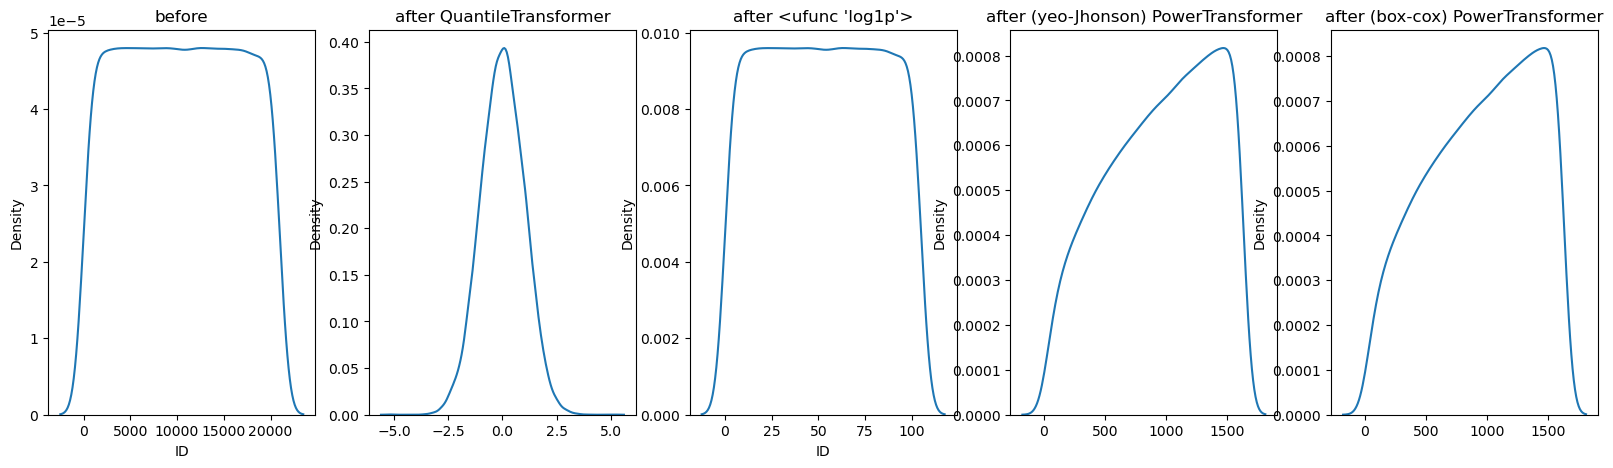

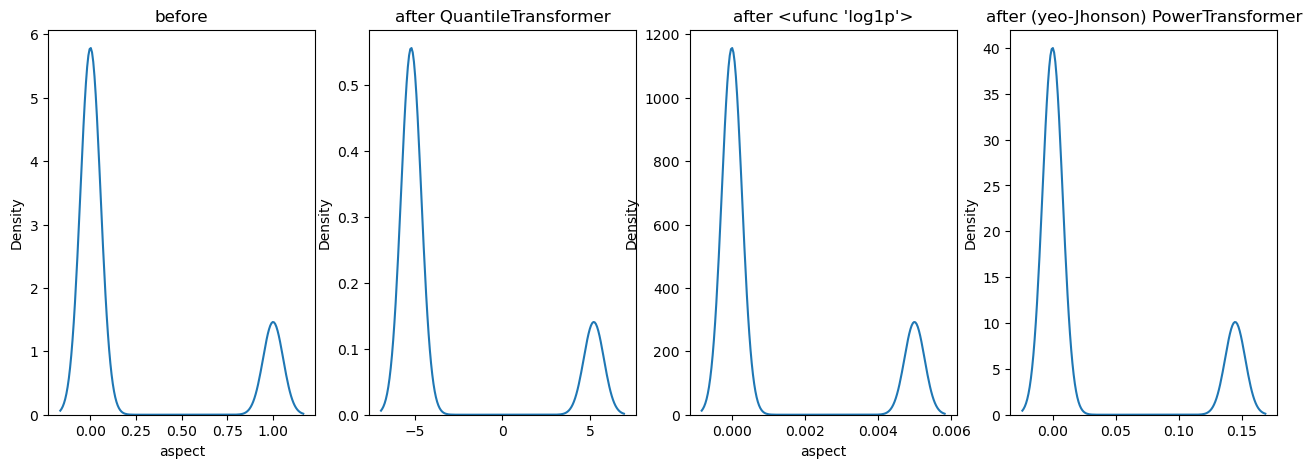

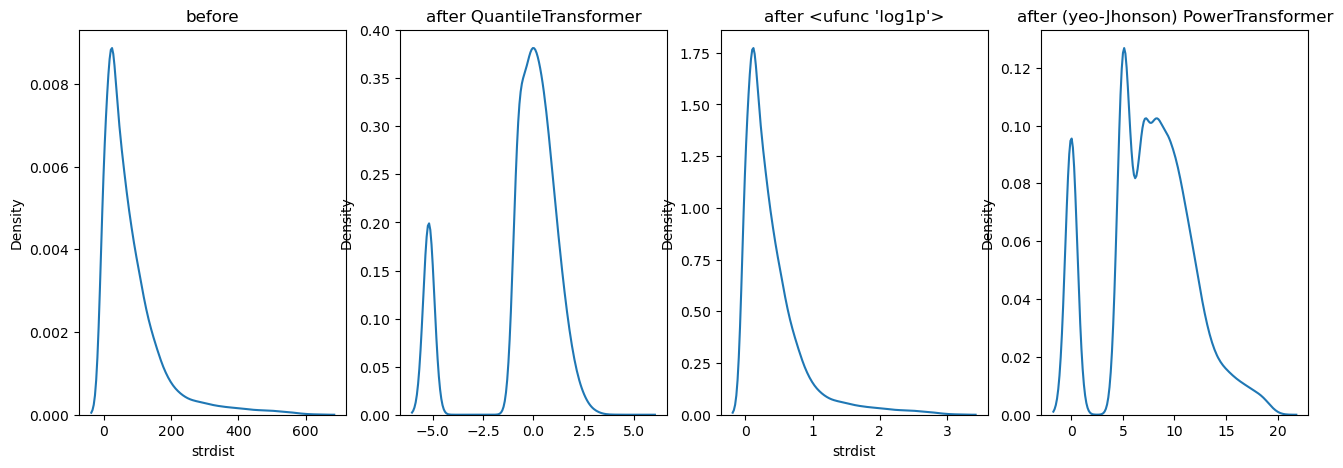

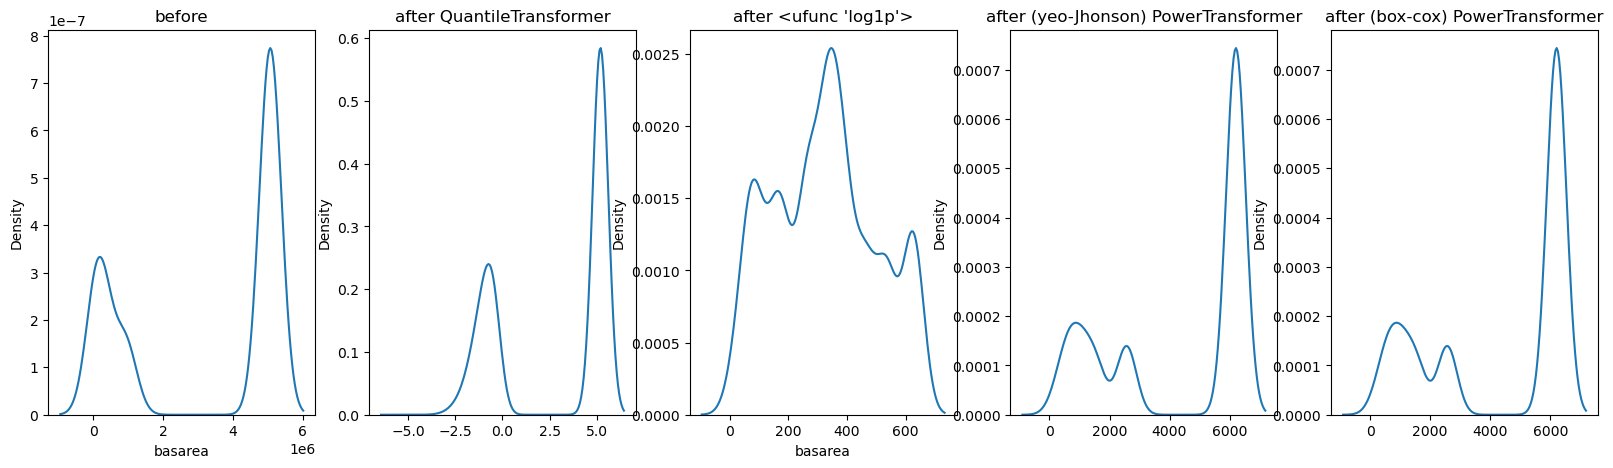

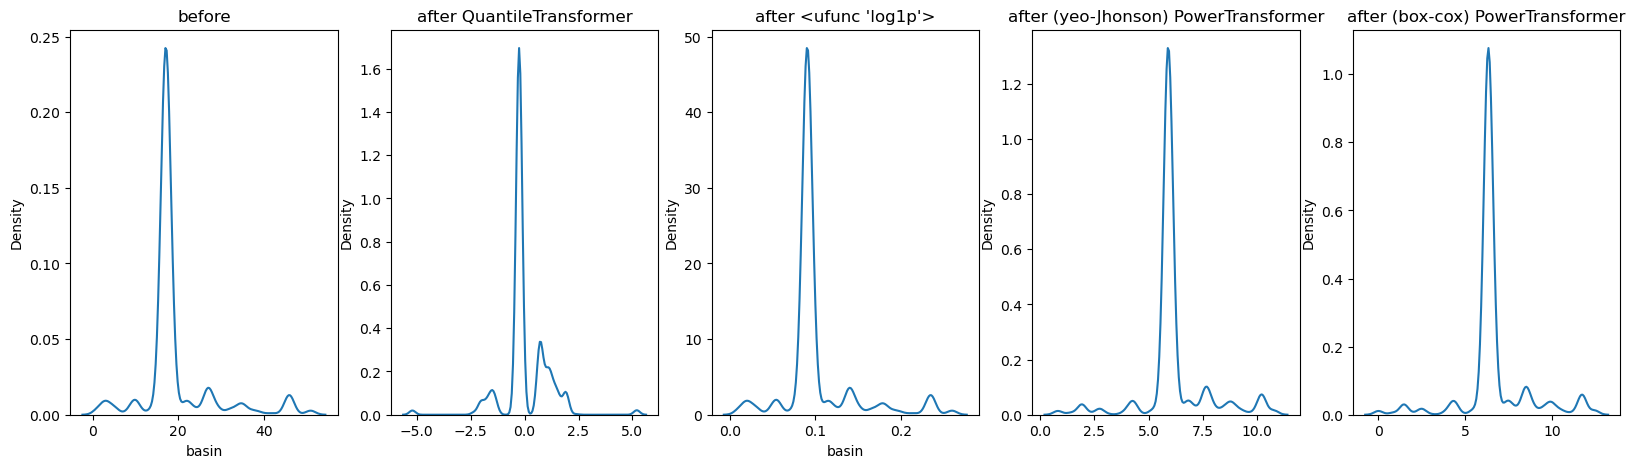

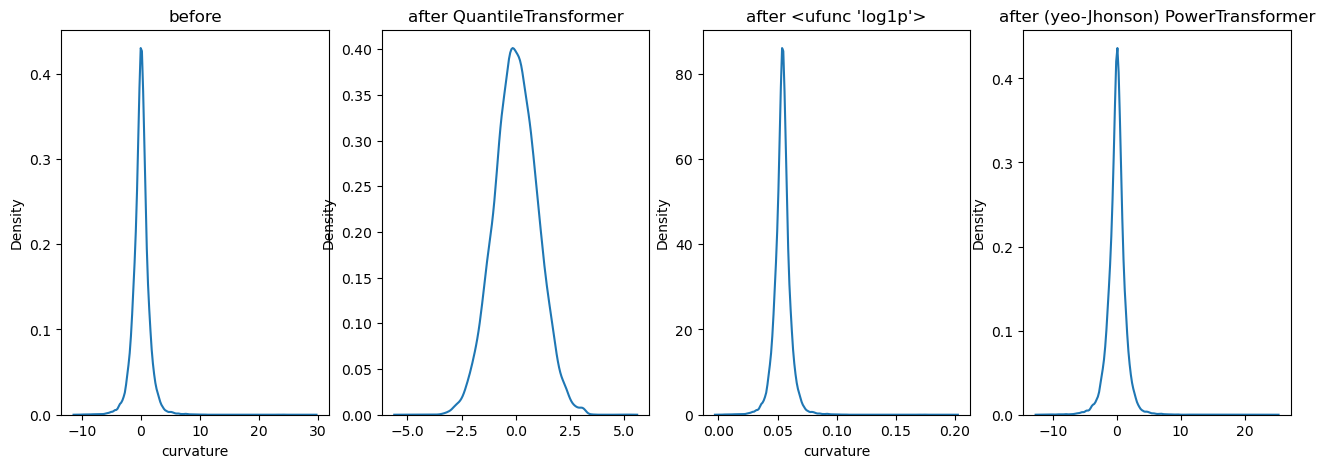

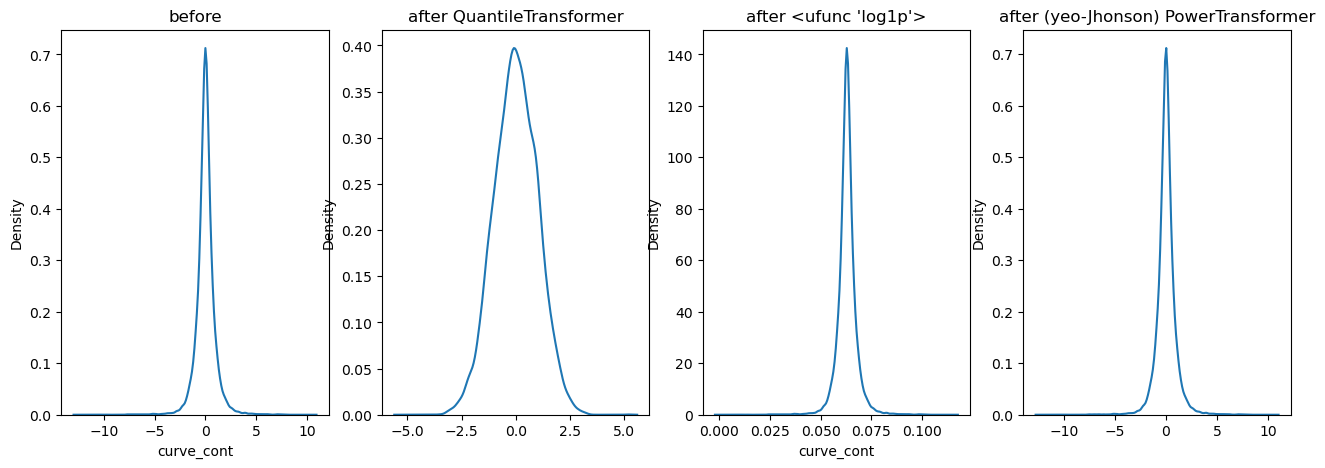

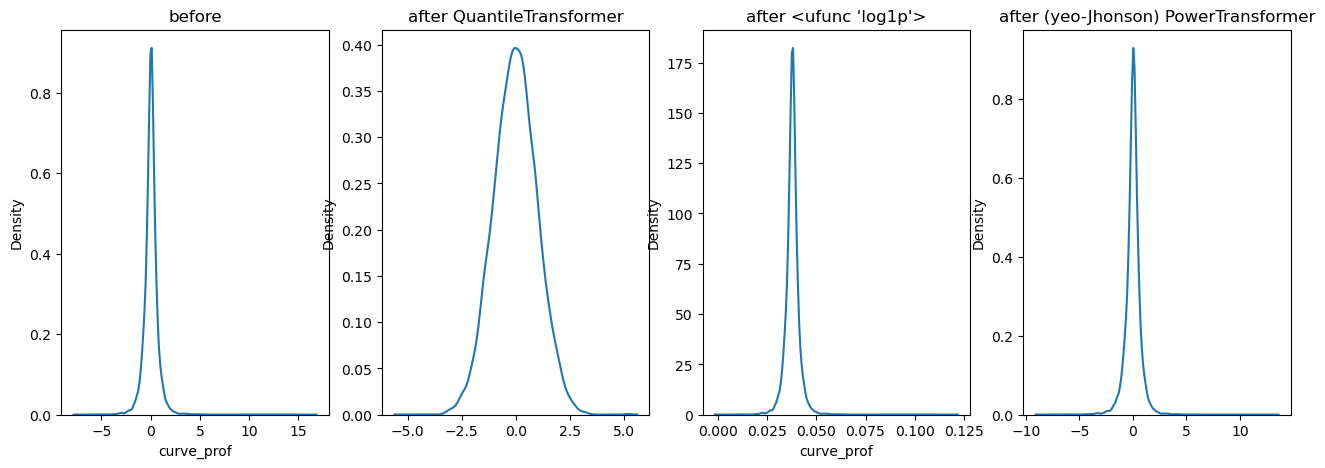

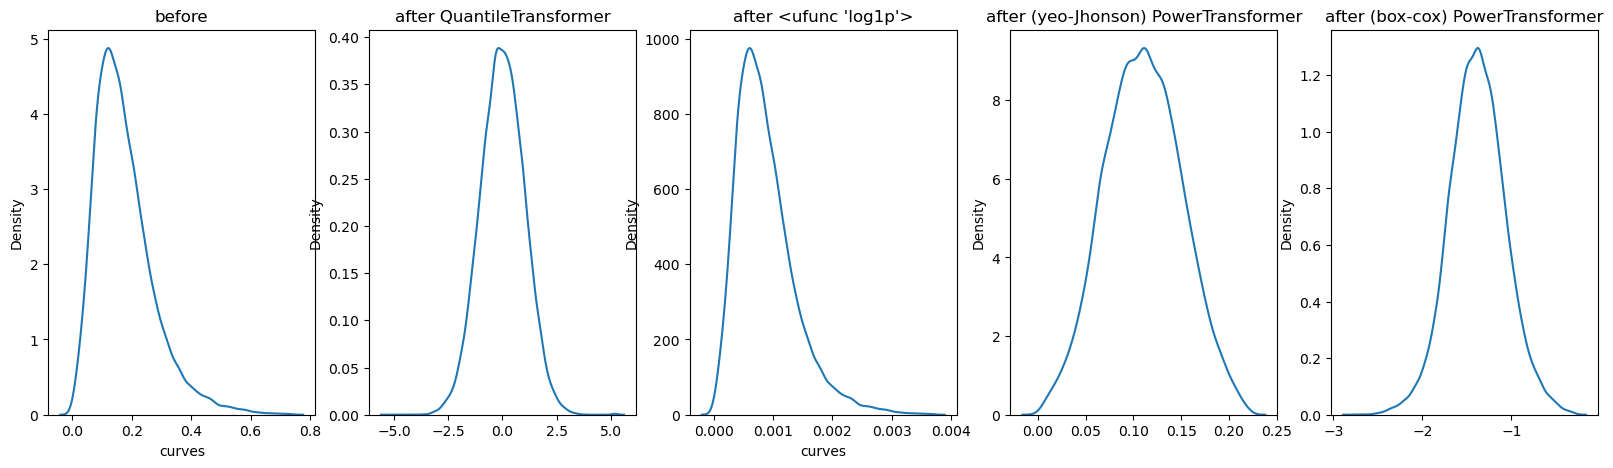

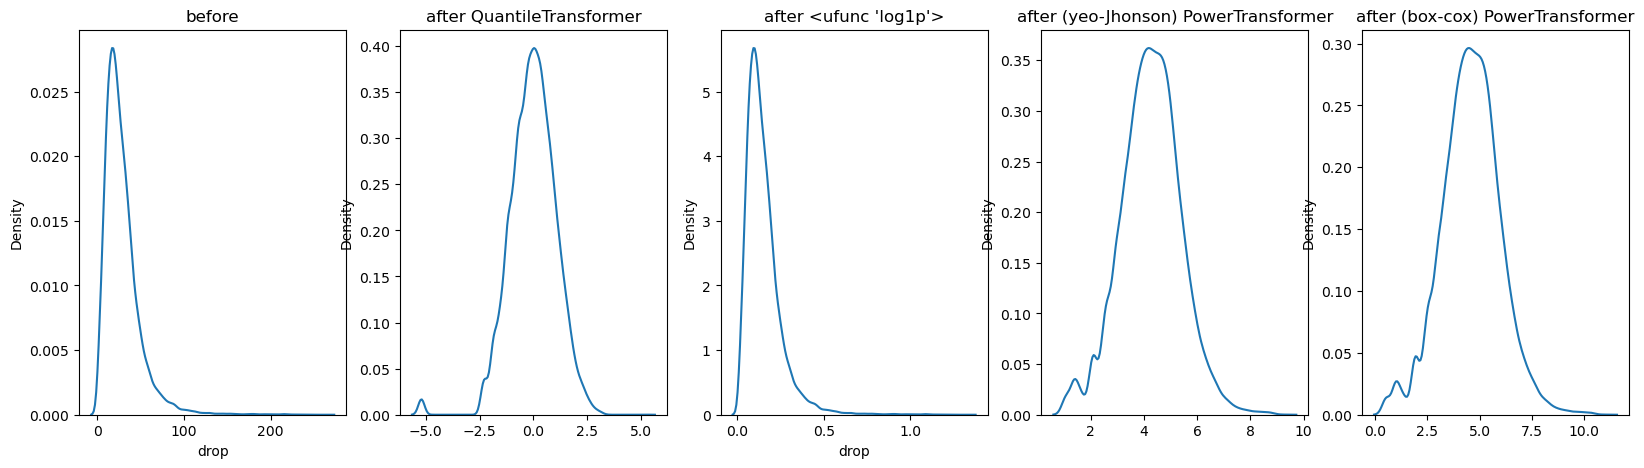

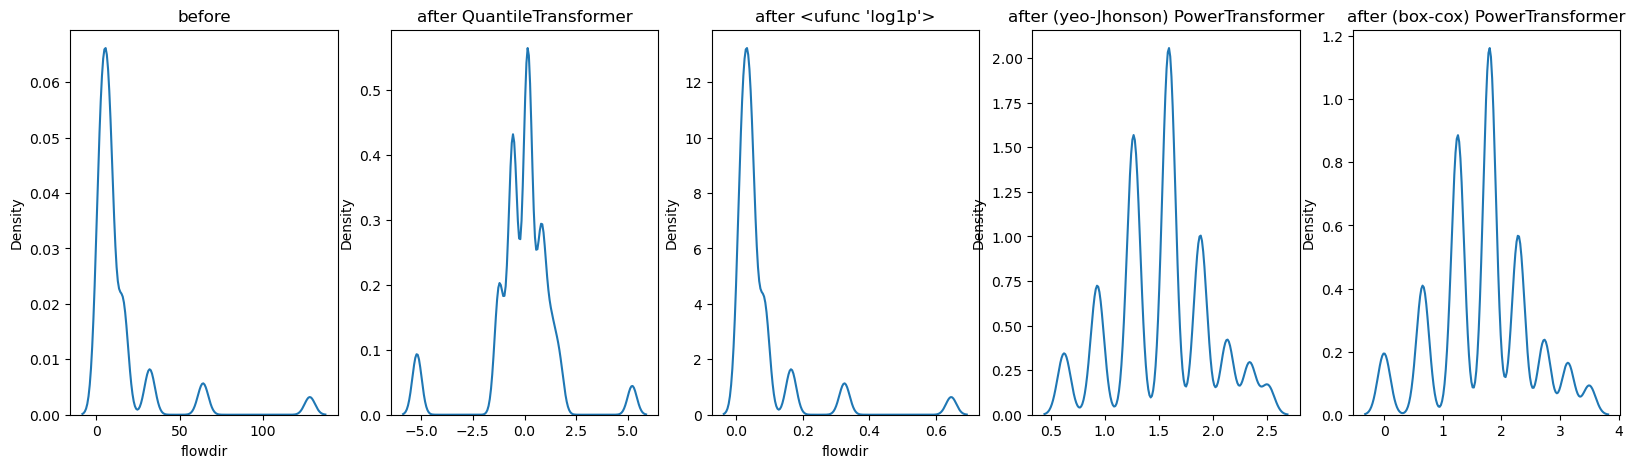

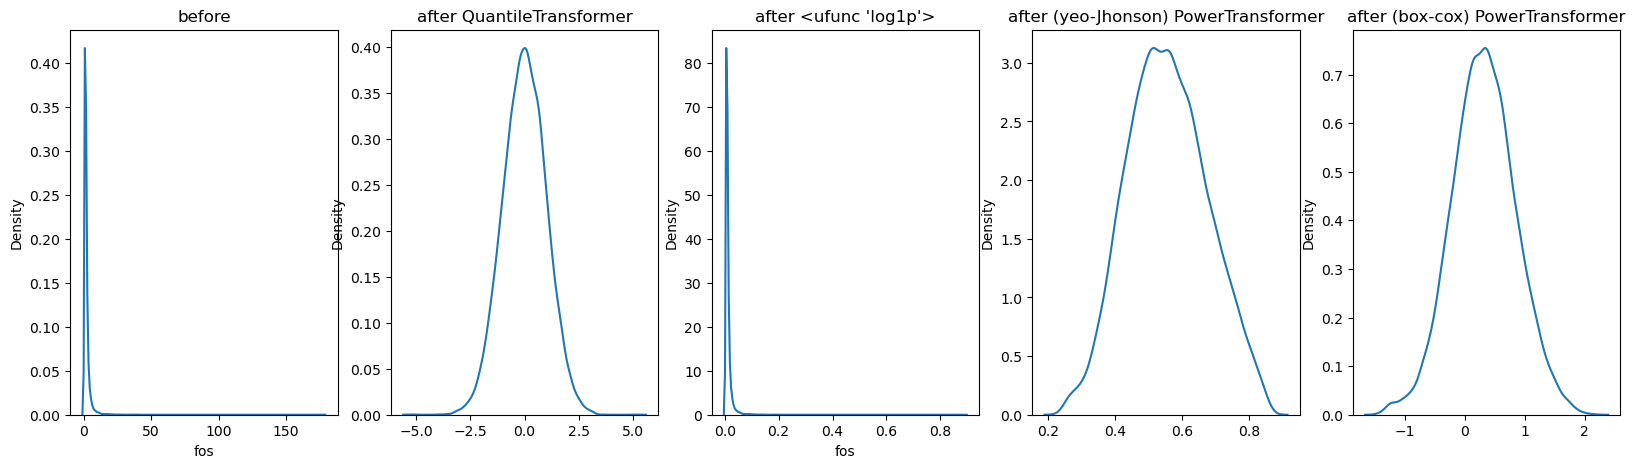

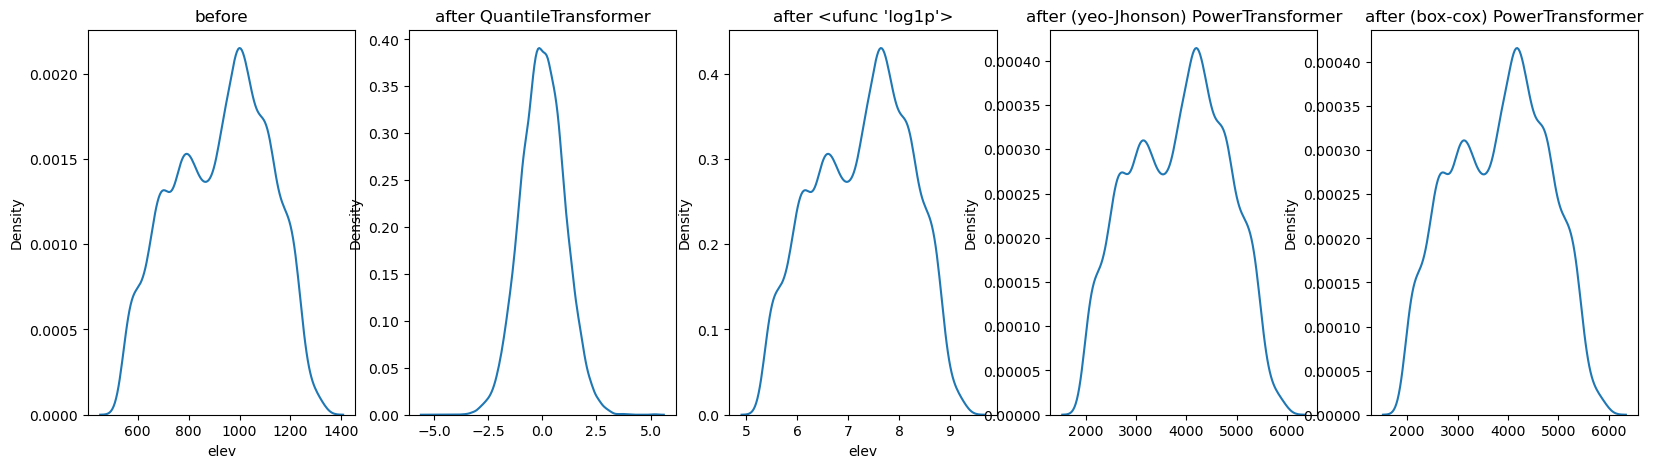

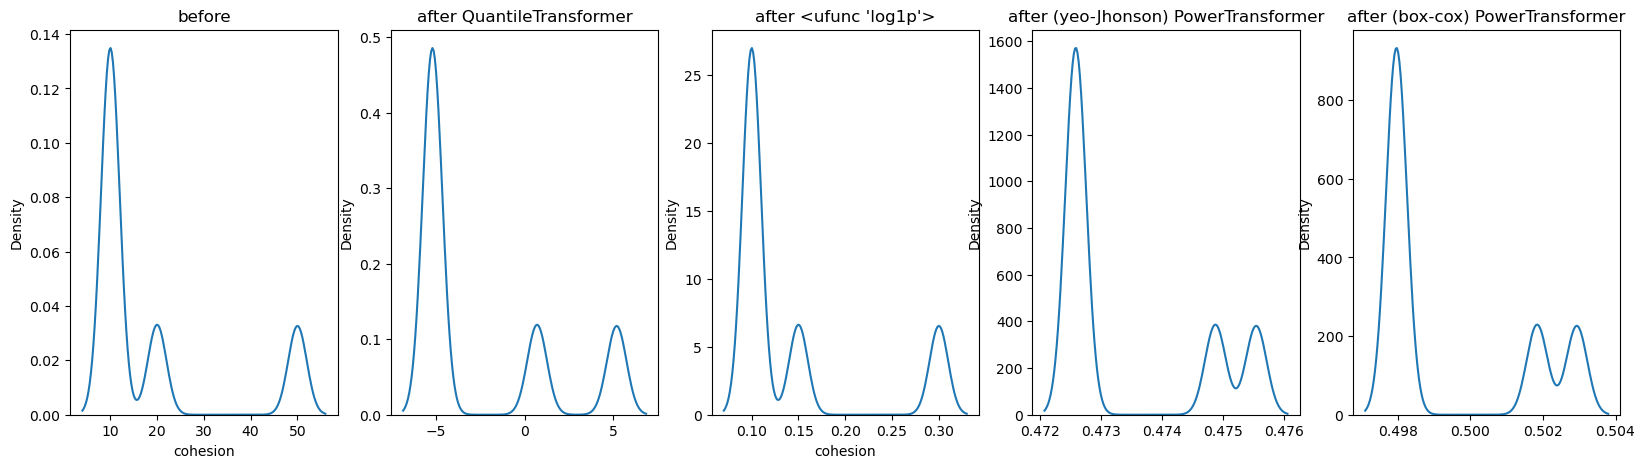

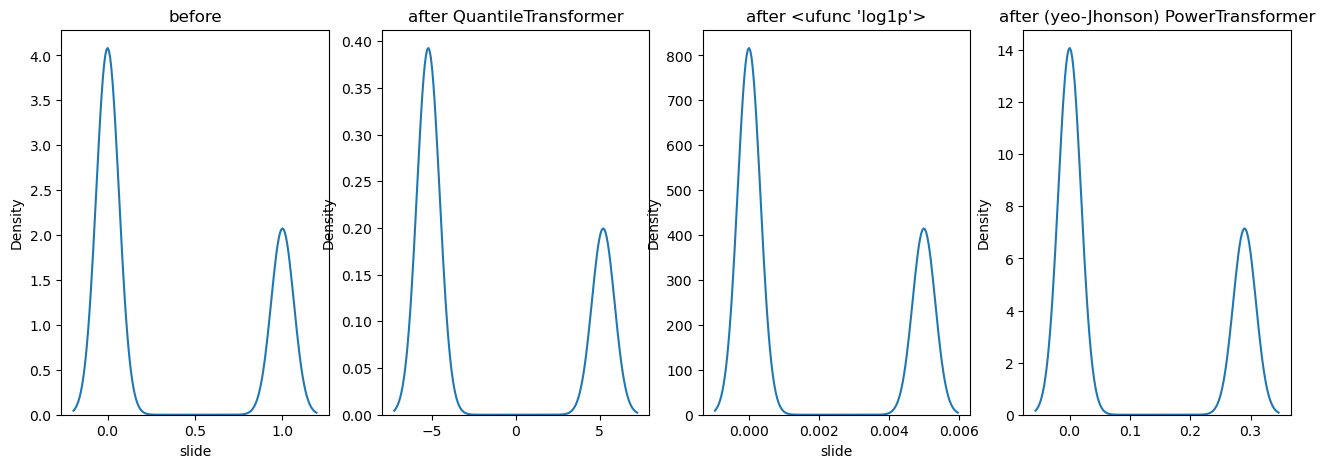

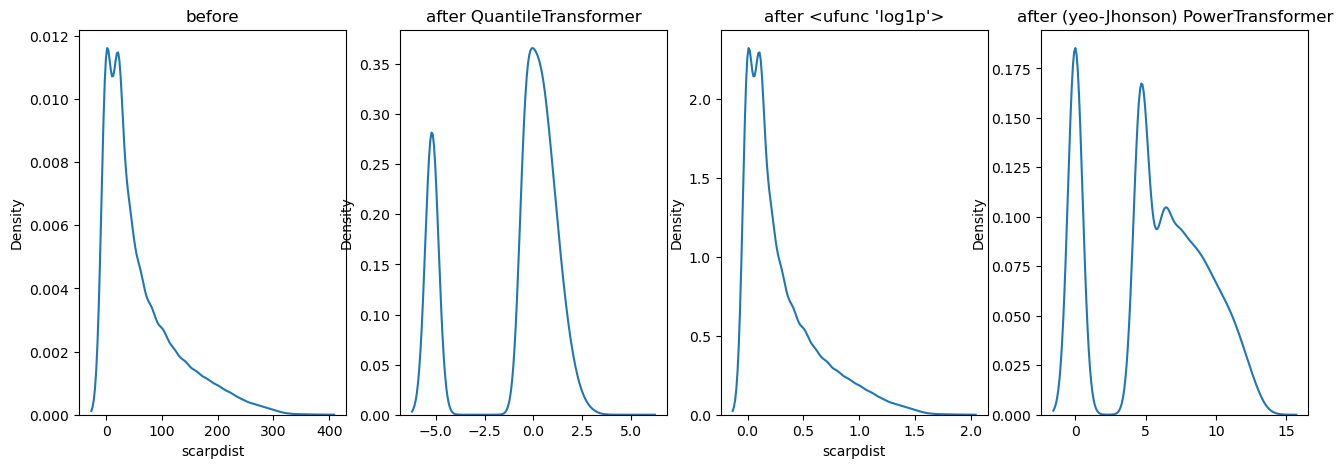

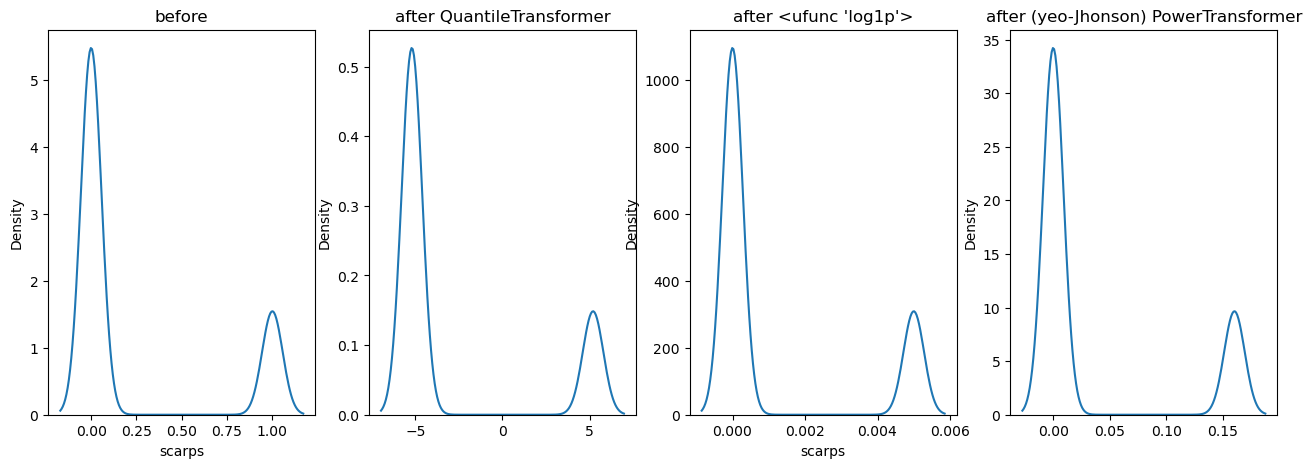

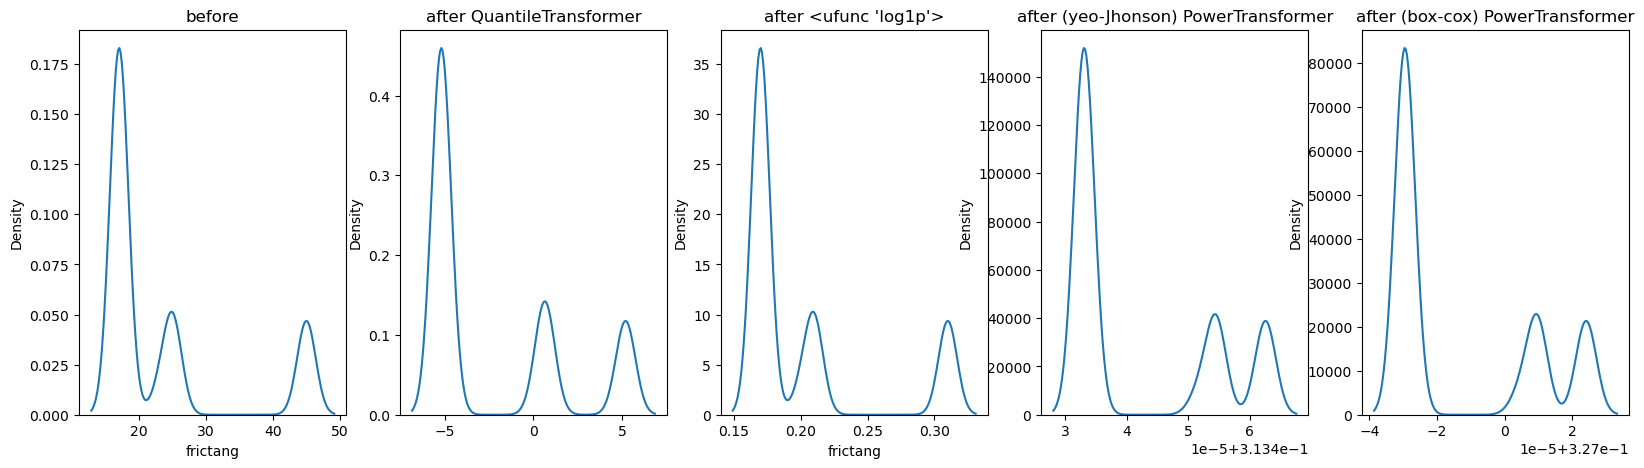

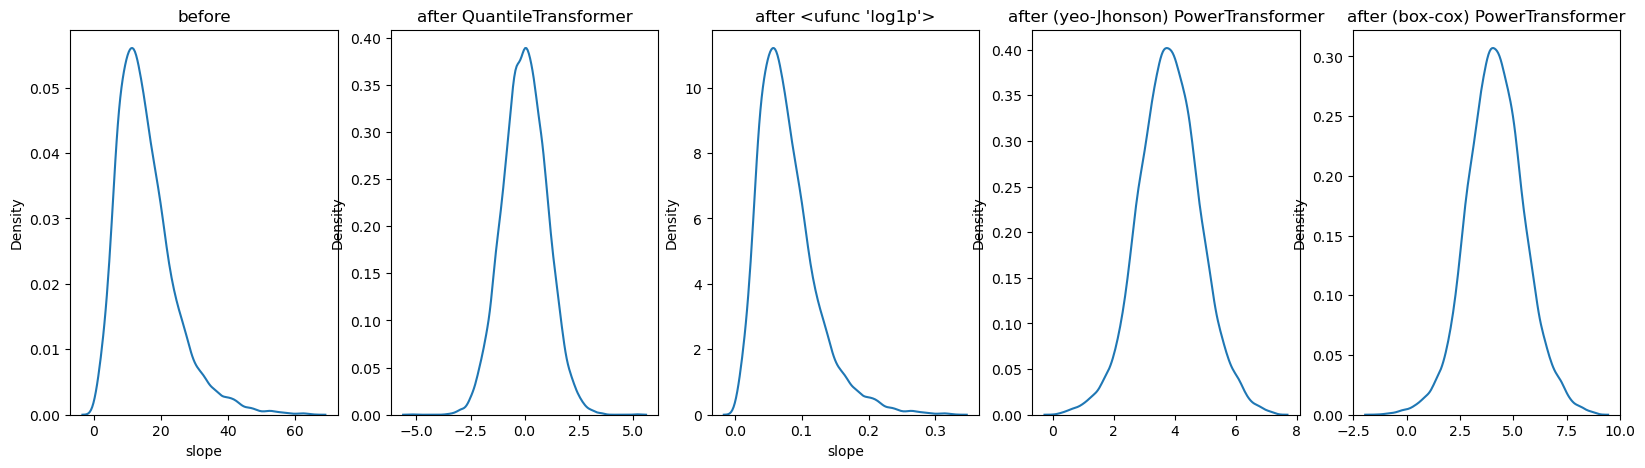

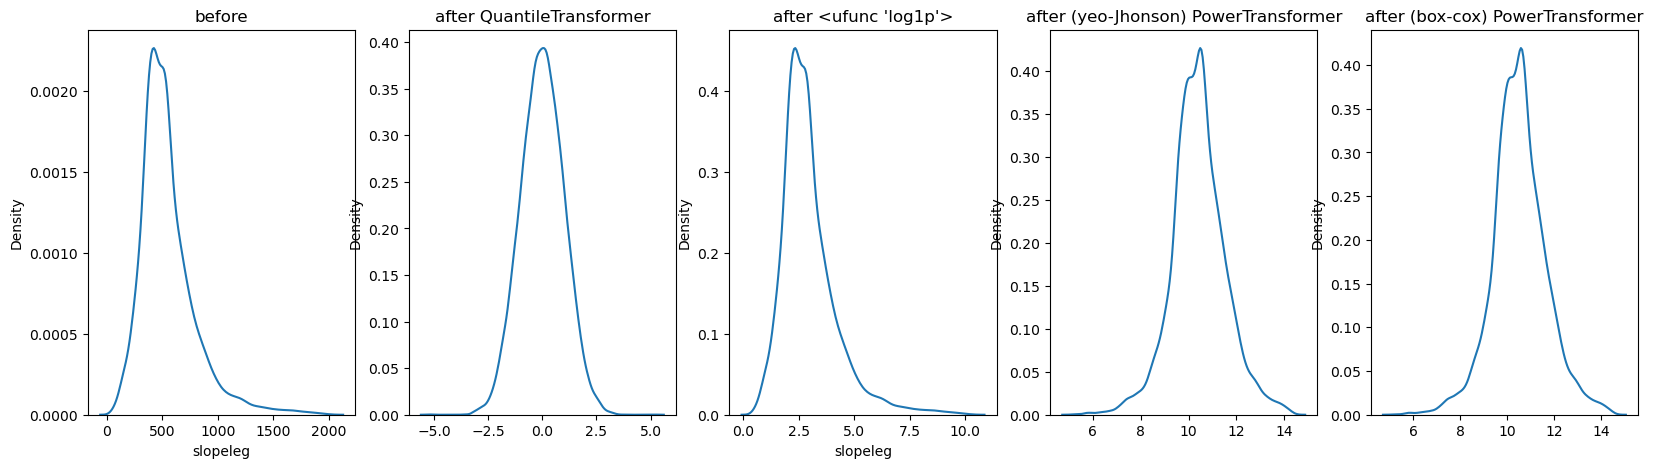

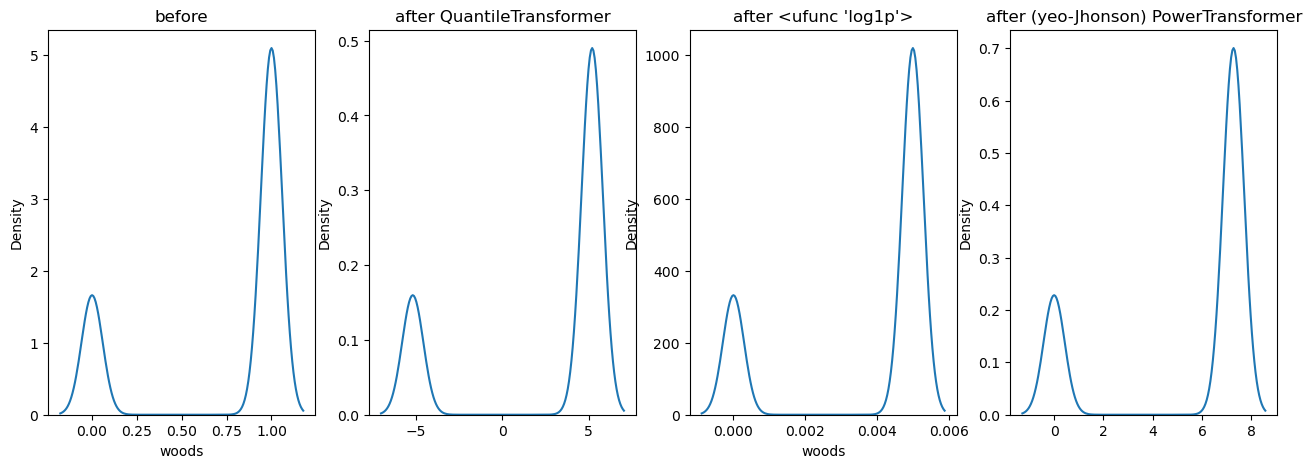

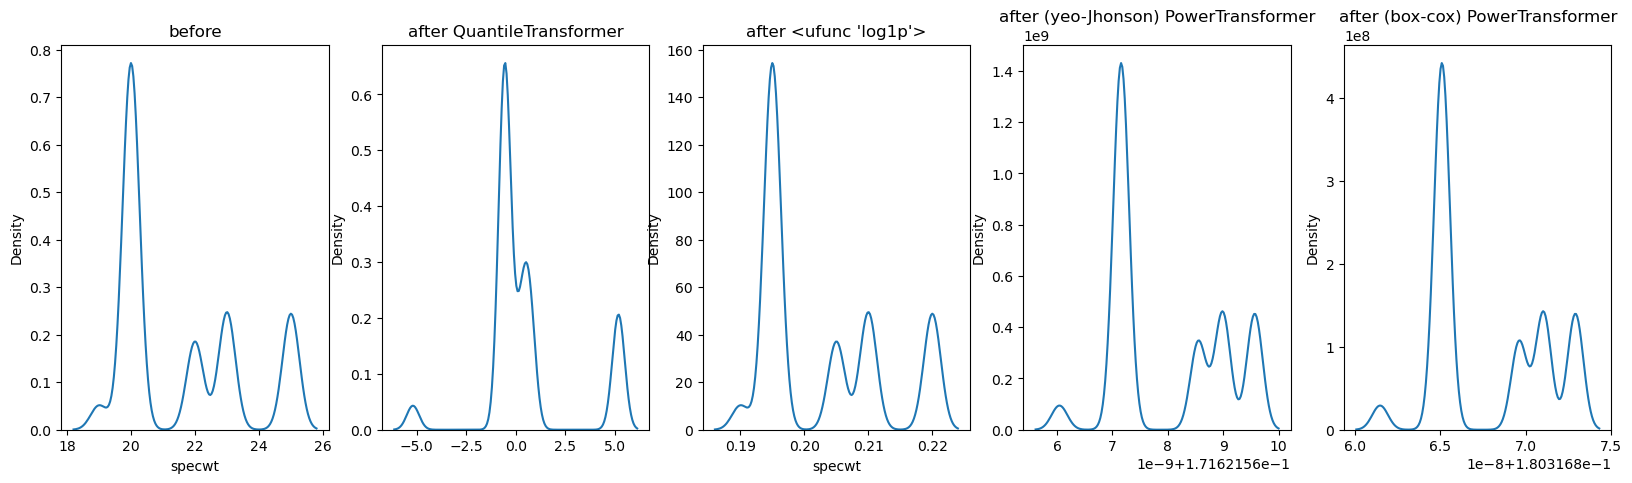

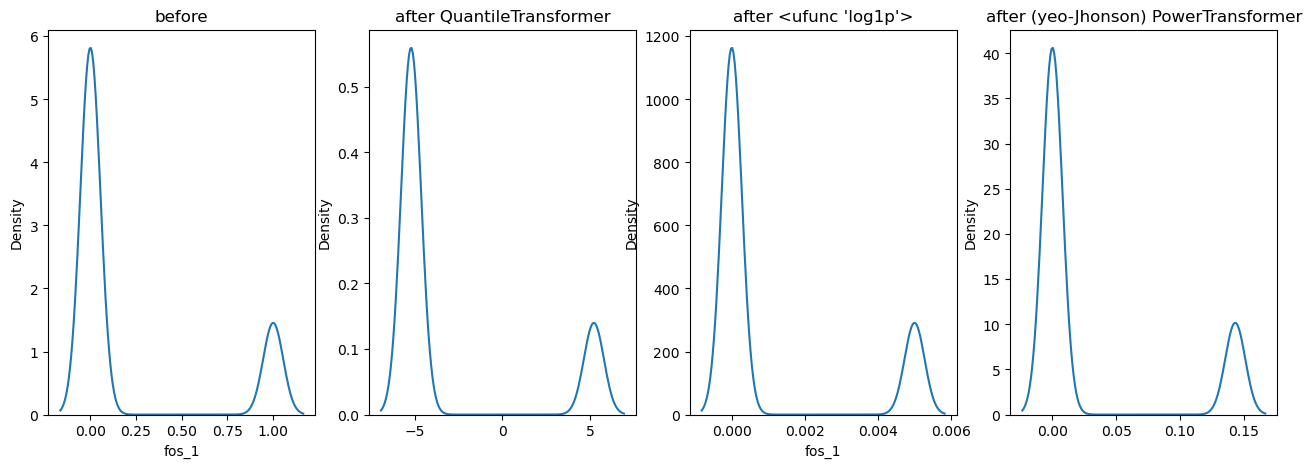

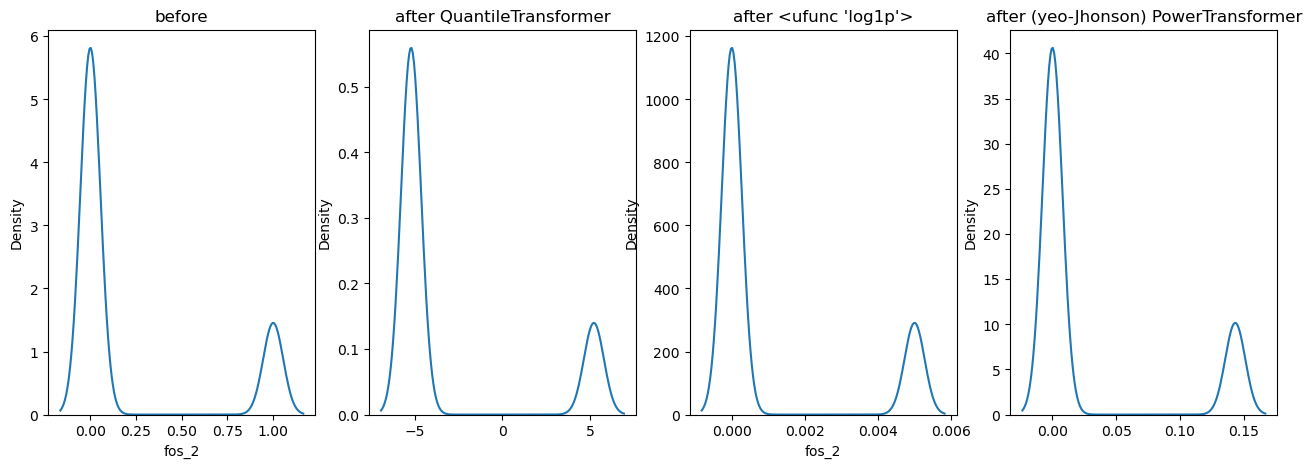

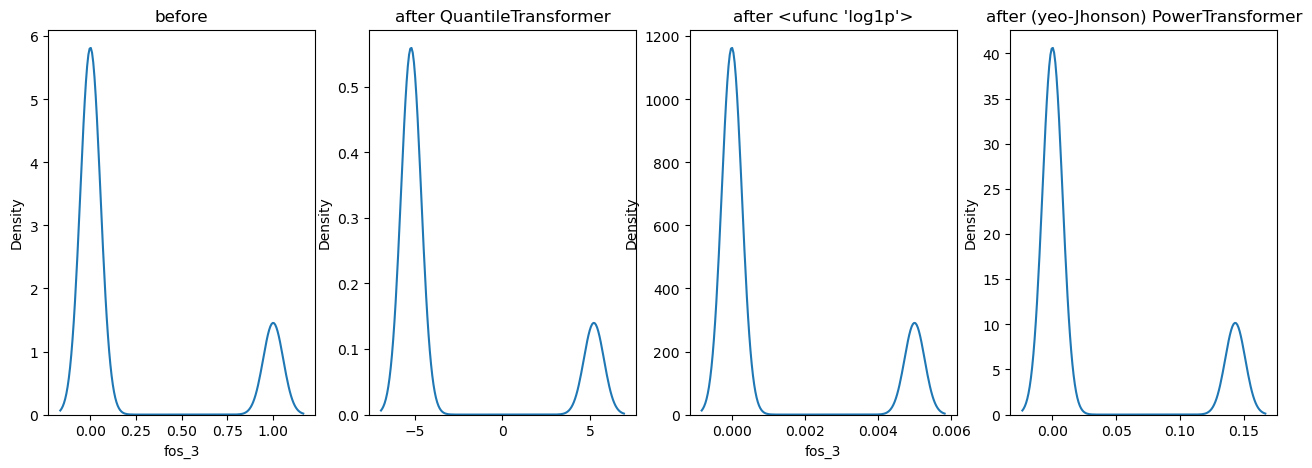

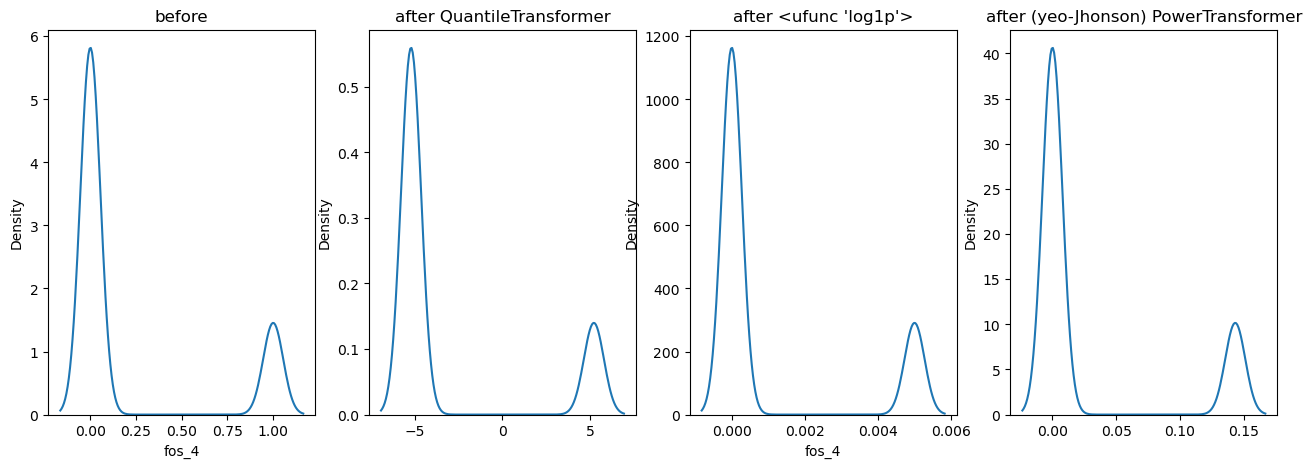

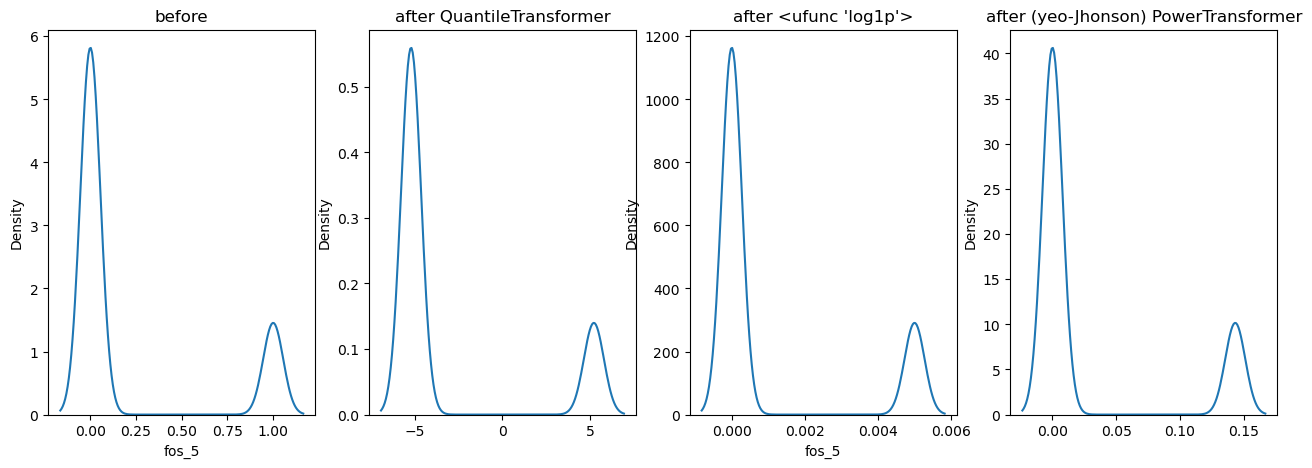

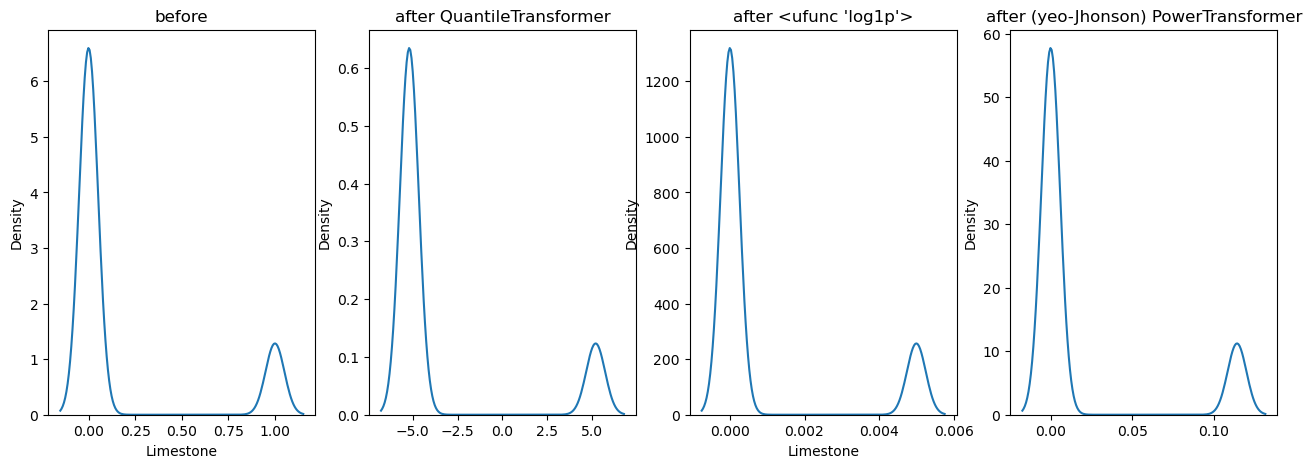

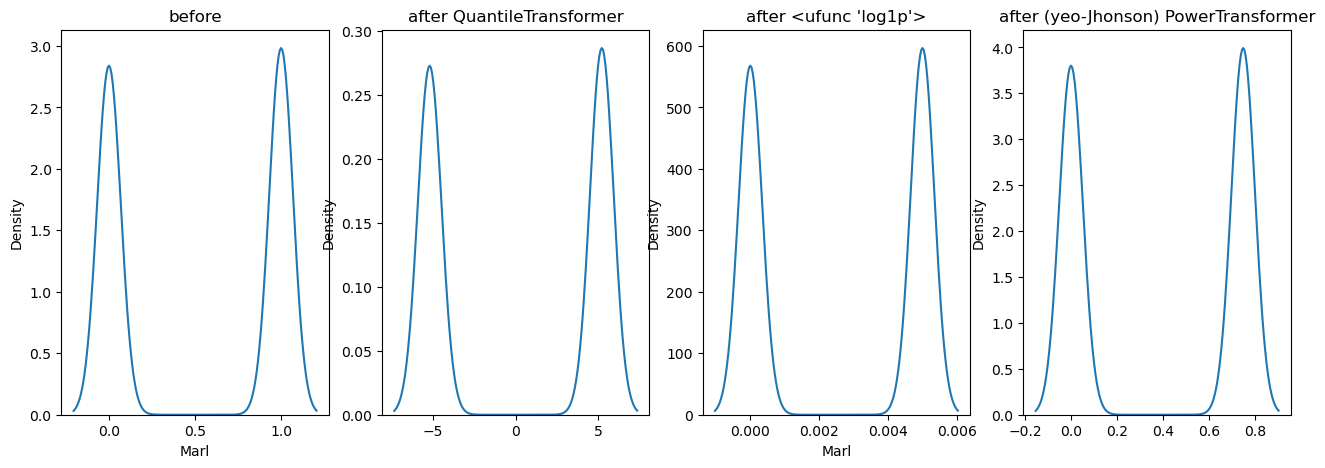

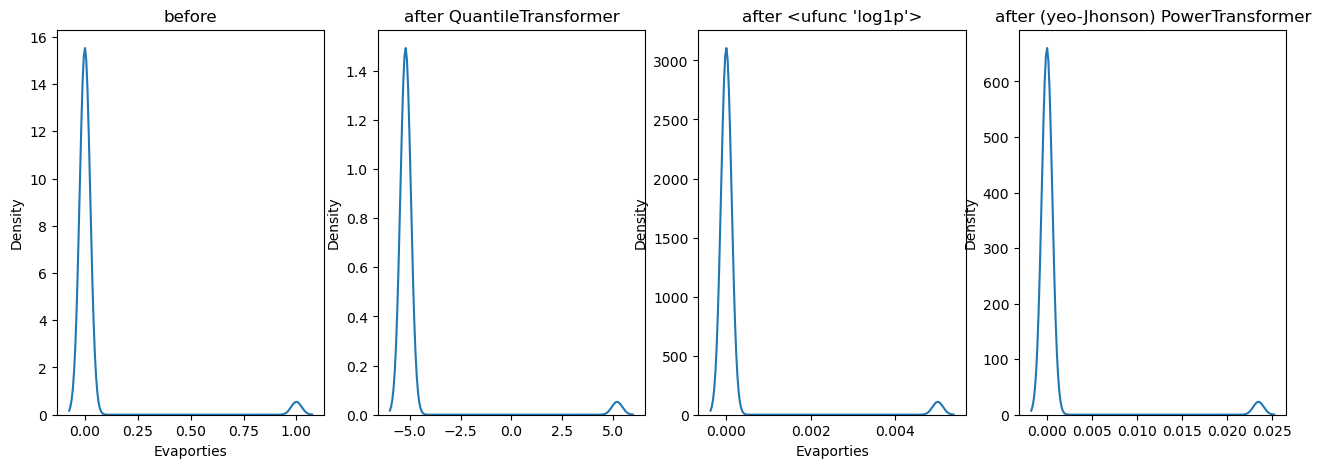

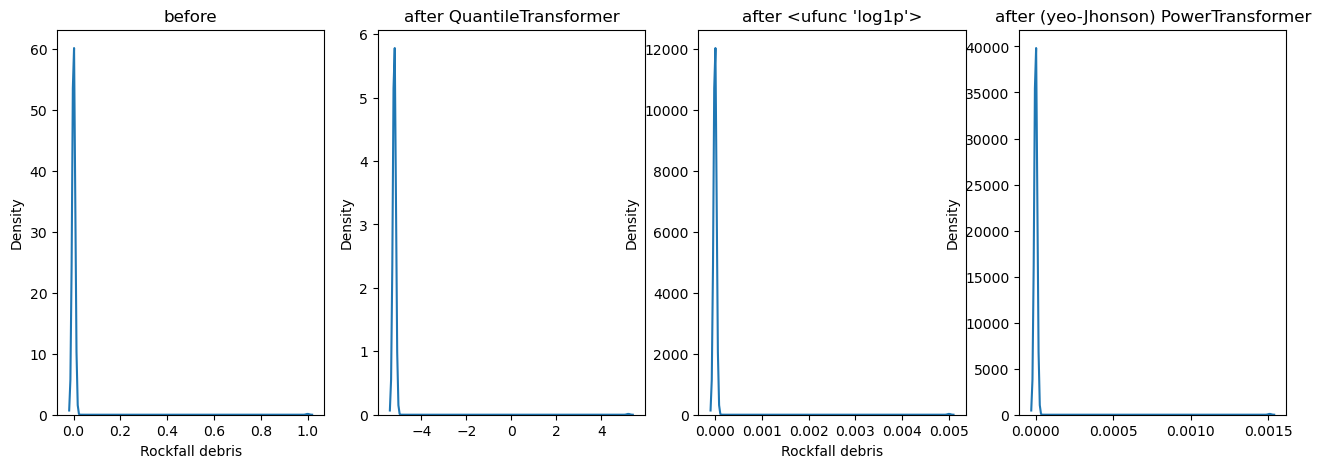

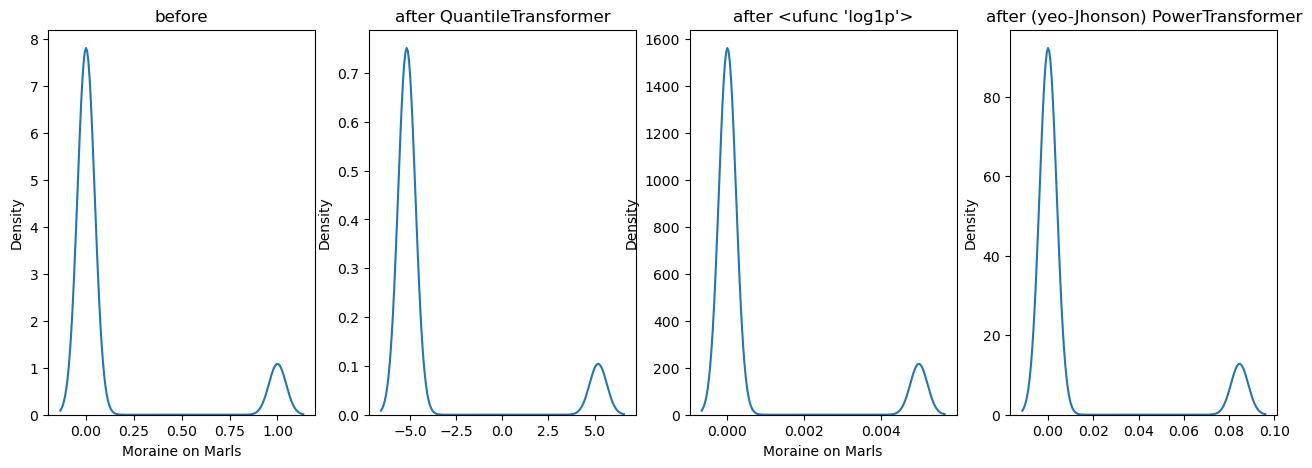

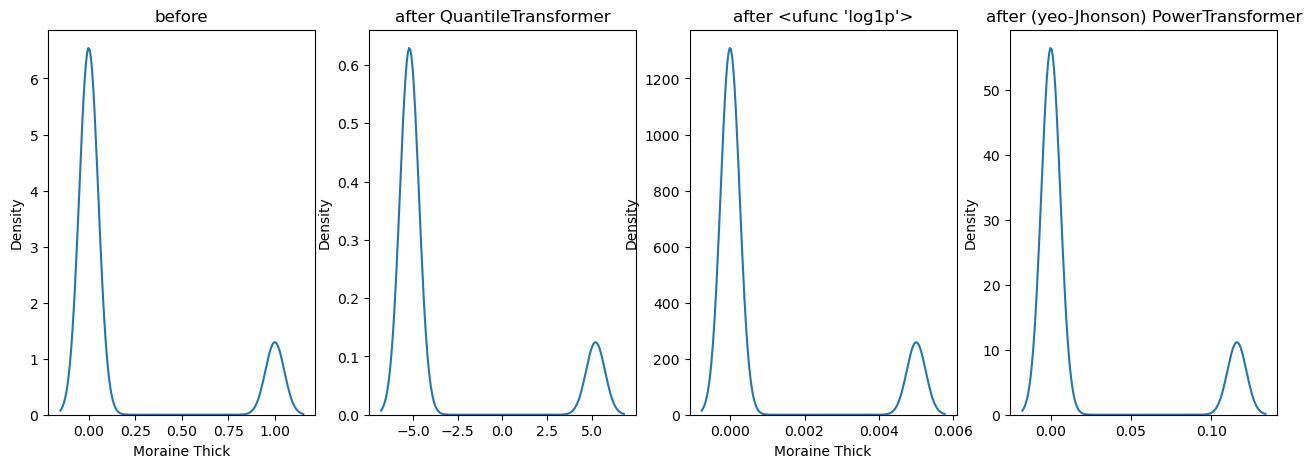

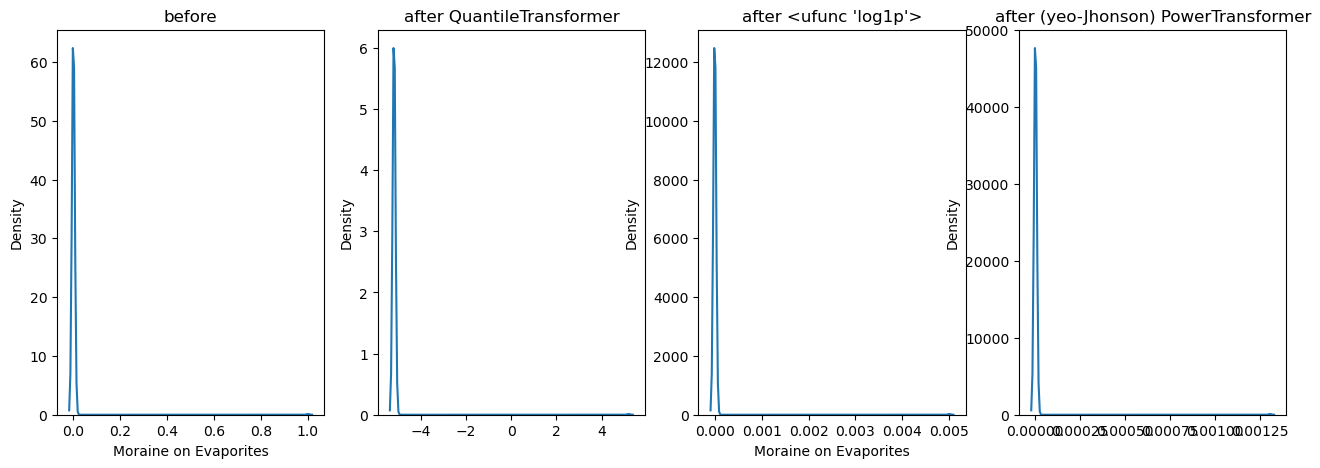

In [320]:
for col in df_clean.columns:
    plots(df_clean, col, QuantileTransformer(output_distribution='normal'), np.log1p, PowerTransformer(method='yeo-johnson', standardize=False), PowerTransformer(method='box-cox', standardize=False))

In [321]:
#Manual Selection for Transformation's Method
column_quantile=['curvature','curve_cont','curve_prof','fos']
column_log=['specwt']
column_yeojhon=['curves','slope']
column_boxcox=['drop','slopeleg']
column_untransform=['strdist','cohesion','scarpdist','elev','basarea','frictang']
column_unchanged=['ID','aspect','basin','flowdir','Limestone','Marl', 'Evaporties', 'Rockfall debris', 'Moraine on Marls', 'Moraine Thick', 'Moraine on Evaporites','slide','scarps','woods', 'fos_1','fos_2','fos_3','fos_4','fos_5']

In [322]:
#Data Normalization
df_trans = df_clean
for a in column_quantile:
    locals()['trans_'+a] = QuantileTransformer(output_distribution='normal').fit_transform(df_trans[[a]]).flatten()
    if min(locals()['trans_'+a]) >= 0: 
        locals()['trans_'+a] = MinMaxScaler().fit_transform(locals()['trans_'+a].reshape(-1,1))
    else:
        locals()['trans_'+a] = MaxAbsScaler().fit_transform(locals()['trans_'+a].reshape(-1,1))

for aa in column_log:
    locals()['trans_'+aa] = QuantileTransformer(output_distribution='normal').fit_transform(df_trans[[aa]]).flatten()
    if min(locals()['trans_'+aa]) >= 0: 
        locals()['trans_'+aa] = MinMaxScaler().fit_transform(locals()['trans_'+aa].reshape(-1,1))
    else:
        locals()['trans_'+aa] = MaxAbsScaler().fit_transform(locals()['trans_'+aa].reshape(-1,1))
        
for b in column_yeojhon:
    locals()['trans_'+b] = PowerTransformer(method='yeo-johnson', standardize=False).fit_transform(df_trans[[b]]).flatten()
    if min(locals()['trans_'+b]) >= 0: 
        locals()['trans_'+b] = MinMaxScaler().fit_transform(locals()['trans_'+b].reshape(-1,1))
    else:
        locals()['trans_'+b] = MaxAbsScaler().fit_transform(locals()['trans_'+b].reshape(-1,1))
        
for c in column_boxcox:
    locals()['trans_'+c] = PowerTransformer(method='box-cox', standardize=False).fit_transform(df_trans[[c]]).flatten()
    if min(locals()['trans_'+a]) >= 0: 
        locals()['trans_'+c] = MinMaxScaler().fit_transform(locals()['trans_'+c].reshape(-1,1))
    else:
        locals()['trans_'+c] = MaxAbsScaler().fit_transform(locals()['trans_'+c].reshape(-1,1))

for d in column_untransform:
    locals()['trans_'+d] = df_trans[d].values
    if min(locals()['trans_'+d]) >= 0: 
        locals()['trans_'+d] = MinMaxScaler().fit_transform(locals()['trans_'+d].reshape(-1,1))
    else:
        locals()['trans_'+d] = MaxAbsScaler().fit_transform(locals()['trans_'+d].reshape(-1,1))
        
for e in column_unchanged:
    locals()['trans_'+e] = df_trans[e].values

In [323]:
## Manual Code for Normalizing
# for i in df_trans.columns:
#     if min(df_trans[i]) > 0:
#         for m in range(len(df_trans[i])):
#             df_trans[i][m] = (df_trans[i][m] - min(df_trans[i]))/(max(df_trans[i]) - min(df_trans[i]))
#     else:
#         for n in range(len(df_trans[i])):
#             if df_trans[i][n] < 0:  
#                 df_trans[i][n] = (0 - df_trans[i][n]) / (0 - min(df_trans[i]))*(-1)
#             else:
#                 df_trans[i][n] = df_trans[i][n] / max(df_trans[i])

In [324]:
#Creating a list of Variable's name after transformation and normalization
comb_trans=[]
for i in df_trans.columns:
    comb_trans.append('trans_'+i)

In [325]:
#Creating Dataframe for Transformed and Normalized dataset
red = {}

for yy in comb_trans:
    red[yy] = locals()[yy].flatten().tolist()
    
df_trans = pd.DataFrame(red, columns=comb_trans)
df_trans

trans_ID  trans_aspect  trans_strdist  trans_basarea  trans_basin  \
0             3           0.0       0.995701       0.012710          1.0   
1             4           0.0       1.000000       0.012710          1.0   
2             7           1.0       0.965072       0.012710          1.0   
3             8           1.0       0.969507       0.012710          1.0   
4             9           0.0       0.974900       0.012710          1.0   
...         ...           ...            ...            ...          ...   
20656     20993           1.0       0.069039       0.059209         46.0   
20657     20994           1.0       0.043664       0.059209         46.0   
20658     20995           1.0       0.030875       0.059209         46.0   
20659     20997           1.0       0.030875       0.059209         46.0   
20660     20998           1.0       0.000000       0.059209         46.0   

       trans_curvature  trans_curve_cont  trans_curve_prof  trans_curves  \
0            -0.317479          0.184959         -0.393337      0.607534   
1             0.355367         -0.427060          0.124124      0.448494   
2            -0.001592         -0.032176         -0.037387      0.513891   
3            -0.282091          0.233169         -0.294105      0.609713   
4             0.364647         -0.419777          0.179824      0.463558   
...                ...               ...               ...           ...   
20656        -0.088062          0.074975         -0.092082      0.348526   
20657         0.047400         -0.069703          0.011712      0.192720   
20658         0.143501         -0.207057          0.002024      0.184993   
20659         0.263708         -0.281488          0.202022      0.511799   
20660        -0.117171          0.240926          0.143289      0.296874   

       trans_drop  ...  trans_fos_3  trans_fos_4  trans_fos_5  \
0        0.426579  ...            1            0            0   
1        0.518247  ...            0            0            0   
2        0.426579  ...            0            0            0   
3        0.426579  ...            0            0            0   
4        0.530779  ...            0            0            0   
...           ...  ...          ...          ...          ...   
20656    0.317930  ...            0            0            1   
20657    0.273016  ...            0            0            1   
20658    0.307604  ...            0            0            1   
20659    0.461014  ...            0            0            1   
20660    0.386275  ...            0            0            1   

       trans_Limestone  trans_Marl  trans_Evaporties  trans_Rockfall debris  \
0                    0           0                 1                      0   
1                    0           0                 1                      0   
2                    0           0                 1                      0   
3                    0           0                 1                      0   
4                    0           0                 1                      0   
...                ...         ...               ...                    ...   
20656                0           0                 0                      0   
20657                0           0                 0                      0   
20658                0           0                 0                      0   
20659                0           0                 0                      0   
20660                0           0                 0                      0   

       trans_Moraine on Marls  trans_Moraine Thick  \
0                           0                    0   
1                           0                    0   
2                           0                    0   
3                           0                    0   
4                           0                    0   
...                       ...                  ...   
20656                       0                    1   
20657              

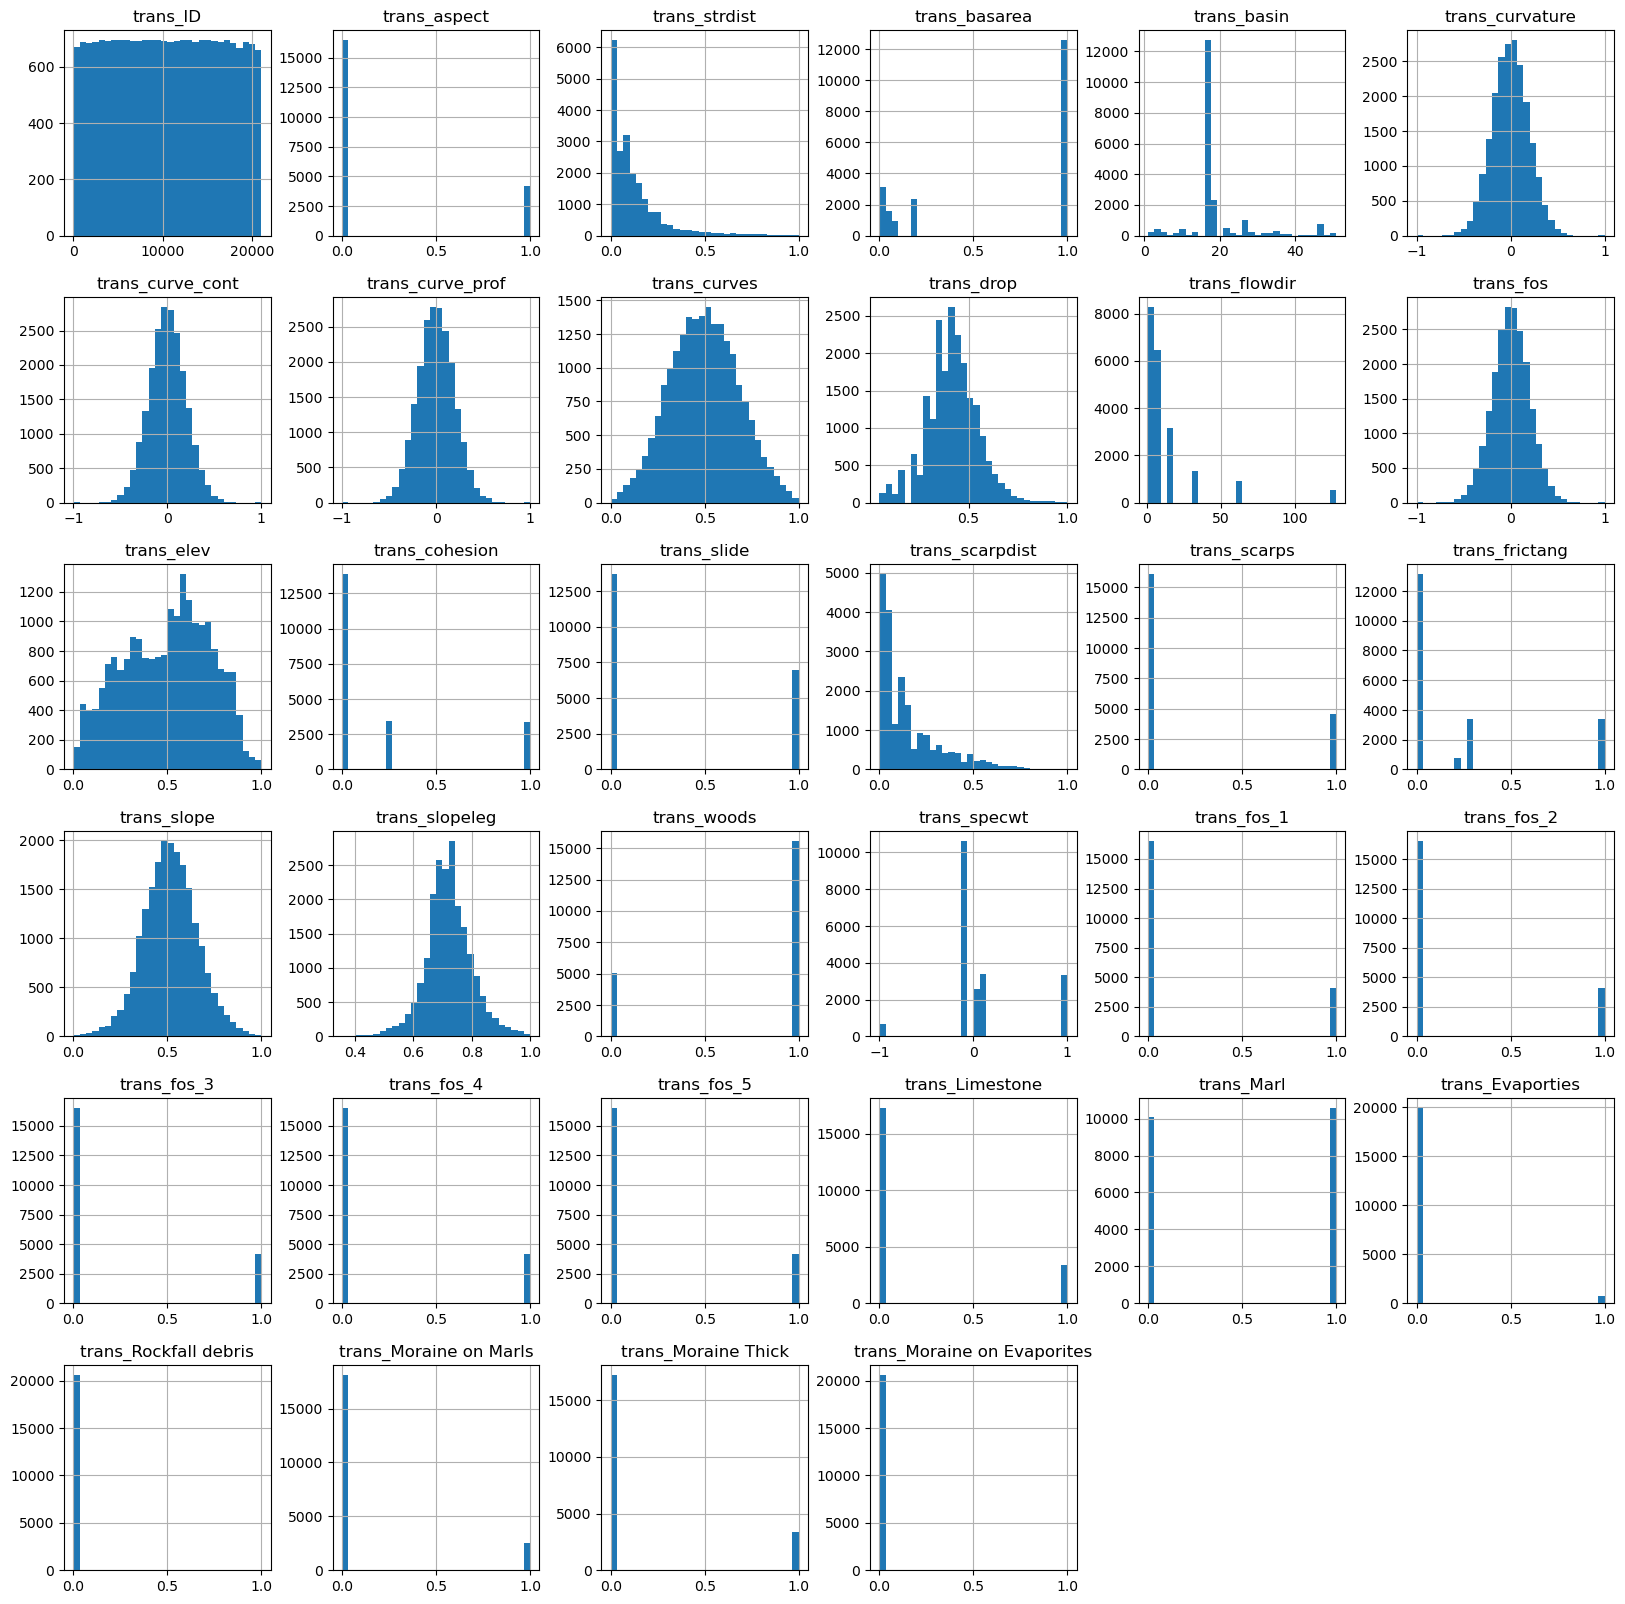

In [326]:
df_trans.hist(bins = 30, figsize = (20,20));

# 2nd PEARSON CORRELATION CHECK

<Axes: >

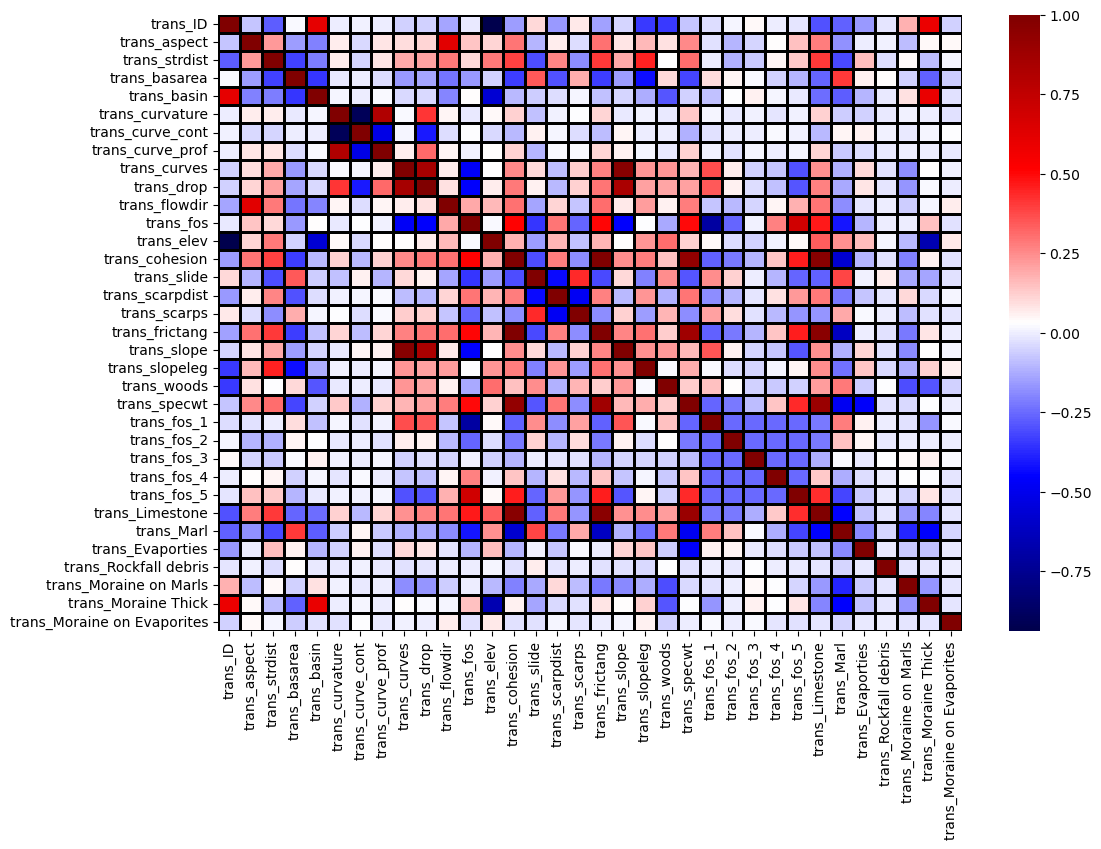

In [327]:
#Plot Heat Map
plt.figure(figsize=(12,8))
sns.heatmap(df_trans.corr(), linecolor='black', linewidths=1, cmap='seismic')

<Axes: >

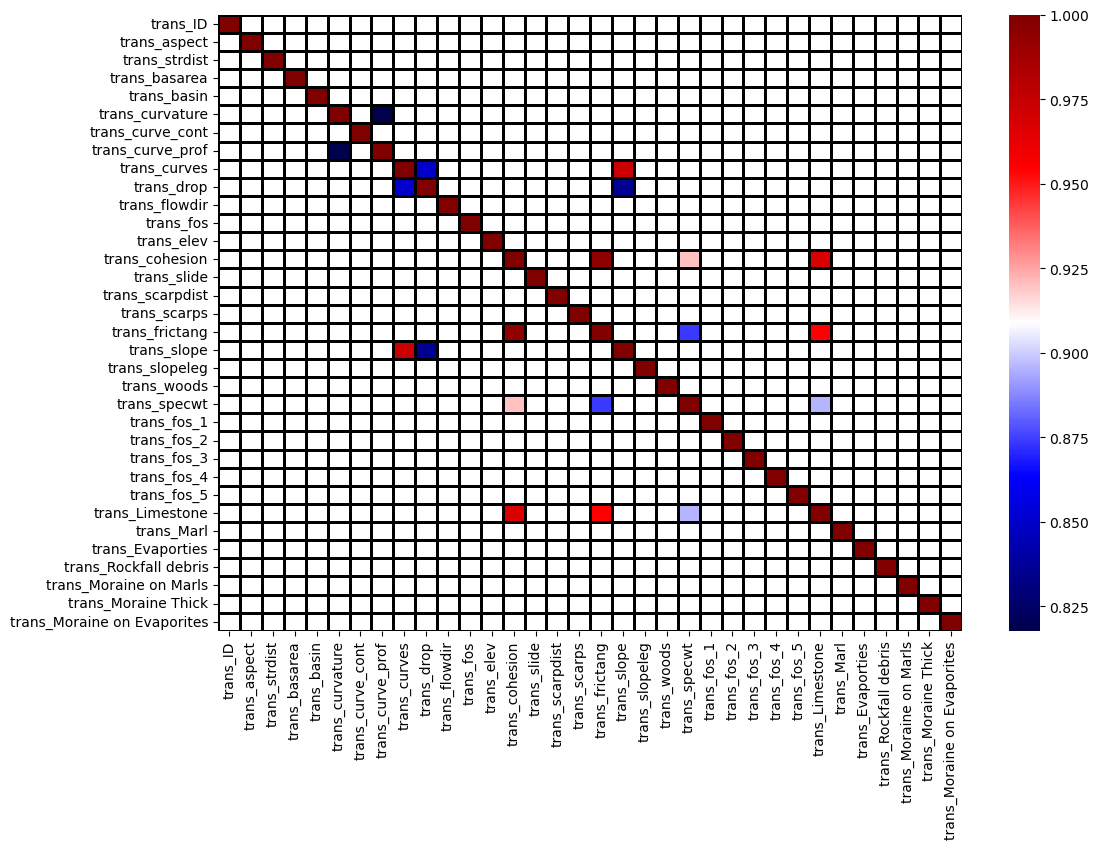

In [328]:
#Specific check to the all Correlation values above 0.8
#Data Frame Preparation
corr = df_trans.corr()
cond_corr = corr[corr>0.8]

#Plot Heat Map
plt.figure(figsize=(12,8))
sns.heatmap(cond_corr, linecolor='black', linewidths=1, cmap='seismic')

In [329]:
#List All Correlation values above 0.8
cond_corr_sort = cond_corr
cond_corr_sort.replace(1, np.nan, inplace=True)
df_high_corr = cond_corr_sort.abs().unstack().drop_duplicates(keep='first').sort_values(ascending=False).to_frame(name='Correlation Value')
df_high_corr

Correlation Value
trans_cohesion  trans_frictang             0.993630
trans_curves    trans_slope                0.973462
trans_cohesion  trans_Limestone            0.968003
trans_frictang  trans_Limestone            0.954848
trans_cohesion  trans_specwt               0.919588
trans_specwt    trans_Limestone            0.895837
trans_frictang  trans_specwt               0.873573
trans_curves    trans_drop                 0.850262
trans_drop      trans_slope                0.835961
trans_curvature trans_curve_prof           0.817765
trans_ID        trans_ID                        NaN

# MACHINE LEARNING MODEL FOR LANDSLIDE PREDICTION
After we are ready and clear with the Data Preparation, we can **develop several models for Landslide Prediction using several chosen features**. As a basic Machine Learning concept, we know that the **models are just estimator tools** which based on oberserved data. However, such models could provide us a mathematically objective construction of how the later new input data of features will indicate a Landslide or not. 

In this project, we applied both **Supervised Model** and **Unsupervised Model** for Landslide Prediction:This python-based project applied several models for both the Supervised Model and the Unsupervised Model for Landslide Prediction, with variation or model scheme of Multivariate and Bivariate case. After that, to confirm that our models are representative enough to be used later for Landslide Prediction, we also do the machine learning models evaluations of **Confusion Matrix**, **Score Accuracy**, **Precision**, **Recall**, and **F1 Score**

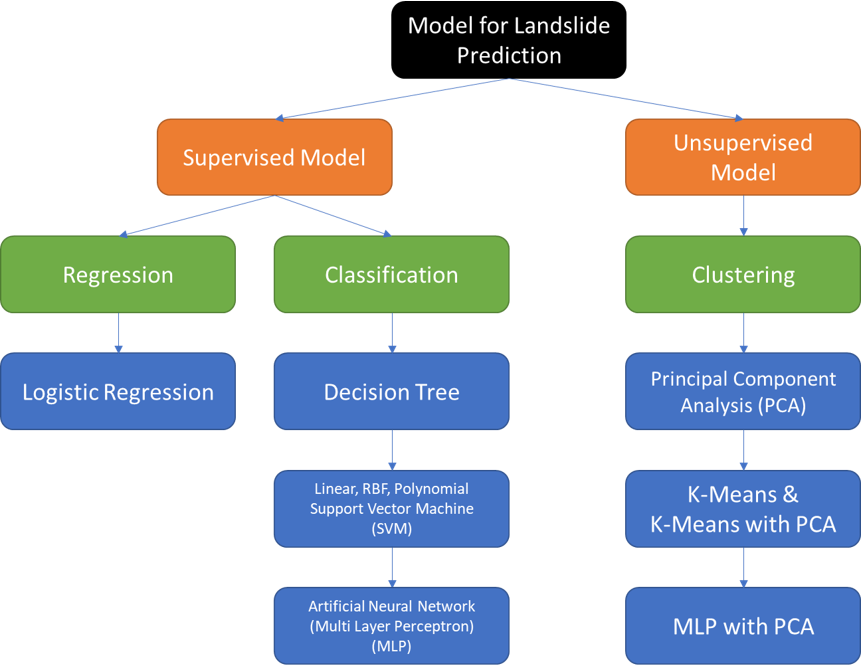
___
<center> <b>All models for Landslide Prediction</b> <center>

## A. Logistic Regression Model
Logistic regression is a robust and flexible method for dichotomous (binary) classification prediction; that is, it is used to predict for a binary outcome or state (Seufert, 2014). The logistic regression use a **Logistic Function** to create a model for binary data, in which have a Sigmoid Curve function.

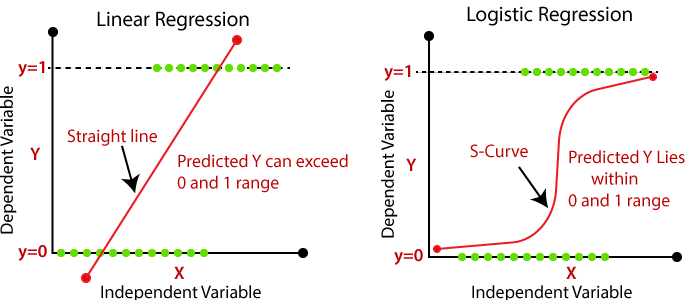
___
<center> <b>Linear Regression Function vs Logistic Regression Function (Jauregui, 2021)</b> <center>

In [330]:
#Pearson Correlation of all features with Landslide Feature
df_trans[df_trans.columns[1:]].corr()['trans_slide'][:].abs().sort_values(ascending=False)

trans_slide                    1.000000
trans_scarps                   0.438180
trans_scarpdist                0.436005
trans_Marl                     0.381935
trans_fos                      0.352284
trans_basarea                  0.345430
trans_frictang                 0.312783
trans_strdist                  0.307812
trans_cohesion                 0.306148
trans_specwt                   0.290410
trans_Limestone                0.265225
trans_fos_5                    0.257791
trans_woods                    0.248347
trans_fos_1                    0.245940
trans_slopeleg                 0.203543
trans_elev                     0.151708
trans_Moraine Thick            0.141085
trans_flowdir                  0.138374
trans_Moraine on Marls         0.131545
trans_fos_2                    0.121625
trans_fos_4                    0.108790
trans_curve_prof               0.106231
trans_slope                    0.105376
trans_aspect                   0.104973
trans_curves                   0.103519


In [331]:
#P_Value to see signifant correlation for Landslide Prediction
df_corr_slide = pd.DataFrame(columns = ['Variable with trans_slide', 'Pearson Value', 'P-Value'])

for i in comb_trans:
    pearson_coef, p_value = stats.pearsonr(df_trans[i], df_trans['trans_slide'])
    tem_df_corr = pd.DataFrame({'Variable with trans_slide': i, 'Pearson Value': [pearson_coef], 'P-Value': [p_value]})
    df_corr_slide = df_corr_slide.append(tem_df_corr, ignore_index = True) 

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\3715128985.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\3715128985.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\3715128985.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\3715128985.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\3715128985.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a

In [332]:
#Sorting The Pearson Value and P-Value for Landslide Prediction
df_corr_slide.sort_values('Pearson Value', ascending=False).reset_index()

index    Variable with trans_slide  Pearson Value        P-Value
0      14                  trans_slide       1.000000   0.000000e+00
1      16                 trans_scarps       0.438180   0.000000e+00
2      28                   trans_Marl       0.381935   0.000000e+00
3       3                trans_basarea       0.345430   0.000000e+00
4      20                  trans_woods       0.248347  5.839894e-288
5      22                  trans_fos_1       0.245940  2.850424e-282
6      23                  trans_fos_2       0.121625   6.338112e-69
7      18                  trans_slope       0.105376   4.242961e-52
8       0                     trans_ID       0.105090   7.978452e-52
9       8                 trans_curves       0.103519   2.479044e-50
10     30        trans_Rockfall debris       0.065550   4.032995e-21
11      9                   trans_drop       0.059360   1.348654e-17
12      6             trans_curve_cont       0.054771   3.323289e-15
13     29             trans_Evaporties       0.003313   6.339837e-01
14     24                  trans_fos_3      -0.001007   8.849396e-01
15     33  trans_Moraine on Evaporites      -0.028636   3.843049e-05
16      4                  trans_basin      -0.059395   1.291063e-17
17      5              trans_curvature      -0.086478   1.349027e-35
18      1                 trans_aspect      -0.104973   1.031760e-51
19      7             trans_curve_prof      -0.106231   6.351612e-53
20     25                  trans_fos_4      -0.108790   1.978227e-55
21     31       trans_Moraine on Marls      -0.131545   2.076864e-80
22     10                trans_flowdir      -0.138374   7.470883e-89
23     32          trans_Moraine Thick      -0.141085   2.506940e-92
24     12                   trans_elev      -0.151708  1.281774e-106
25     19               trans_slopeleg      -0.203543  4.162595e-192
26     26                  trans_fos_5      -0.257791  6.910128e-311
27     27              trans_Limestone      -0.265225   0.000000e+00
28     21                 trans_specwt      -0.290410   0.000000e+00
29     13               trans_cohesion      -0.306148   0.000000e+00
30      2                trans_strdist      -0.307812   0.000000e+00
31     17               trans_frictang      -0.312783   0.000000e+00
32     11                    trans_fos      -0.352284   0.000000e+00
33     15              trans_scarpdist      -0.436005   0.000000e+00

In [333]:
#Assign Variables that will be used for 'ALL' Multivariate Model
upper = 0.3
lower = -0.3
var_for_multi=[]
for i in df_corr_slide['Variable with trans_slide']:
    if df_corr_slide.loc[df_corr_slide["Variable with trans_slide"] == i, ("Pearson Value")].values > upper:
        var_for_multi.append(i)
    elif df_corr_slide.loc[df_corr_slide["Variable with trans_slide"] == i, ("Pearson Value")].values < lower:
        var_for_multi.append(i)
    else:
        continue

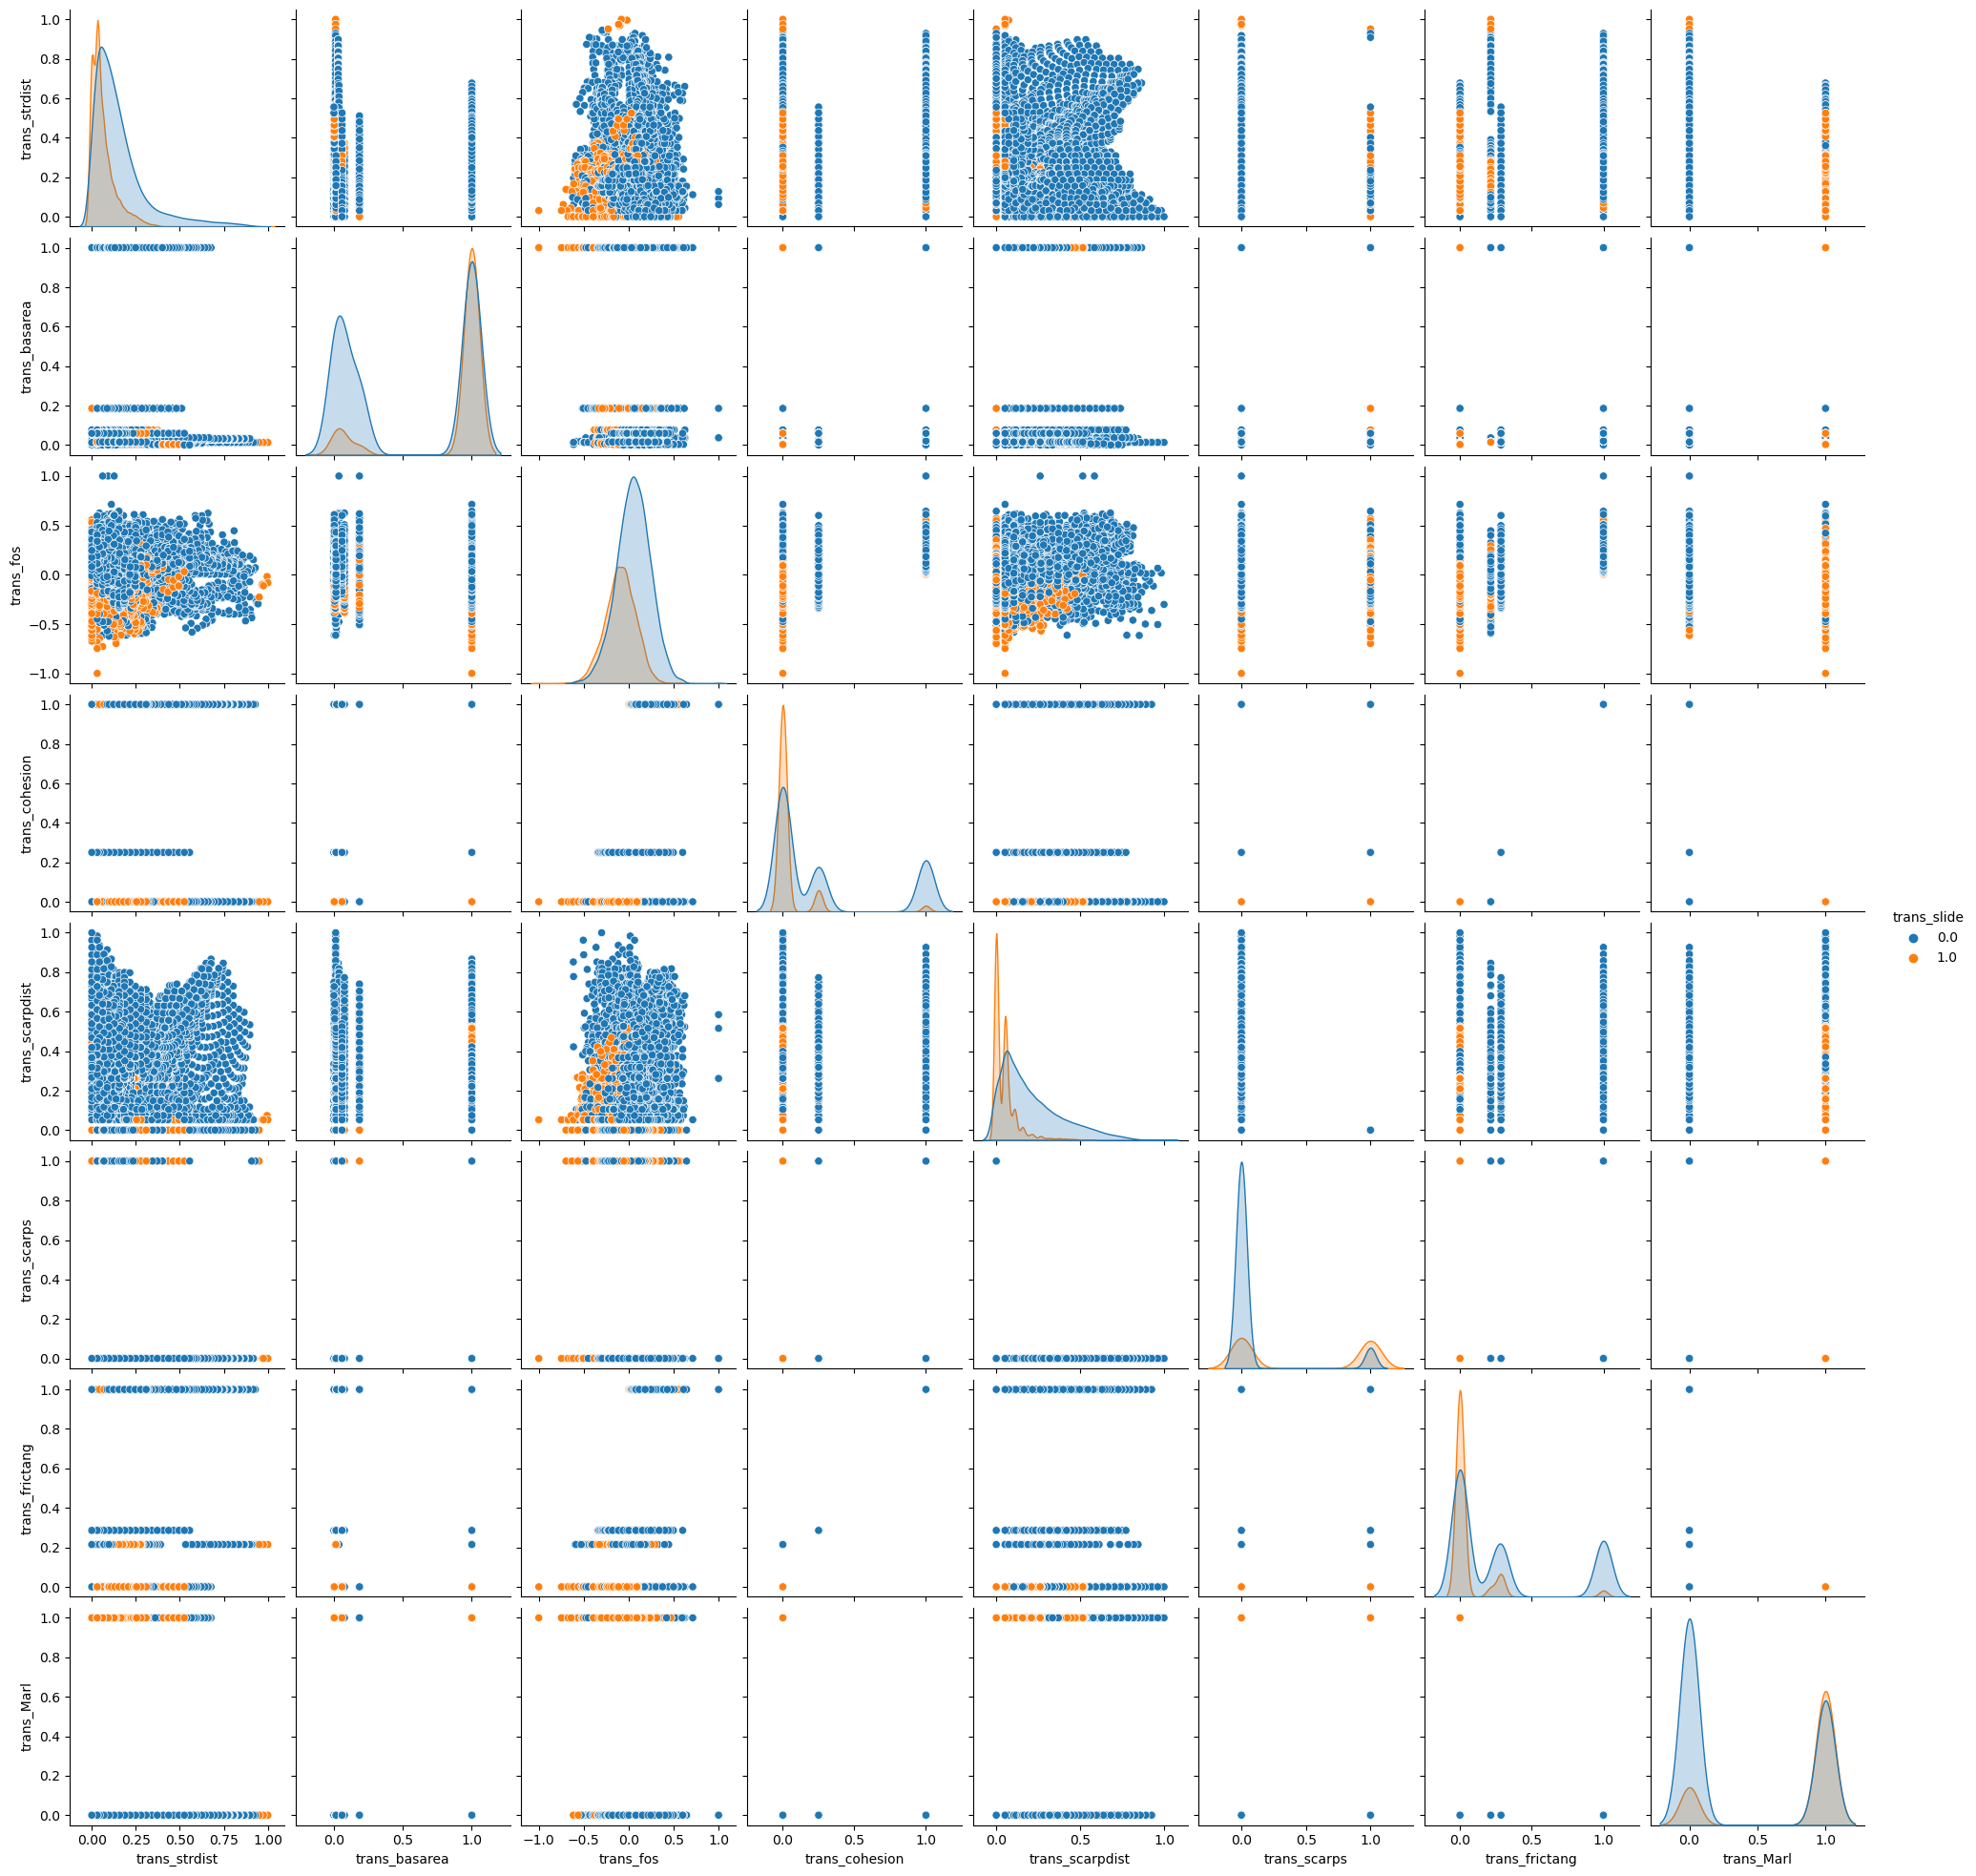

In [334]:
#Visualizing The Dataset crossplot between features with colormap of Lanslide
sns.pairplot(df_trans[var_for_multi],hue='trans_slide')

In [335]:
clean_var_for_multi = var_for_multi

#Data Train and Data Test for 'ALL' Multivariate Model
target = 'trans_slide'
clean_var_for_multi.remove(target)
rn = np.random.RandomState(0)
X_train, X_test, y_train, y_test = train_test_split(df_trans[clean_var_for_multi], df_trans['trans_slide'], test_size=0.40, random_state=rn)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 8265
number of training samples: 12396


In [336]:
#Logistic Regresion
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

In [337]:
#Confusion Matrix for Logistic Regression
con_mat_pred_slide = confusion_matrix(y_test,predictions)

#Accuracy score for Logistic Regression
acc_sco_pred_slide = accuracy_score(y_test,predictions)

#Classification Report for Logistic Regression
clas_pred_slide = classification_report(y_test,predictions)

In [338]:
con_mat_pred_slide

array([[4790,  688],
       [ 837, 1950]], dtype=int64)

In [340]:
print('Score for Logistic Regression:', acc_sco_pred_slide)

Score for Logistic Regression: 0.8154869933454325


In [341]:
print(clas_pred_slide)

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      5478
         1.0       0.74      0.70      0.72      2787

    accuracy                           0.82      8265
   macro avg       0.80      0.79      0.79      8265
weighted avg       0.81      0.82      0.81      8265



In [342]:
#Function for distribution of Training and Test Data comparison after the model being applied 
def ComparisonPlot(green, blue, Title):
    plt.figure(figsize=(8, 10))

    ax1 = sns.distplot(green, hist=False, color="g", label='Actual Value')
    ax2 = sns.distplot(blue, hist=False, color="b", label='Predicted Value', ax=ax1)

    plt.title(Title)
    plt.xlabel('Slide')
    plt.ylabel('All Factors')
    plt.legend()

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




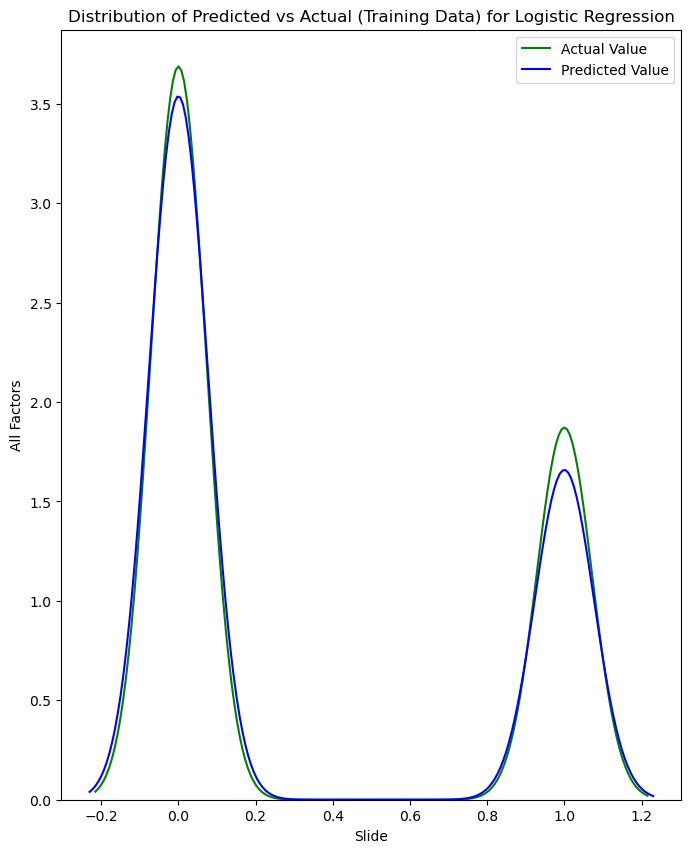

In [343]:
Title = 'Distribution of Predicted vs Actual (Training Data) for Logistic Regression'
ComparisonPlot(y_train, predictions, Title)

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




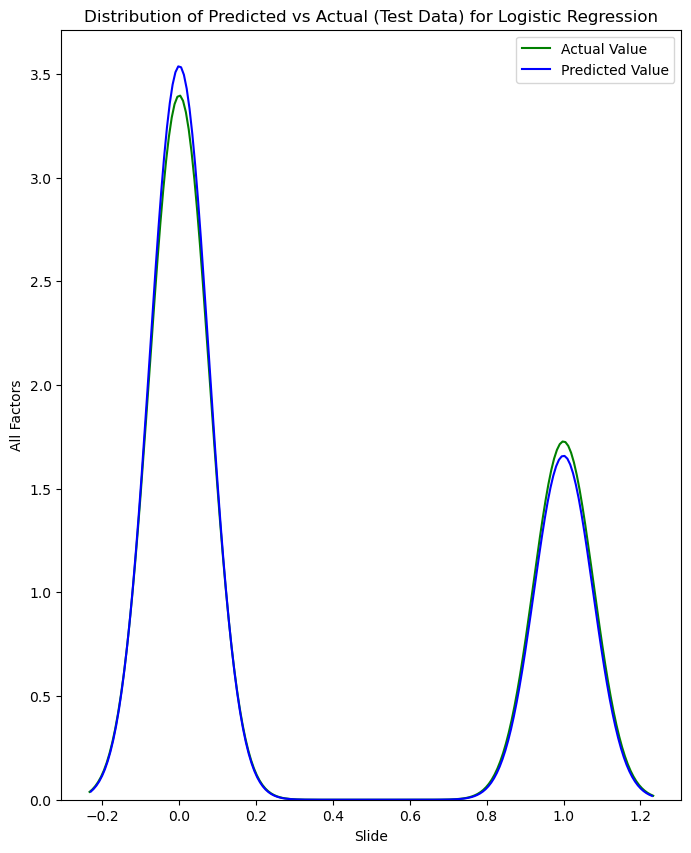

In [344]:
Title = 'Distribution of Predicted vs Actual (Test Data) for Logistic Regression'
ComparisonPlot(y_test, predictions, Title)

In [345]:
logmodel.intercept_

array([-0.74901632])

In [346]:
logmodel.coef_

array([[-6.30104325,  0.89643533, -2.9295193 , -0.06027726, -6.74356464,
         0.91902251, -0.10478531,  0.73295568]])

## B. Decision Tree Model
Decision tree is a technique in supervised machine learning that consists of internal nodes which related to attributes, edges which related to subsets of attribute or feature values, and terminal nodes (leaves) which related to class labels (Kononenko and Kukar, 2007). In Decision Tree, we should follow the **Ideal Tree Algorithm** which, in simple, we have to select a correct attribute as a node for the Decision Tree Splits. In order to get the correct attribute for a node, we could use the **Entropy** or **Gini Impurity** to measure the purity of split. We do the Decision Tree Splits by minimalize the total Entropy or Gini Impurity Value.

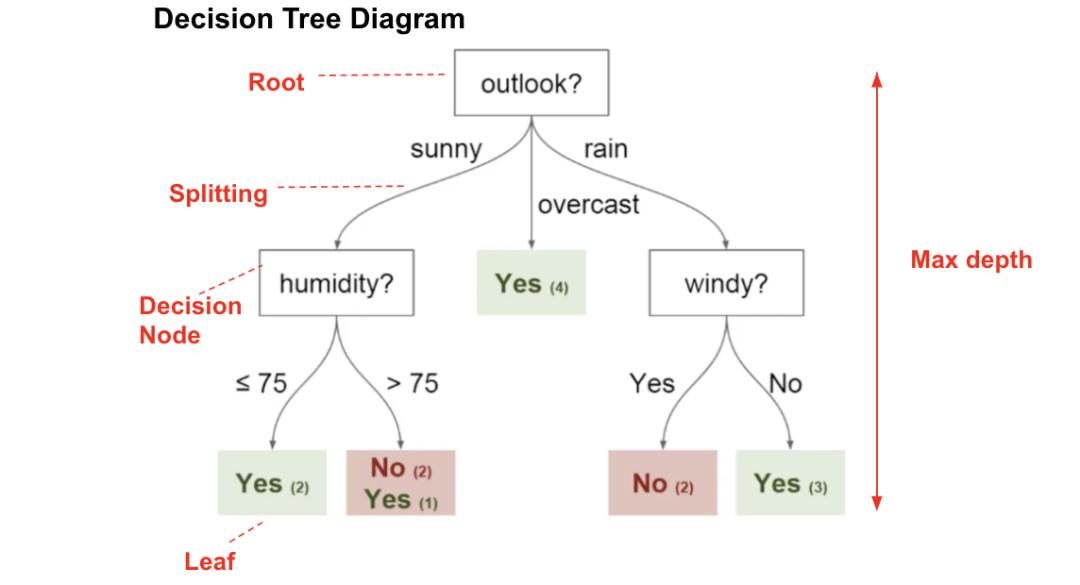
___
<center> <b>Decision Tree Model Visualization (programmersought.com, 2021)</b> <center>

In [347]:
#Creating Dictionary for searching the best parameter
param_max_depth= [{'max_depth': [1,3,5,10,20,50,70]}]
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [348]:
#Deploy Decision Tree with the best parameter of Maximum Depth
Grid_tree = GridSearchCV(clf, param_max_depth, cv=4)
best_param_tree = Grid_tree.fit(X_train,y_train).best_estimator_
predictions_clf = best_param_tree.predict(X_test)

print('Best Parameter:', Grid_tree.best_params_)

Best Parameter: {'max_depth': 10}


In [349]:
#Decision Tree Result Visualization
plt.figure(figsize = (15,10))
dd = ['No Landslide', 'Landslide']
slider = np.array(dd)

tree.plot_tree(best_param_tree, class_names = slider, feature_names = np.array(clean_var_for_multi), filled = True, fontsize = 10);

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got array(['trans_strdist', 'trans_basarea', 'trans_fos', 'trans_cohesion',
       'trans_scarpdist', 'trans_scarps', 'trans_frictang', 'trans_Marl'],
      dtype='<U15') instead.

<Figure size 1500x1000 with 0 Axes>

In [ ]:
#Confusion Matrix for Decision Tree
con_mat_pred_slide_tree = confusion_matrix(y_test,predictions_clf)

#Accuracy score for Decision Tree
acc_sco_pred_slide_tree = accuracy_score(y_test,predictions_clf)

#Classification Report for Decision Tree
clas_pred_slide_tree = classification_report(y_test,predictions_clf)

In [ ]:
print(con_mat_pred_slide_tree)

In [ ]:
print('Score for Decision Tree:',acc_sco_pred_slide_tree)

In [ ]:
print(clas_pred_slide_tree)

In [ ]:
Title = 'Distribution of Predicted vs Actual (Training Data) using Decision Tree'
ComparisonPlot(y_train, predictions_clf, Title)

In [ ]:
Title = 'Distribution of Predicted vs Actual (Test Data) using Decision Tree'
ComparisonPlot(y_test, predictions_clf, Title)

## C. Support Vector Machine (SVM) Model
**Support vector machines (SVM)** is a supervised machine learning method to analyze data and recognize patterns in which performs classification by creating an **N-dimensional hyperplane (a plane generalized into N dimensions)** that can optimally separate the data into two categories (Farber, 2012). However, the hyperplane could only give us a good result (maximize the Margin result) for a **Linearly separable dataset**. In **Non-Linearly separable data set**, which is common in many datasets, we could address it by **Soft Margin** or **Kernel Tricks** like Radial Basis Function (RBF), Polynomial, Sigmoid, and etc.

Actually, SVM (with Sigmoid Kernel) and Logistic Regression have a similar optimization problem. However, the Logistic Regression is more sensitive to outliers than SVM.

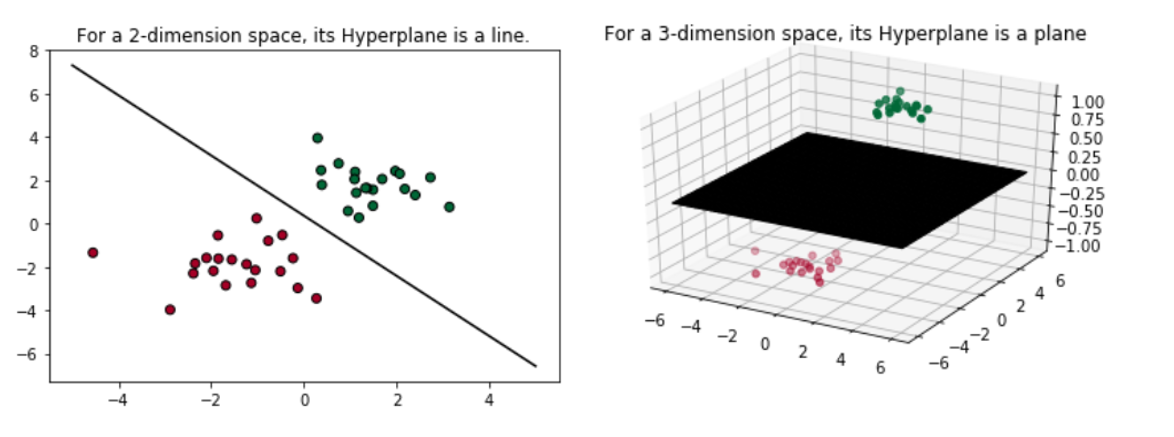
___
<center> <b>Linear Support Vector Machine Model Visualization Intuition (Chen, 2019)</b> <center>

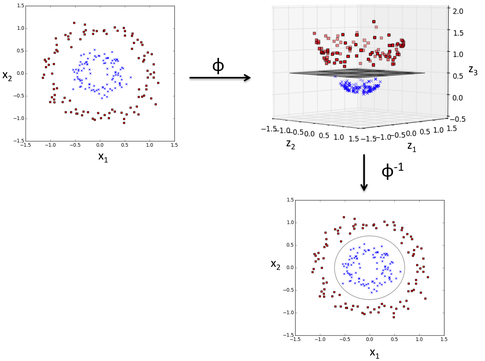
___
<center> <b>Non Linear Support Vector Machine Model with RBF Kernel (Raschka, 2016)</b> <center>

### C.1 Bivariate Support Vector Machine (Linear) Model

In [ ]:
#Assign Variables used for Bivariate SVM Manually. Search for the Two Best Correlation to Landslide
upper = 0.35
lower = -0.35
var_for_SVM=[]
for i in df_corr_slide['Variable with trans_slide']:
    if df_corr_slide.loc[df_corr_slide["Variable with trans_slide"] == i, ("Pearson Value")].values > upper:
        var_for_SVM.append(i)
    elif df_corr_slide.loc[df_corr_slide["Variable with trans_slide"] == i, ("Pearson Value")].values < lower:
        var_for_SVM.append(i)
    else:
        continue

In [ ]:
#Visualizing The Dataset for Bivariate SVM.
sns.pairplot(df_trans[var_for_SVM],hue='trans_slide')

In [ ]:
#Dataframe for Bivariate SVM
first_var_SVM = 'trans_fos'
second_var_SVM = 'trans_scarpdist'
df_SVM = df_trans[[first_var_SVM, second_var_SVM, 'trans_slide']]
df_SVM

In [ ]:
#Split the Test-Training Data for Bivariate SVM
X = np.array([df_SVM[first_var_SVM],df_SVM[second_var_SVM]]).T
y = df_SVM['trans_slide'].values
rn = np.random.RandomState(0)
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X, y, test_size=0.40, random_state=rn)

print("number of test samples for Bivariate SVM :", X_test_SVM.shape[0])
print("number of training samples for Bivariate SVM:",X_train_SVM.shape[0])

In [ ]:
#Linear Bivariate SVM
Lin_classifier = SVC(kernel='linear')
Lin_classifier.fit(X_train_SVM, y_train_SVM)
predictions_svm_lin = Lin_classifier.predict(X_test_SVM)

In [ ]:
#Confusion Matrix for linear Bivariate SVM
con_mat_pred_slide_svm_lin = confusion_matrix(y_test_SVM,predictions_svm_lin)

#Accuracy score for Linear Bivariate SVM
acc_sco_pred_slide_svm_lin = accuracy_score(y_test_SVM,predictions_svm_lin)

#Classification Report for Linear Bivariate SVM
clas_pred_slide_svm_lin = classification_report(y_test_SVM,predictions_svm_lin)

In [221]:
print(con_mat_pred_slide_svm_lin)

[[4478 1000]
 [ 911 1876]]


In [222]:
print(acc_sco_pred_slide_svm_lin)

0.7687840290381125


In [223]:
print(clas_pred_slide_svm_lin)

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82      5478
         1.0       0.65      0.67      0.66      2787

    accuracy                           0.77      8265
   macro avg       0.74      0.75      0.74      8265
weighted avg       0.77      0.77      0.77      8265



C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(green, hist=False, color="g", label='Actual Value')
C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

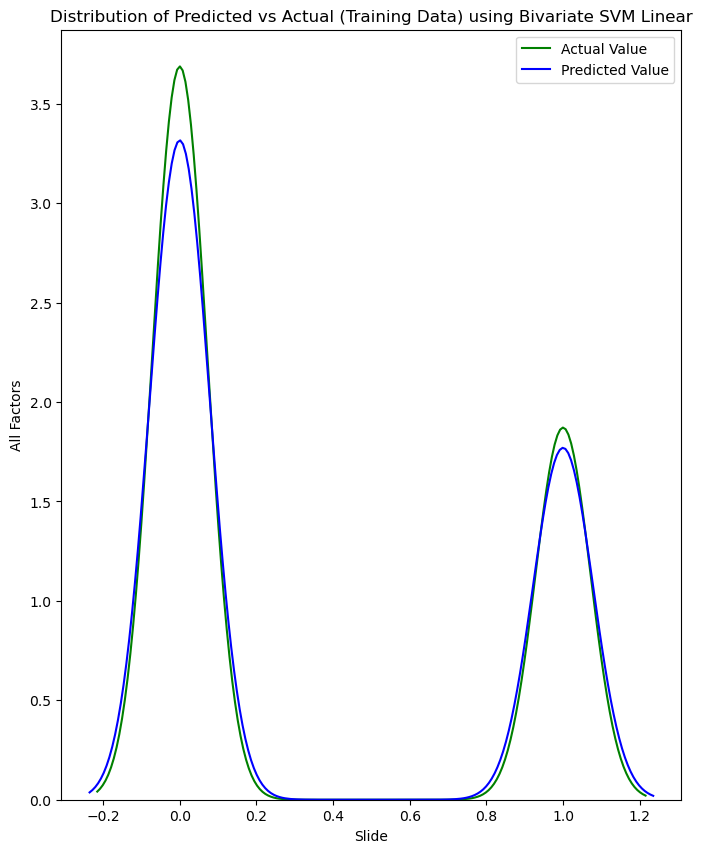

In [224]:
Title = 'Distribution of Predicted vs Actual (Training Data) using Bivariate SVM Linear'
ComparisonPlot(y_train_SVM, predictions_svm_lin, Title)

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(green, hist=False, color="g", label='Actual Value')
C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

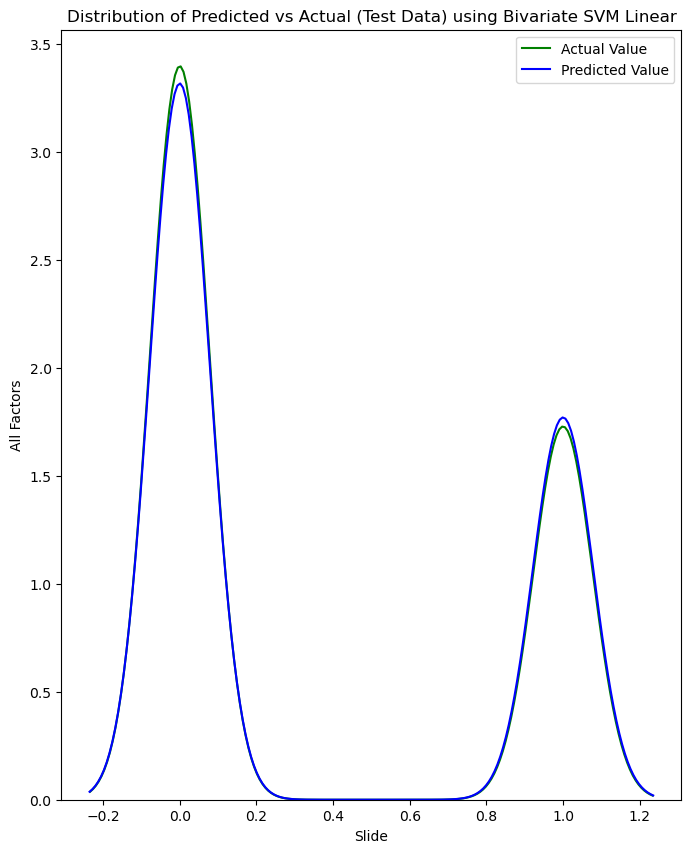

In [225]:
Title = 'Distribution of Predicted vs Actual (Test Data) using Bivariate SVM Linear'
ComparisonPlot(y_test_SVM, predictions_svm_lin, Title)

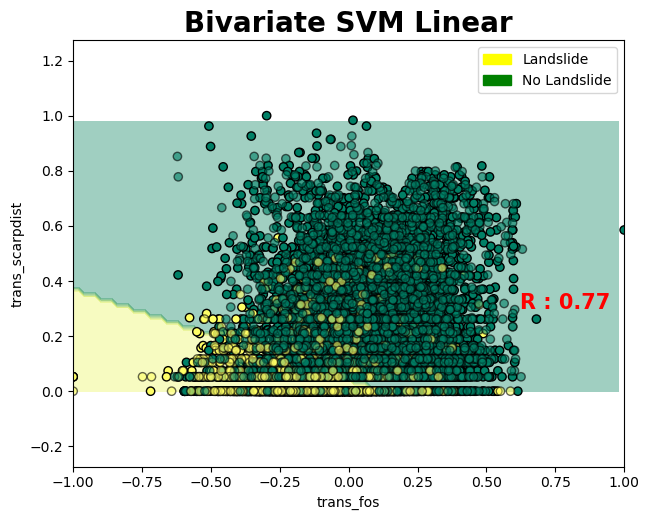

In [226]:
# code edited after Exercise of Machine Learning '03_SVM Notebook' by Authors: Florian Wellmann, Nils Chudalla (2021)

#Visualize the Result of Bivariate SVM Linear
h = 0.02

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = Lin_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Put the result into a color plot
plt.contourf(xx, yy, Z, cmap='summer', alpha=.4)
plt.scatter(X_train_SVM[:, 0], X_train_SVM[:, 1], c=y_train_SVM, cmap='summer', edgecolors='k')

# Plot the testing points
plt.scatter(X_test_SVM[:, 0], X_test_SVM[:, 1], c=y_test_SVM, cmap='summer', edgecolors='k', alpha=0.6)

#Extra
plt.text(xx.max() - .03, yy.min() + .3, ('R : %.2f' % acc_sco_pred_slide_svm_lin), color = 'r', size=15, horizontalalignment='right', fontweight = 'bold')
plt.axis('equal')
plt.ylim(y_min, y_max)
plt.xlim(x_min, x_max)
plt.tight_layout()
plt.xlabel(first_var_SVM)
plt.ylabel(second_var_SVM)
plt.title('Bivariate SVM Linear', size=20, fontweight = 'bold')

#Legend
yellow_patch = mpatches.Patch(color='yellow', label='Landslide')
green_patch = mpatches.Patch(color='green', label='No Landslide')
plt.legend(handles=[yellow_patch, green_patch])

### C.2 Multivariate Support Vector Machine (Linear) Model

In [227]:
#Multivariate SVM Linear
Lin_classifier_multi = SVC(kernel='linear')
Lin_classifier_multi.fit(X_train, y_train)
predictions_svm_lin_multi = Lin_classifier_multi.predict(X_test)

In [228]:
#Confusion Matrix for linear Multivariate SVM
con_mat_pred_slide_svm_lin_multi = confusion_matrix(y_test,predictions_svm_lin_multi)

#Accuracy score for Linear Multivariate SVM
acc_sco_pred_slide_svm_lin_multi = accuracy_score(y_test,predictions_svm_lin_multi)

#Classification Report for Linear Multivariate SVM
clas_pred_slide_svm_lin_multi = classification_report(y_test,predictions_svm_lin_multi)

In [229]:
print(con_mat_pred_slide_svm_lin_multi)

[[4771  707]
 [ 796 1991]]


In [230]:
print('Score for Bivariate SVM with Linear:', acc_sco_pred_slide_svm_lin_multi)

Score for Bivariate SVM with Linear: 0.8181488203266788


In [ ]:
print(clas_pred_slide_svm_lin_multi)

In [ ]:
Title = 'Distribution of Predicted vs Actual (Training Data) using Multivariate SVM Linear'
ComparisonPlot(y_train, predictions_svm_lin_multi, Title)

In [ ]:
Title = 'Distribution of Predicted vs Actual (Test Data) using Multivariate SVM Linear'
ComparisonPlot(y_test, predictions_svm_lin_multi, Title)

### C.3 Bivariate Support Vector Machine with Radial Basis Function (RBF) Kernel Model

In [ ]:
# #Parameter for Bivariate SVM RBF
# param_C_degree= [{'C': [1.0,5.0], 'degree': [2,3,4]}]
# rbf_classifier = SVC(kernel = 'rbf', gamma = 'scale')

# #Search for the Best Parameter
# Grid_svm_rbf = GridSearchCV(rbf_classifier, param_C_degree, cv=4)
# best_rbf_classifier = Grid_svm_rbf.fit(X_train_SVM,y_train_SVM).best_estimator_
# predictions_svm_rbf = best_rbf_classifier.predict(X_test_SVM)

# print('Best Parameter:', Grid_svm_rbf.best_params_)

In [ ]:
#Bivariate SVM RBF after determining the Best Parameter
rbf_classifier = SVC(kernel = 'rbf', gamma = 'scale', C=5.0, degree=2)
rbf_classifier.fit(X_train_SVM,y_train_SVM)
predictions_svm_rbf = rbf_classifier.predict(X_test_SVM)

In [ ]:
#Confusion Matrix for Bivariate RBF
con_mat_pred_slide_svm_rbf = confusion_matrix(y_test_SVM,predictions_svm_rbf)

#Accuracy score for Bivariate RBF
acc_sco_pred_slide_svm_rbf = accuracy_score(y_test_SVM,predictions_svm_rbf)

#Classification Report for Bivariate RBF
clas_pred_slide_svm_rbf = classification_report(y_test_SVM,predictions_svm_rbf)

In [ ]:
print(con_mat_pred_slide_svm_rbf)

In [ ]:
print('Score for Bivariate KMeans with RBF:', acc_sco_pred_slide_svm_rbf)

In [ ]:
print(clas_pred_slide_svm_rbf)

In [ ]:
# code edited after Exercise of Machine Learning '03_SVM Notebook' by Authors: Florian Wellmann, Nils Chudalla (2021)

#Viisualize the Result of Bivariate SVM RBF
h = 0.02

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = rbf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Put the result into a color plot
plt.contourf(xx, yy, Z, cmap='summer', alpha=.4)
plt.scatter(X_train_SVM[:, 0], X_train_SVM[:, 1], c=y_train_SVM, cmap='summer', edgecolors='k')

# Plot the testing points
plt.scatter(X_test_SVM[:, 0], X_test_SVM[:, 1], c=y_test_SVM, cmap='summer', edgecolors='k', alpha=0.6)

#Extra
plt.text(xx.max() - .03, yy.min() + .3, ('R : %.2f' % acc_sco_pred_slide_svm_rbf), color = 'r', size=15, horizontalalignment='right', fontweight = 'bold')
plt.axis('equal')
plt.ylim(y_min, y_max)
plt.xlim(x_min, x_max)
plt.tight_layout()
plt.xlabel(first_var_SVM)
plt.ylabel(second_var_SVM)
plt.title('Bivariate SVM RBF', size=20, fontweight = 'bold')

#Legend
yellow_patch = mpatches.Patch(color='yellow', label='Landslide')
green_patch = mpatches.Patch(color='green', label='No Landslide')
plt.legend(handles=[yellow_patch, green_patch])

### C.4 Bivariate Support Vector Machine with Polynomial Kernel Model (In-depth Mathematical Intution).

In [ ]:
#Kernel Bivariate SVM RBF
df_SVM_ker = df_SVM

a = first_var_SVM + '_square'
b = second_var_SVM +'_square'

df_SVM_ker[a]= df_SVM_ker[first_var_SVM]**2
df_SVM_ker[b]= df_SVM_ker[second_var_SVM]**2

# for i in range(len(df_SVM_ker)):
#     if df_SVM_ker[first_var_SVM][i] > 0:
#         continue
#     else:
#         df_SVM_ker[a][i]= (-1)*(df_SVM_ker[a][i])
        
# for i in range(len(df_SVM_ker)):
#     if df_SVM_ker[second_var_SVM][i] > 0:
#         continue
#     else:
#         df_SVM_ker[b][i]= (-1)*(df_SVM_ker[b][i])


df_SVM_ker['Square Kernel'] = np.exp(-1*((df_SVM_ker[first_var_SVM]**2)+(df_SVM_ker[second_var_SVM]**2)))
df_SVM_ker

In [ ]:
!pip install plotly
import plotly.express as pl

fig = pl.scatter_3d(df_SVM_ker, x=first_var_SVM, y=second_var_SVM, z='Square Kernel', color='trans_slide',title='Polynomial Kernel is Not Success')
fig.show()

### C.5 Multivariate Support Vector Machine with Radial Basis Function Model

In [ ]:
#Multivariate SVM RBF
rbf_classifier_multi = SVC(kernel='rbf', gamma='scale', C= 5, degree= 2)
rbf_classifier_multi.fit(X_train, y_train)
predictions_svm_rbf_multi = rbf_classifier_multi.predict(X_test)

In [ ]:
#Confusion Matrix for Multivariate RBF
con_mat_pred_slide_svm_rbf_multi = confusion_matrix(y_test,predictions_svm_rbf_multi)

#Accuracy score for Multivariate RBF
acc_sco_pred_slide_svm_rbf_multi = accuracy_score(y_test,predictions_svm_rbf_multi)

#Classification Report for Multivariate RBF
clas_pred_slide_svm_rbf_multi = classification_report(y_test,predictions_svm_rbf_multi)

In [ ]:
con_mat_pred_slide_svm_rbf_multi

In [ ]:
print('Score for Multivariate SVM Multivatiate with RBF:',acc_sco_pred_slide_svm_rbf_multi)

In [350]:
print(clas_pred_slide_svm_rbf_multi)

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      5478
         1.0       0.75      0.78      0.76      2787

    accuracy                           0.84      8265
   macro avg       0.82      0.82      0.82      8265
weighted avg       0.84      0.84      0.84      8265



C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




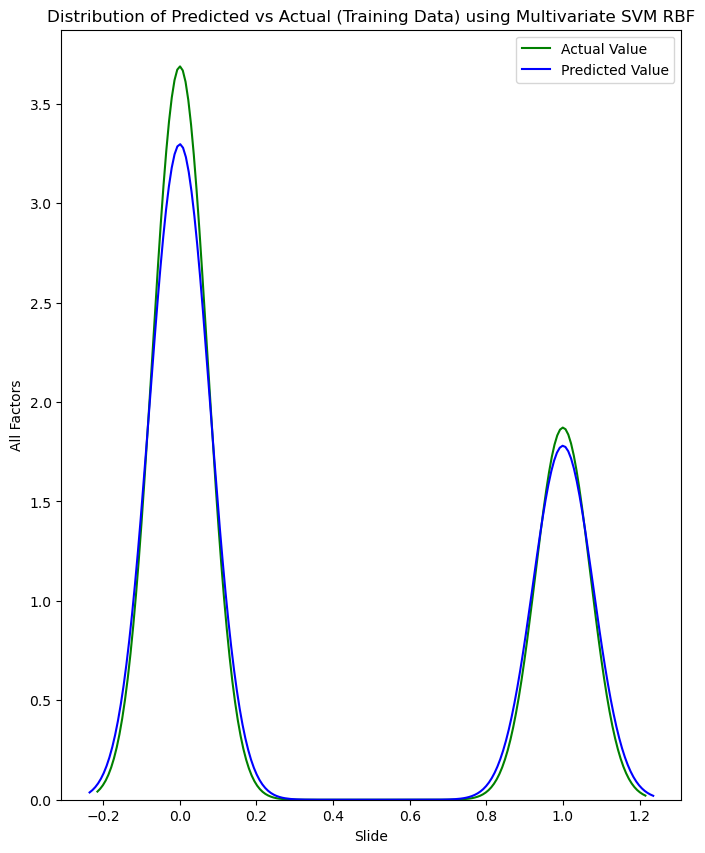

In [351]:
Title = 'Distribution of Predicted vs Actual (Training Data) using Multivariate SVM RBF'
ComparisonPlot(y_train, predictions_svm_rbf_multi, Title)

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




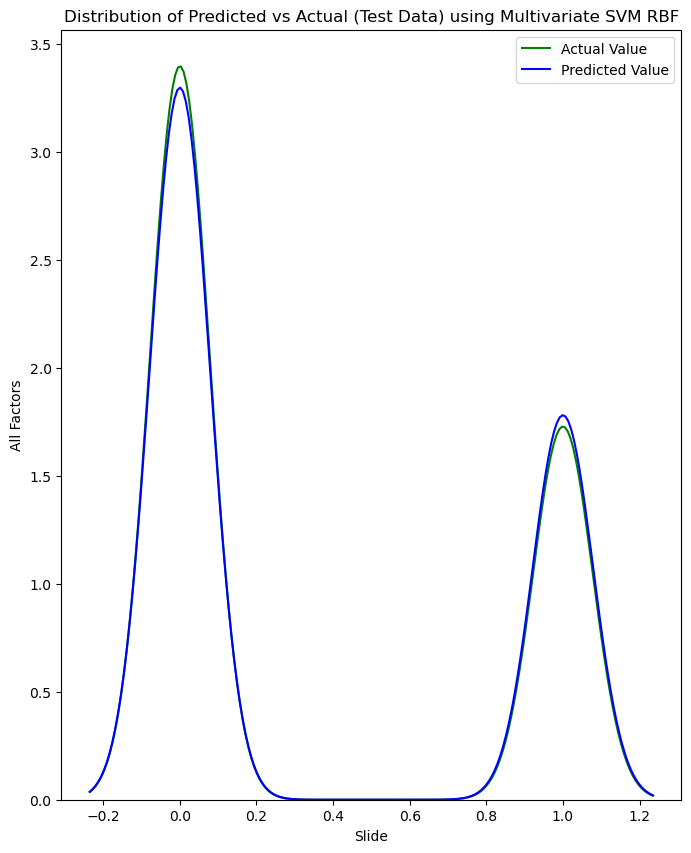

In [352]:
Title = 'Distribution of Predicted vs Actual (Test Data) using Multivariate SVM RBF'
ComparisonPlot(y_test, predictions_svm_rbf_multi, Title)

## K-MEANS Model
**K-means clustering** is an unsupervised model technique that reduces the data dimension by finding appropriate representatives or **Centroids** (center of each subset) for clusters or groups of data points (Subasi, 2020). In simple, the K-Means algorithm starts with the number of Centroids (or clusters) decision and deploys the first time Centroids location randomly. Then two iterative steps conducted until **threshold inertia** being reached, or being defined by the **maximum iteration**:
<ol>
    <li>Select the cluster for each sample in the sense of nearest position with centroid (in <b>Eucledian distance</b>).</li>
    <li>Reposition centroid by averaging over all related samples.</li>
</ol>
In the end, the best result for K-Mean Models could be achieved when it reaches the overall lowest inertia.

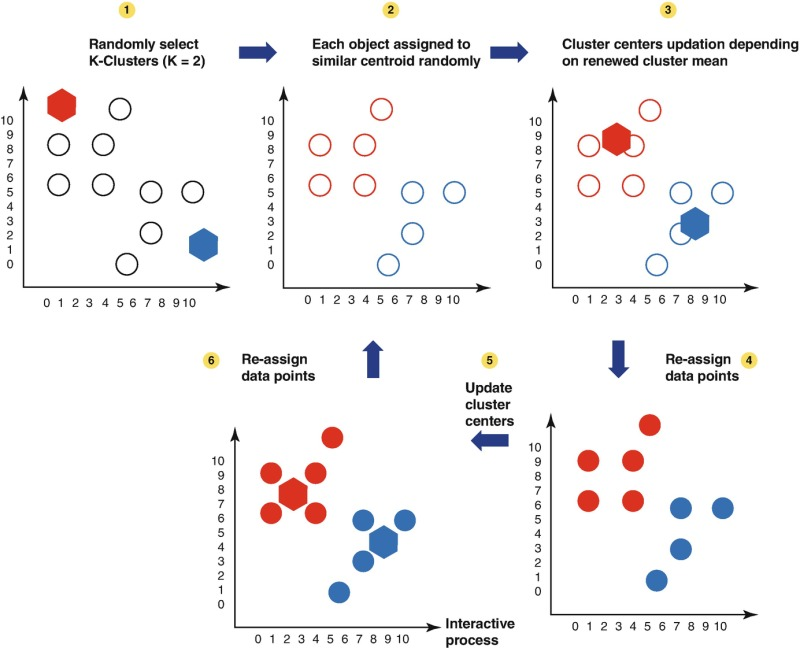
___
<center> <b>Sketch of the k-means clustering algorithm (Traverso et al., 2018)</b> <center>

### A. Bivariate K-Means Model

In [353]:
#Assign Variables used for Bivariate K-Means
upper = 0.35
lower = -0.35
var_for_kmeans=[]
for i in df_corr_slide['Variable with trans_slide']:
    if df_corr_slide.loc[df_corr_slide["Variable with trans_slide"] == i, ("Pearson Value")].values > upper:
        var_for_kmeans.append(i)
    elif df_corr_slide.loc[df_corr_slide["Variable with trans_slide"] == i, ("Pearson Value")].values < lower:
        var_for_kmeans.append(i)
    else:
        continue

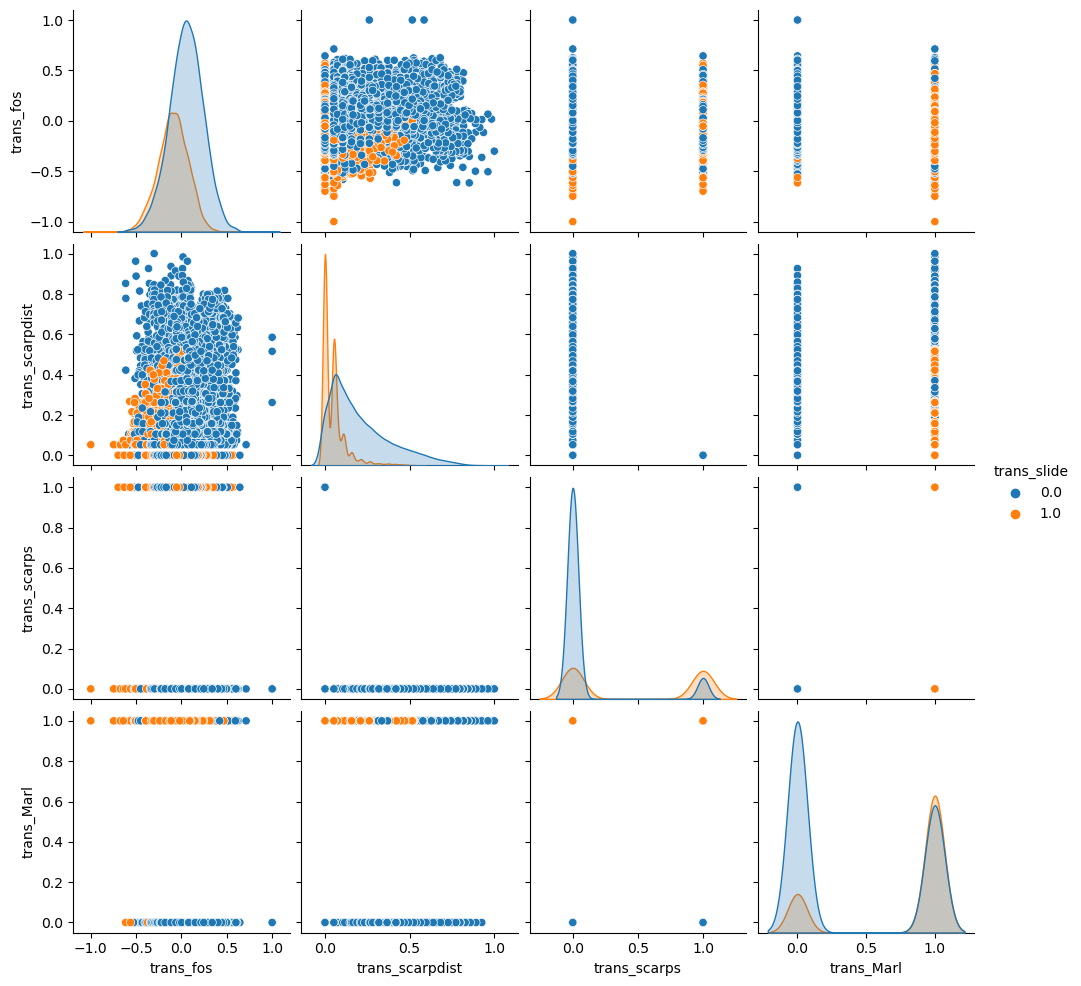

In [354]:
#Visualizing The Dataset for Bivariate K-Means
sns.pairplot(df_trans[var_for_kmeans],hue='trans_slide')

In [355]:
#Dataframe for Bivariate K-Means
first_var_kmeans = 'trans_fos'
second_var_kmeans = 'trans_scarpdist'
df_kmeans = df_trans[[first_var_kmeans, second_var_kmeans, 'trans_slide']]
df_kmeans

trans_fos  trans_scarpdist  trans_slide
0      -0.018155         0.074023          1.0
1      -0.081867         0.052342          1.0
2      -0.104178         0.052342          1.0
3      -0.097429         0.052342          1.0
4      -0.112495         0.052342          1.0
...          ...              ...          ...
20656   0.299221         0.493797          0.0
20657   0.281670         0.468164          0.0
20658   0.402170         0.447214          0.0
20659   0.338538         0.421998          0.0
20660   0.246000         0.418739          0.0

[20661 rows x 3 columns]

In [356]:
#Bivariate K-means Prediction
clusterer = KMeans(n_clusters=2,random_state=7, n_init=10)
clusterer.fit(df_kmeans[[first_var_kmeans,second_var_kmeans]])
predictions_kmeans = clusterer.predict(df_kmeans[[first_var_kmeans,second_var_kmeans]])

df_kmeans['K-mean predicted'] = predictions_kmeans
df_kmeans

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\912112784.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



trans_fos  trans_scarpdist  trans_slide  K-mean predicted
0      -0.018155         0.074023          1.0                 1
1      -0.081867         0.052342          1.0                 1
2      -0.104178         0.052342          1.0                 1
3      -0.097429         0.052342          1.0                 1
4      -0.112495         0.052342          1.0                 1
...          ...              ...          ...               ...
20656   0.299221         0.493797          0.0                 0
20657   0.281670         0.468164          0.0                 0
20658   0.402170         0.447214          0.0                 0
20659   0.338538         0.421998          0.0                 0
20660   0.246000         0.418739          0.0                 0

[20661 rows x 4 columns]

In [357]:
#Position of Centroids
print('Position of Centroids','\n', clusterer.cluster_centers_)

Position of Centroids 
 [[ 0.15386887  0.25855678]
 [-0.12525604  0.06784981]]


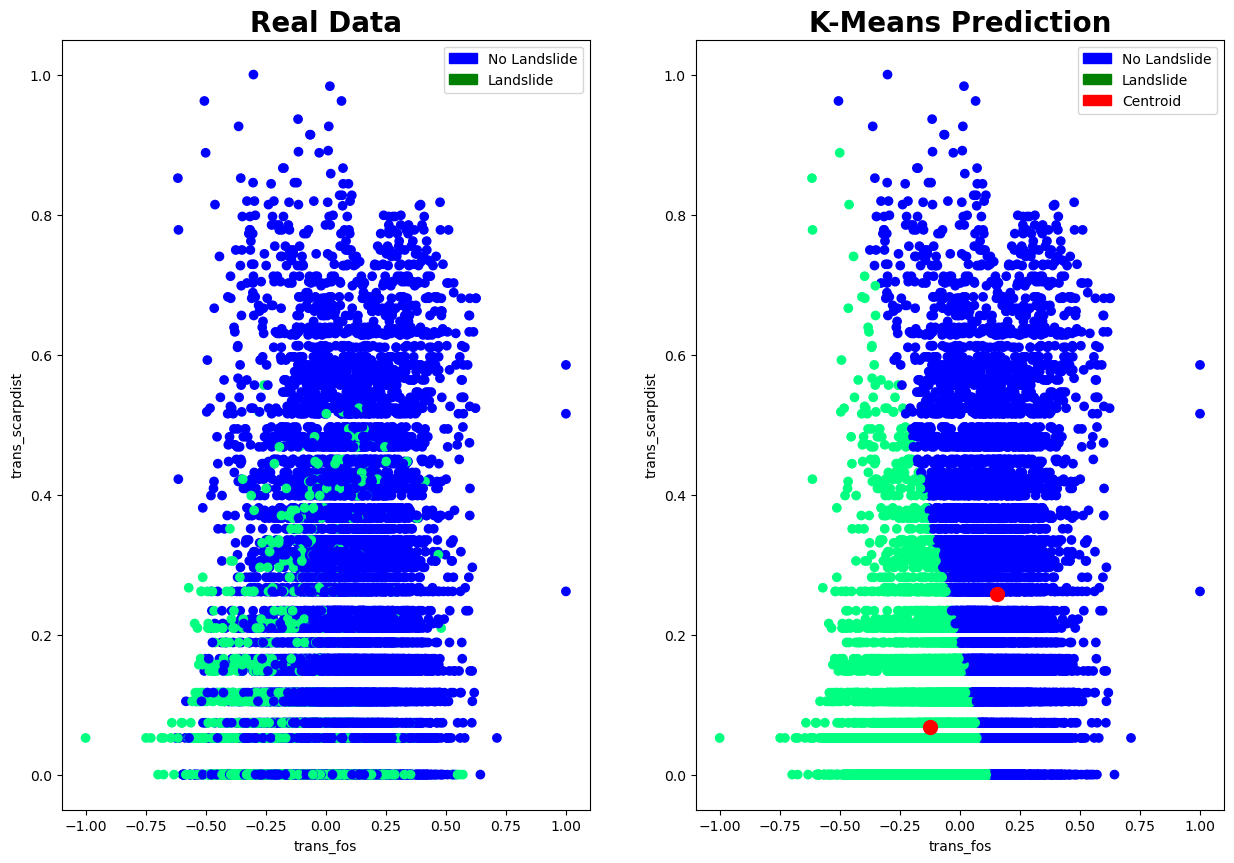

In [358]:
#Visualize the Result of Bivariate K-Means 
fig, axs = plt.subplots(1, 2, figsize=(15,10)) 

# plotting different things on different axes
axs[0].scatter(df_kmeans[first_var_kmeans], df_kmeans[second_var_kmeans], c=df_kmeans['trans_slide'], cmap='winter' )
axs[0].set_xlabel(first_var_kmeans)
axs[0].set_ylabel(second_var_kmeans)
axs[0].set_title("Real Data", size=20, fontweight = 'bold')

axs[1].scatter(df_kmeans[first_var_kmeans], df_kmeans[second_var_kmeans], c=df_kmeans['K-mean predicted'], cmap='winter')
axs[1].scatter(clusterer.cluster_centers_[:,0], clusterer.cluster_centers_[:,1], color='red', marker='o',s=100)
axs[1].set_xlabel(first_var_kmeans)
axs[1].set_ylabel(second_var_kmeans)
axs[1].set_title("K-Means Prediction", size=20, fontweight = 'bold')

#Legend
blue_patch = mpatches.Patch(color='blue', label='No Landslide')
green_patch = mpatches.Patch(color='green', label='Landslide')
centro = mpatches.Patch(color = 'red', label ='Centroid')
axs[0].legend(handles=[blue_patch, green_patch])
axs[1].legend(handles=[blue_patch, green_patch, centro])

In [359]:
#Confusion Matrix for Bivaraite K-means
con_mat_pred_slide_kmeans = confusion_matrix(df_kmeans['trans_slide'],df_kmeans['K-mean predicted'])

#Accuracy score for Bivaraite K-means
acc_sco_pred_slide_kmeans = accuracy_score(df_kmeans['trans_slide'],df_kmeans['K-mean predicted'])

#Classification Report for Bivaraite K-means
clas_pred_slide_kmeans = classification_report(df_kmeans['trans_slide'],df_kmeans['K-mean predicted'])

In [360]:
print(con_mat_pred_slide_kmeans)

[[8280 5421]
 [1049 5911]]


In [361]:
print('Score for Bivariate K-Means:', acc_sco_pred_slide_kmeans)

Score for Bivariate K-Means: 0.6868496200571125


In [362]:
print(clas_pred_slide_kmeans)

              precision    recall  f1-score   support

         0.0       0.89      0.60      0.72     13701
         1.0       0.52      0.85      0.65      6960

    accuracy                           0.69     20661
   macro avg       0.70      0.73      0.68     20661
weighted avg       0.76      0.69      0.69     20661



In [363]:
#Calculate Error for each iteration
error_rate = []

for i in range(1,30):
    clusterer_test = KMeans(n_clusters=2,random_state=7, n_init=i)
    clusterer_test.fit(df_kmeans[[first_var_kmeans,second_var_kmeans]])
    predictions_kmeans_test = clusterer_test.predict(df_kmeans[[first_var_kmeans,second_var_kmeans]])
    error_rate.append(np.mean(predictions_kmeans_test != df_kmeans['trans_slide']))

Text(0, 0.5, 'Error Rate')

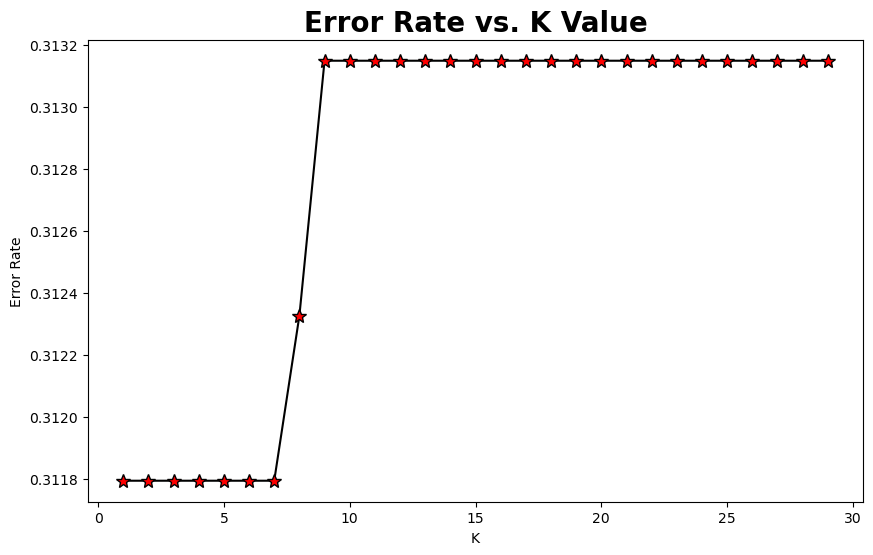

In [364]:
#Visualize The Error of K-Means Iteration
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate, color='black', marker='*', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', size=20, fontweight = 'bold')
plt.xlabel('K')
plt.ylabel('Error Rate')

### B. Multivariate K-Means Model

In [365]:
#Multivariate Kmeans Prediction
clusterer_multi = KMeans(n_clusters=2, random_state=7, n_init=50, max_iter=200)
clusterer_multi.fit(X_train, y_train)
predictions_kmeans_multi = clusterer_multi.predict(X_test)

In [366]:
#Confusion Matrix for Multivariate Kmeans
con_mat_pred_slide_kmeans_multi= confusion_matrix(y_test,predictions_kmeans_multi)

#Accuracy score for Multivariate Kmeans
acc_sco_pred_slide_kmeans_multi = accuracy_score(y_test,predictions_kmeans_multi)

#Classification Report for Multivariate Kmeans
clas_pred_slide_kmeans_multi = classification_report(y_test,predictions_kmeans_multi)

In [367]:
con_mat_pred_slide_kmeans_multi

array([[3397, 2081],
       [ 582, 2205]], dtype=int64)

In [368]:
print('Score for Multivariate KMeans:', acc_sco_pred_slide_kmeans_multi)

Score for Multivariate KMeans: 0.6777979431336963


In [369]:
print(clas_pred_slide_kmeans_multi)

              precision    recall  f1-score   support

         0.0       0.85      0.62      0.72      5478
         1.0       0.51      0.79      0.62      2787

    accuracy                           0.68      8265
   macro avg       0.68      0.71      0.67      8265
weighted avg       0.74      0.68      0.69      8265



C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




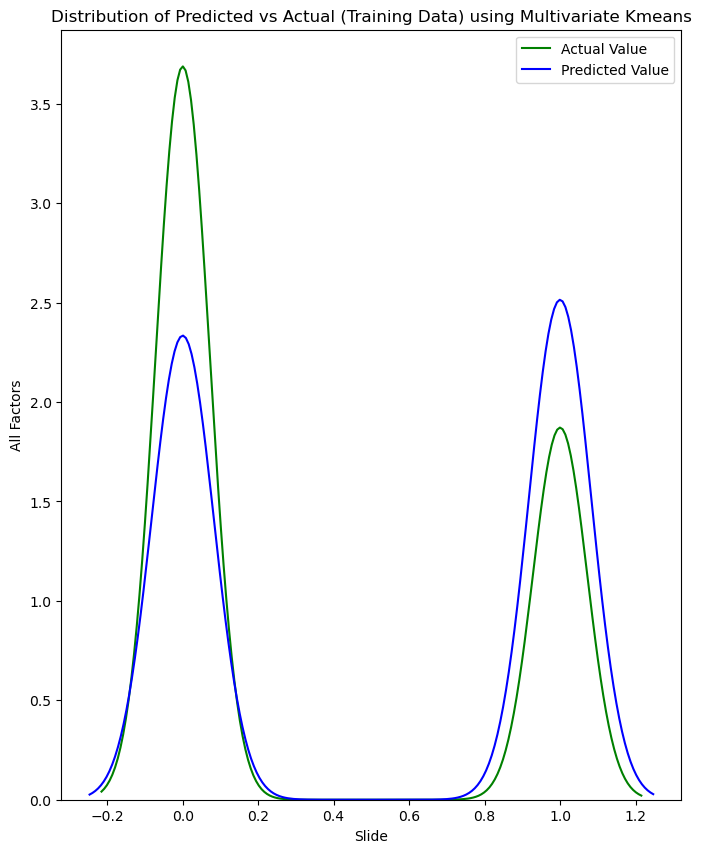

In [370]:
Title = 'Distribution of Predicted vs Actual (Training Data) using Multivariate Kmeans'
ComparisonPlot(y_train, predictions_kmeans_multi, Title)

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




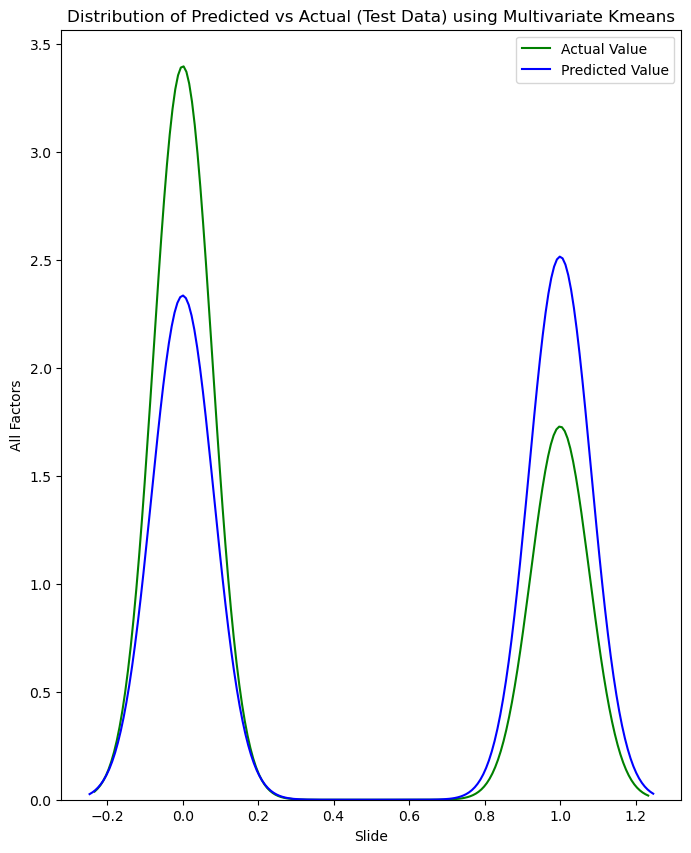

In [371]:
Title = 'Distribution of Predicted vs Actual (Test Data) using Multivariate Kmeans'
ComparisonPlot(y_test, predictions_kmeans_multi, Title)

## K-MEANS MODEL WITH PRINCIPAL COMPONENT ANALYSIS (PCA) MODEL
The inertia measurement assumes a cluster that <b>convex</b> and <b>isotropic</b>, which lead to the poorly K-Mean Clustering for elongated or irregular-shaped clusters (Chudalla and Wellmann, 2021). To overcome such a case, Principal Component Analysis could be a solution to a higher-dimensional case. 

**Principal component analysis (PCA)** is a multivariate **data dimensionality reduction technique**, used to simplify a data set to a smaller number of factors that explain most of the variability (variance) (Niculescu and Andrei, 2016). In the end, the result of PCA could be implemented in the hope of enhancing the accuracy of the model for any Machine Learning Methods. However, this enhancement still depends on the dataset itself, which sometimes also gives us no enhancement or even worsens the result.

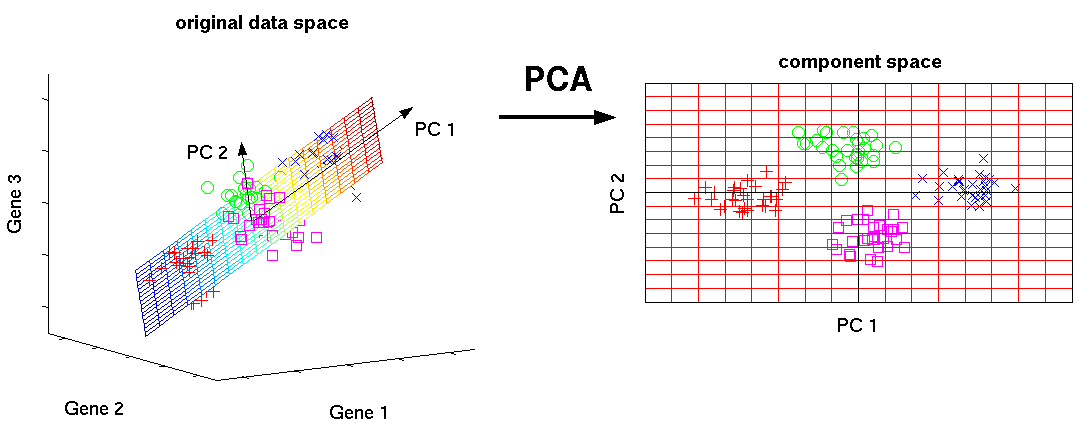
___
<center> <b>PCA Dimensional Reduction Visualization (Scholz, 2006)</b> <center>

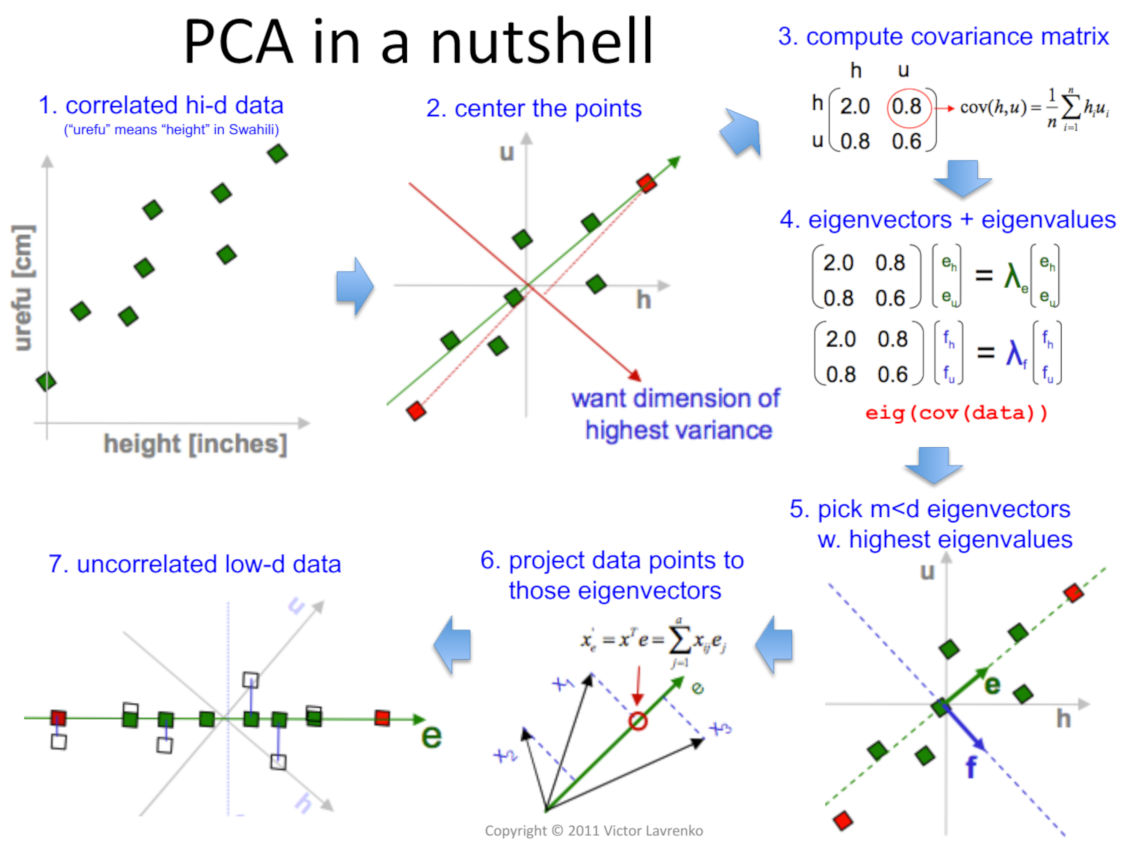
___
<center> <b>PCA in nutshell (Laverenko and Sutton, 2011)</b> <center>

### Multivariate K-Means with PCA Model

In [372]:
#PCA (Principal Component Analysis) to Fine-Tune Multivariate K-means
pca = PCA(n_components=2)
pca.fit(df_trans[clean_var_for_multi])
x_pca = pca.transform(df_trans[clean_var_for_multi])
print('Dimension Before PCA:',df_trans[clean_var_for_multi].shape,'\n''Dimension After PCA:',x_pca.shape)

Dimension Before PCA: (20661, 8) 
Dimension After PCA: (20661, 2)


In [373]:
#Creating Dataframe for PCA result
siap = {'Variable 1':x_pca[:,0],'Variable 2':x_pca[:,1],'Landslide Real Data':df_trans['trans_slide']}
df_kmeans_pca = pd.DataFrame(data=siap, columns=['Variable 1','Variable 2','Landslide Real Data'])
df_kmeans_pca

Variable 1  Variable 2  Landslide Real Data
0        0.590610   -0.373174                  1.0
1        0.579597   -0.370802                  1.0
2        0.573198   -0.370551                  1.0
3        0.574583   -0.370507                  1.0
4        0.572862   -0.370905                  1.0
...           ...         ...                  ...
20656    0.714884   -0.320997                  0.0
20657    0.707585   -0.316474                  0.0
20658    0.722066   -0.310311                  0.0
20659    0.710339   -0.307252                  0.0
20660    0.693715   -0.307890                  0.0

[20661 rows x 3 columns]

In [374]:
#Split the Data for Kmeans after PCA
rn = np.random.RandomState(0)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_kmeans_pca[['Variable 1', 'Variable 2']], df_kmeans_pca['Landslide Real Data'], test_size=0.20, random_state=rn)

In [375]:
#Bivariate Kmeans Prediction after PCA
clusterer_multi_pca = KMeans(n_clusters=2, random_state=7, n_init=50, max_iter=200)
clusterer_multi_pca.fit(X_train_pca, y_train_pca)
predictions_kmeans_pca = clusterer_multi_pca.predict(X_test_pca)

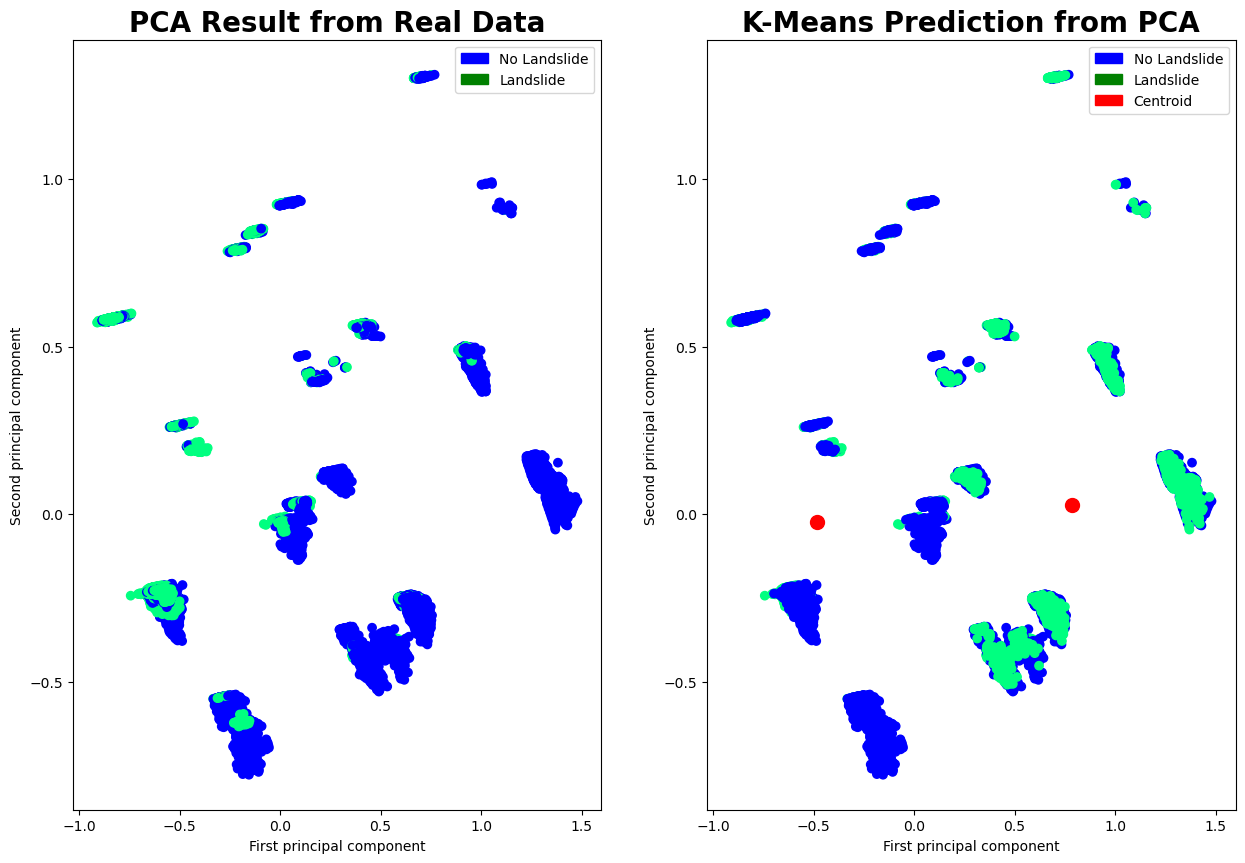

In [376]:
#Visualize the Result
fig, axs = plt.subplots(1, 2, figsize=(15,10)) 

# plotting different things on different axes
axs[0].scatter(df_kmeans_pca['Variable 1'],df_kmeans_pca['Variable 2'],c=df_kmeans_pca['Landslide Real Data'],cmap='winter')
axs[0].set_xlabel('First principal component')
axs[0].set_ylabel('Second principal component')
axs[0].set_title("PCA Result from Real Data", size=20, fontweight = 'bold')

axs[1].scatter(X_train_pca['Variable 1'],X_train_pca['Variable 2'],c=y_train_pca,cmap='winter')
axs[1].scatter(X_test_pca['Variable 1'],X_test_pca['Variable 2'],c=predictions_kmeans_pca,cmap='winter')
axs[1].scatter(clusterer_multi_pca.cluster_centers_[:,0], clusterer_multi_pca.cluster_centers_[:,1], color='red', marker='o',s=100)
axs[1].set_xlabel('First principal component')
axs[1].set_ylabel('Second principal component')
axs[1].set_title("K-Means Prediction from PCA", size=20, fontweight = 'bold')

#Legend
blue_patch = mpatches.Patch(color='blue', label='No Landslide')
green_patch = mpatches.Patch(color='green', label='Landslide')
centro = mpatches.Patch(color = 'red', label ='Centroid')
axs[0].legend(handles=[blue_patch, green_patch])
axs[1].legend(handles=[blue_patch, green_patch, centro])

In [377]:
#Confusion Matrix for Multivariate Kmeans with PCA
con_mat_pred_slide_kmeans_multi_pca= confusion_matrix(y_test_pca,predictions_kmeans_pca)

#Accuracy score for Multivariate Kmeans with PCA
acc_sco_pred_slide_kmeans_multi_pca = accuracy_score(y_test_pca,predictions_kmeans_pca)

#Classification Report for Multivariate Kmeans with PCA
clas_pred_slide_kmeans_multi_pca = classification_report(y_test_pca,predictions_kmeans_pca)

In [378]:
con_mat_pred_slide_kmeans_multi_pca

array([[1324, 1400],
       [1245,  164]], dtype=int64)

In [379]:
print('Score for Multivariate KMeans after PCA:', acc_sco_pred_slide_kmeans_multi_pca)
print('VS')
print('Score for Multivariate KMeans:', acc_sco_pred_slide_kmeans_multi)

Score for Multivariate KMeans after PCA: 0.3600290345995645
VS
Score for Multivariate KMeans: 0.6777979431336963


In [380]:
print(clas_pred_slide_kmeans_multi_pca)

              precision    recall  f1-score   support

         0.0       0.52      0.49      0.50      2724
         1.0       0.10      0.12      0.11      1409

    accuracy                           0.36      4133
   macro avg       0.31      0.30      0.31      4133
weighted avg       0.38      0.36      0.37      4133



## Artificial Neural Network (ANN) Model
**Artificial neural networks (ANN)** using the **principles of biological neural network function** to estimate the correlation between a set of input and output parameters which can be used both in classification, categories, and regression problems, where the correlation between input and output is required (Karkalos and Markopoulos, 2017). This Unsupervised Method has one type called **Perceptron** with the outputs are 0 and 1. It is determined by the weighted summation of the data inputs that have less or greater value than the threshold value. 

In most cases of ANN, the basic method that we will use is the **The Multilayer Perceptron**, which has neurons (perceptrons) in the hidden layers for the deployment of weights and functions. The variation in weights and the threshold will get different models for decision-making.

However, the ANNs generally suffer from **overfitting problems** because a reasonably sized ANN has far more parameters to be estimated than there are transfer samples available (Brown, 2009). That is why we should not use robust parameters, especially for the Model of Prediction.

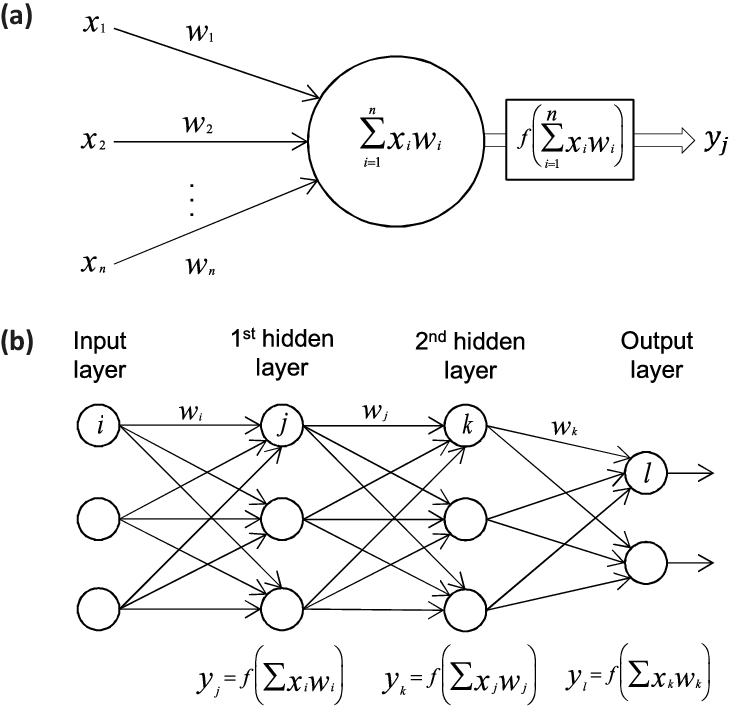
___
<center> <b>The visualization concept of Artifical Neural Network where the sum of x (input data) and w (weight) is passed through a particular non-linear activation function, to give an output y (Vieira et al., 2017)</b> <center>

### A. Multi Layered Perceptron (MLP) Model

In [381]:
# #Parameter for Bivariate SVM RBF
# param_activation= [{'hidden_layer_sizes': [(50,),(100,),(200,),(300,)],'activation': ['identity', 'logistic', 'tanh', 'relu']}]
# MLP = MLPClassifier(alpha = 0.01, max_iter = 500)

# #Search for the Best Parameter
# Grid_MLP = GridSearchCV(MLP, param_activation, cv=4)
# best_MLP = Grid_MLP.fit(X_train,y_train).best_estimator_
# predictions_MLP = best_MLP.predict(X_test)

# print('Best Parameter:', Grid_MLP.best_params_)

In [382]:
#MLP Prediction after determining the Best Parameter
MLP = MLPClassifier(hidden_layer_sizes=(100,), alpha = 0.01, activation = 'relu', max_iter = 500)
MLP.fit(X_train, y_train)
predictions_MLP = MLP.predict(X_test)

In [383]:
#Confusion Matrix for MLP
con_mat_pred_slide_MLP= confusion_matrix(y_test,predictions_MLP)

#Accuracy score for MLP
acc_sco_pred_slide_MLP = accuracy_score(y_test,predictions_MLP)

#Classification Report for MLP
clas_pred_slide_MLP = classification_report(y_test,predictions_MLP)

In [96]:
print(con_mat_pred_slide_MLP)

[[4787  691]
 [ 622 2165]]


In [97]:
print('Score for MLP:', acc_sco_pred_slide_MLP)

Score for MLP: 0.8411373260738052


In [98]:
print(clas_pred_slide_MLP)

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      5478
         1.0       0.76      0.78      0.77      2787

    accuracy                           0.84      8265
   macro avg       0.82      0.83      0.82      8265
weighted avg       0.84      0.84      0.84      8265



C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(green, hist=False, color="g", label='Actual Value')
C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

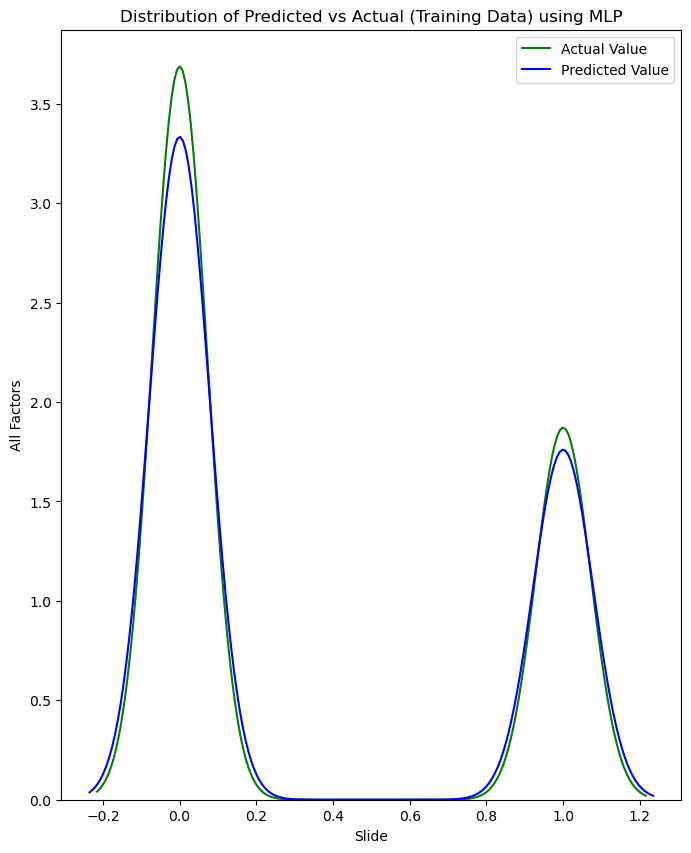

In [99]:
Title = 'Distribution of Predicted vs Actual (Training Data) using MLP'
ComparisonPlot(y_train, predictions_MLP, Title)

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(green, hist=False, color="g", label='Actual Value')
C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

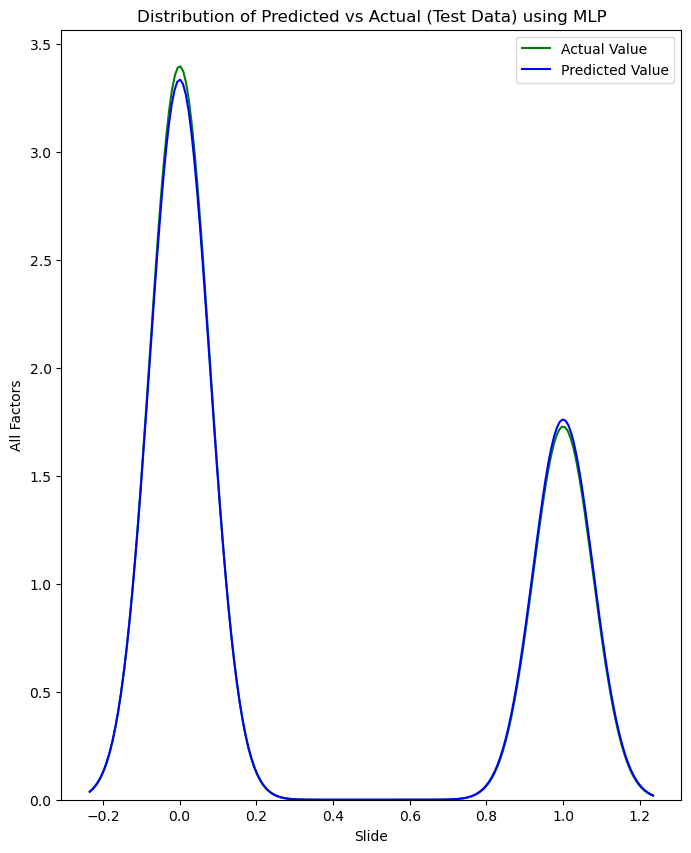

In [100]:
Title = 'Distribution of Predicted vs Actual (Test Data) using MLP'
ComparisonPlot(y_test, predictions_MLP, Title)

### B. Multi Layered Perceptron (MLP) with Principal Component Analysis (PCA) Model

In [101]:
#PCA (Principal Component Analysis) to fine tune MLP
pca_mlp = PCA(n_components=1)
pca_mlp.fit(df_trans[clean_var_for_multi])
x_pca_mlp = pca_mlp.transform(df_trans[clean_var_for_multi])
print('Dimension Before PCA:',df_trans[clean_var_for_multi].shape,'\n''Dimension After PCA:',x_pca_mlp.shape)

Dimension Before PCA: (20661, 8) 
Dimension After PCA: (20661, 1)


In [102]:
#Creating Dataframe for PCA result
siap_mlp = {'Variable 1':x_pca_mlp[:,0],'Landslide Real Data':df_trans['trans_slide']}
df_mlp_pca = pd.DataFrame(data=siap_mlp, columns=['Variable 1','Landslide Real Data'])
df_mlp_pca

Variable 1  Landslide Real Data
0        0.590594                  1.0
1        0.579575                  1.0
2        0.573269                  1.0
3        0.574657                  1.0
4        0.572983                  1.0
...           ...                  ...
20656    0.715202                  0.0
20657    0.707691                  0.0
20658    0.722150                  0.0
20659    0.710594                  0.0
20660    0.693749                  0.0

[20661 rows x 2 columns]

In [103]:
#Split the Data for Kmeans after PCA
rn = np.random.RandomState(0)
X_train_pca_mlp, X_test_pca_mlp, y_train_pca_mlp, y_test_pca_mlp = train_test_split(df_mlp_pca['Variable 1'], df_mlp_pca['Landslide Real Data'], test_size=0.40, random_state=rn)

In [104]:
#MLP Prediction after PCA
MLP_pca = MLPClassifier(hidden_layer_sizes=(100,), alpha = 0.01, activation = 'relu', max_iter = 500)
MLP_pca.fit(X_train_pca_mlp.values.reshape(-1, 1), y_train_pca_mlp.values.reshape(-1, 1))
predictions_MLP_pca = MLP_pca.predict(X_test_pca_mlp.values.reshape(-1, 1))

C:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


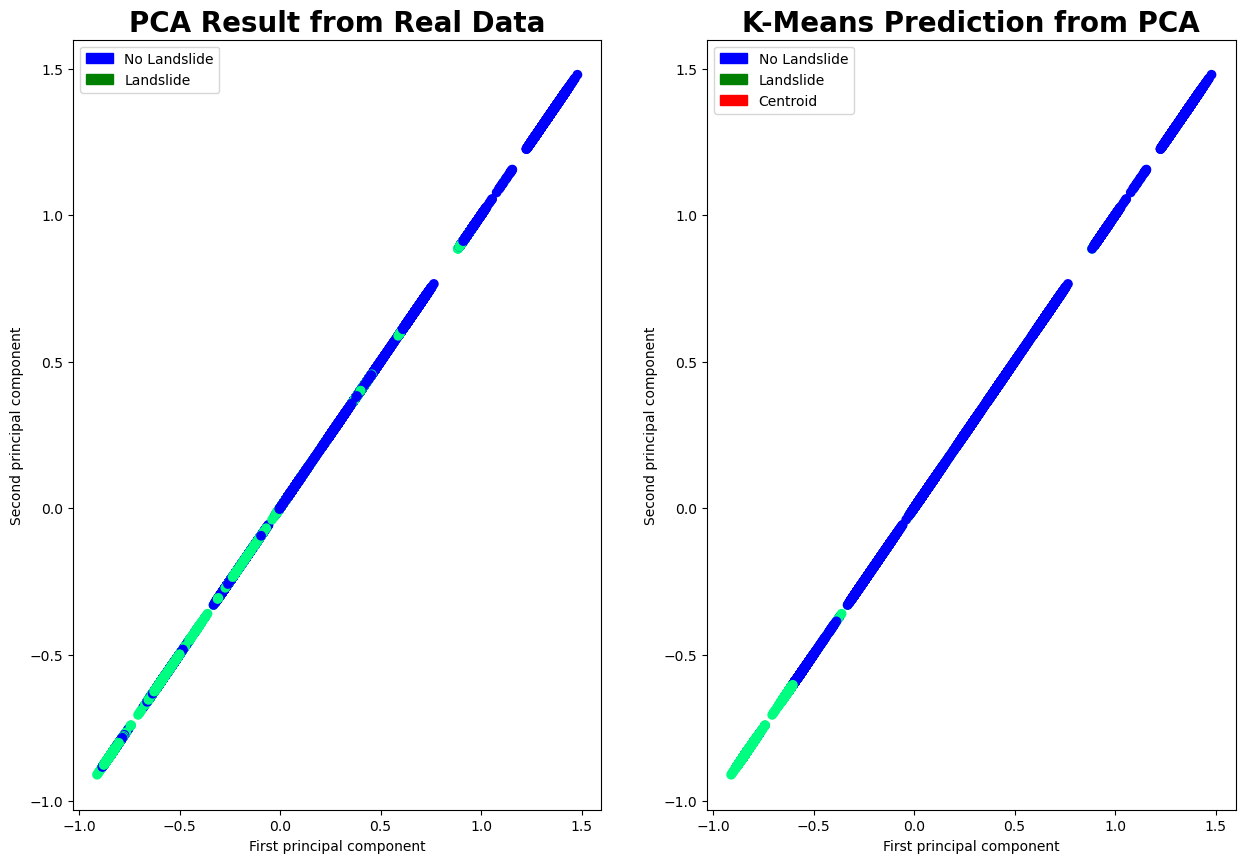

In [105]:
#Visualize the Result
fig, axs = plt.subplots(1, 2, figsize=(15,10)) 

# plotting different things on different axes
axs[0].scatter(df_mlp_pca['Variable 1'], df_mlp_pca['Variable 1'],c=df_mlp_pca['Landslide Real Data'],cmap='winter')
axs[0].set_xlabel('First principal component')
axs[0].set_ylabel('Second principal component')
axs[0].set_title("PCA Result from Real Data", size=20, fontweight = 'bold')

axs[1].scatter(X_train_pca_mlp, X_train_pca_mlp,c=y_train_pca_mlp,cmap='winter')
axs[1].scatter(X_test_pca_mlp, X_test_pca_mlp,c=predictions_MLP_pca,cmap='winter')
axs[1].set_xlabel('First principal component')
axs[1].set_ylabel('Second principal component')
axs[1].set_title("K-Means Prediction from PCA", size=20, fontweight = 'bold')

#Legend
blue_patch = mpatches.Patch(color='blue', label='No Landslide')
green_patch = mpatches.Patch(color='green', label='Landslide')
centro = mpatches.Patch(color = 'red', label ='Centroid')
axs[0].legend(handles=[blue_patch, green_patch])
axs[1].legend(handles=[blue_patch, green_patch, centro])

In [106]:
#Confusion Matrix for MLP after PCA
con_mat_pred_slide_MLP_pca= confusion_matrix(y_test_pca_mlp,predictions_MLP_pca)

#Accuracy score for MLP after PCA
acc_sco_pred_slide_MLP_pca= accuracy_score(y_test_pca_mlp,predictions_MLP_pca)

#Classification Report for MLP after PCA
clas_pred_slide_MLP_pca = classification_report(y_test_pca_mlp,predictions_MLP_pca)

In [107]:
con_mat_pred_slide_MLP_pca

array([[5007,  471],
       [1275, 1512]], dtype=int64)

In [108]:
print('Score for MLP after PCA:', acc_sco_pred_slide_MLP_pca)

Score for MLP after PCA: 0.7887477313974591


In [109]:
print(clas_pred_slide_MLP_pca)

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      5478
         1.0       0.76      0.54      0.63      2787

    accuracy                           0.79      8265
   macro avg       0.78      0.73      0.74      8265
weighted avg       0.79      0.79      0.78      8265



C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(green, hist=False, color="g", label='Actual Value')
C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

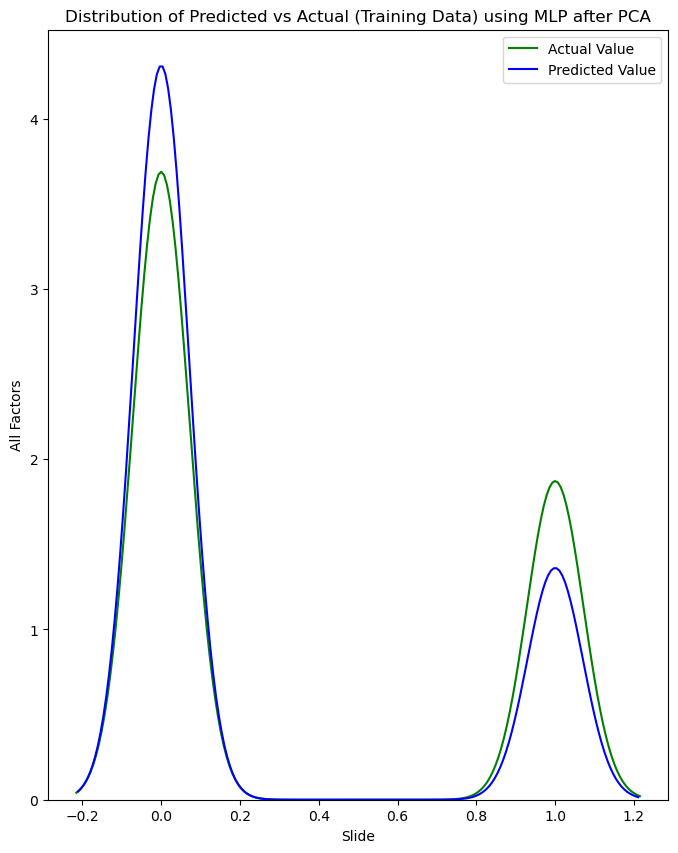

In [110]:
Title = 'Distribution of Predicted vs Actual (Training Data) using MLP after PCA'
ComparisonPlot(y_train_pca_mlp, predictions_MLP_pca, Title)

C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(green, hist=False, color="g", label='Actual Value')
C:\Users\Paulu wilson\AppData\Local\Temp\ipykernel_23032\1868399291.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

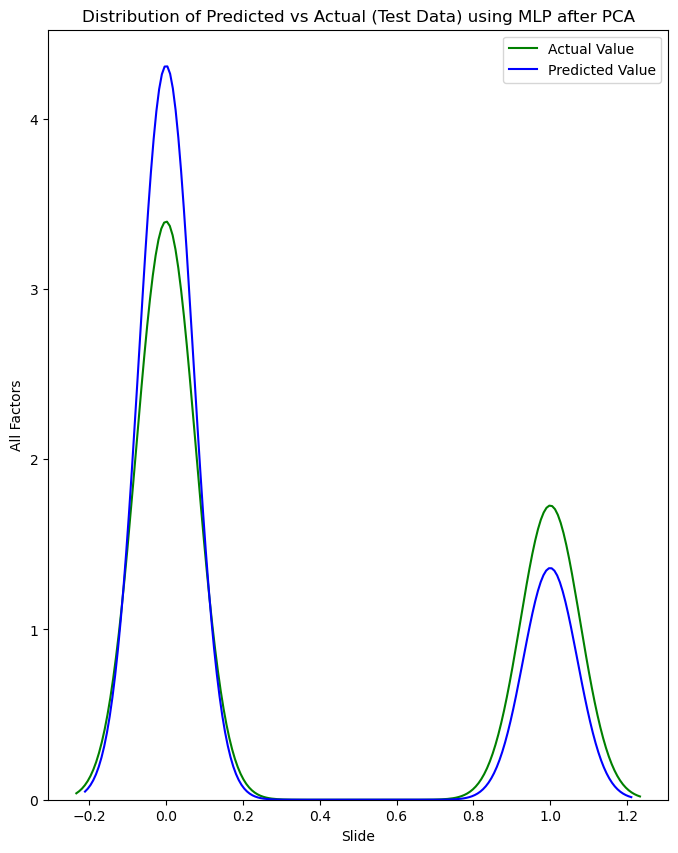

In [111]:
Title = 'Distribution of Predicted vs Actual (Test Data) using MLP after PCA'
ComparisonPlot(y_test_pca_mlp, predictions_MLP_pca, Title)

# THE COMPARISON FOR ALL ACCURACY SCORE PREDICTIONS

In [ ]:
#Dataframe for all model Score Evaluation
model = ['Logistic Regression','Decision Tree','Bivariate SVM Linear','Multivariate SVM Linear','Bivariate SVM RBF','Bivariate SVM Polynomial','Multivariate SVM RBF','Bivariate K-Means','Multivariate K-Means','Multivariate K-Means with PCA','Multi Layered Perceptron (MLP)','MLP with PCA']
evaluation = ['Accuracy Score']

eval_df = pd.DataFrame(index = model, columns = evaluation)

#Logistic Regression
eval_df.loc['Logistic Regression'] = acc_sco_pred_slide

#Decision Tree
eval_df.loc['Decision Tree'] = acc_sco_pred_slide_tree

#Bivariate SVM Linear
eval_df.loc['Bivariate SVM Linear'] = acc_sco_pred_slide_svm_lin

#Multivariate SVM Linear
eval_df.loc['Multivariate SVM Linear'] = acc_sco_pred_slide_svm_lin_multi

#Bivariate SVM RBF
eval_df.loc['Bivariate SVM RBF'] = acc_sco_pred_slide_svm_rbf

#Bivariate SVM RBF with Kernel
eval_df.loc['Bivariate SVM Polynomial'] = np.nan

#Multivariate SVM RBF
eval_df.loc['Multivariate SVM RBF'] = acc_sco_pred_slide_svm_rbf_multi

#Bivariate K-Means
eval_df.loc['Bivariate K-Means'] = acc_sco_pred_slide_kmeans

#Multivariate K-Means
eval_df.loc['Multivariate K-Means'] = acc_sco_pred_slide_kmeans_multi

#Multivariate K-Means with PCA
eval_df.loc['Multivariate K-Means with PCA'] = acc_sco_pred_slide_kmeans_multi_pca

#MLP
eval_df.loc['Multi Layered Perceptron (MLP)'] = acc_sco_pred_slide_MLP

#MLP with PCA
eval_df.loc['MLP with PCA'] = acc_sco_pred_slide_MLP_pca

eval_df.sort_values(by='Accuracy Score' ,ascending=False)

In [384]:
import pickle
with open('data.pickle','wb') as f:
    pickle.dump(acc_sco_pred_slide_MLP,f)